In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn import metrics

from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
sc=StandardScaler()

from sklearn.model_selection import GridSearchCV

In [2]:
bank=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

##### ACCOUNT BALANCE CAN BE NEGETIVE IN CASE OF OVER DRAFT

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Note1: We can see no null values

In [5]:
print('Data Description')
bank.describe(include='all').T

Data Description


count unique          top   freq         mean          std  \
age        45211.0    NaN          NaN    NaN     40.93621    10.618762   
job          45211     12  blue-collar   9732          NaN          NaN   
marital      45211      3      married  27214          NaN          NaN   
education    45211      4    secondary  23202          NaN          NaN   
default      45211      2           no  44396          NaN          NaN   
balance    45211.0    NaN          NaN    NaN  1362.272058  3044.765829   
housing      45211      2          yes  25130          NaN          NaN   
loan         45211      2           no  37967          NaN          NaN   
contact      45211      3     cellular  29285          NaN          NaN   
day        45211.0    NaN          NaN    NaN    15.806419     8.322476   
month        45211     12          may  13766          NaN          NaN   
duration   45211.0    NaN          NaN    NaN    258.16308   257.527812   
campaign   45211.0    NaN          NaN    NaN     2.763841     3.098021   
pdays      45211.0    NaN          NaN    NaN    40.197828   100.128746   
previous   45211.0    NaN          NaN    NaN     0.580323     2.303441   
poutcome     45211      4      unknown  36959          NaN          NaN   
y            45211      2           no  39922          NaN          NaN   

              min    25%    50%     75%       max  
age          18.0   33.0   39.0    48.0      95.0  
job           NaN    NaN    NaN     NaN       NaN  
marital       NaN    NaN    NaN     NaN       NaN  
education     NaN    NaN    NaN     NaN       NaN  
default       NaN    NaN    NaN     NaN       NaN  
balance   -8019.0   72.0  448.0  1428.0  102127.0  
housing       NaN    NaN    NaN     NaN       NaN  
loan          NaN    NaN    NaN     NaN       NaN  
contact       NaN    NaN    NaN     NaN       NaN  
day           1.0    8.0   16.0    21.0      31.0  
month         NaN    NaN    NaN     NaN       NaN  
duration      0.0  103.0  180.0   319.0    4918.0  
campaign      1.0    1.0    2.0     3.0      63.0  
pdays        -1.0   -1.0   -1.0    -1.0     871.0  
previous      0.0    0.0    0.0     0.0     275.0  
poutcome      NaN    NaN    NaN     NaN       NaN  
y             NaN    NaN    NaN     NaN       NaN

### Target`

In [6]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

       We can see the dataset is a unbalanced dataset as count of no>>count of yes

## Bank Client Data

##### JOB

In [7]:
print(bank['job'].unique())

print(bank['job'].value_counts())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [8]:
print('Percentage of distribution of the data\n')
print(np.round(bank['job'].value_counts()/len(bank)*100,2))

Percentage of distribution of the data

blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64


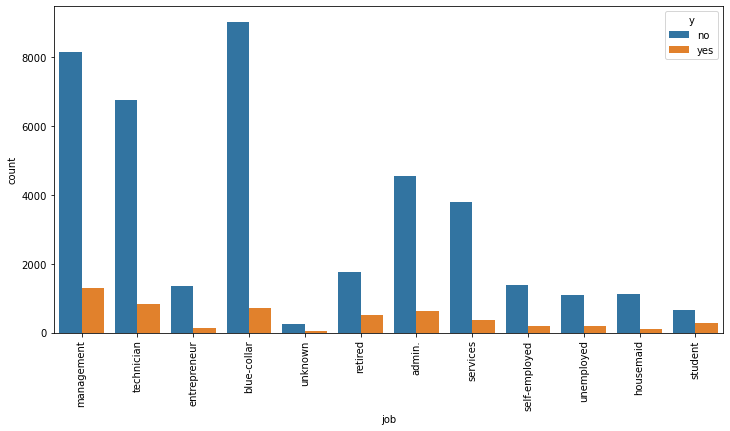

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(bank['job'],hue=bank['y'])
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

y              total      yes %       no %
job                                       
admin.          5171  12.202669  87.797331
blue-collar     9732   7.274969  92.725031
entrepreneur    1487   8.271688  91.728312
housemaid       1240   8.790323  91.209677
management      9458  13.755551  86.244449
retired         2264  22.791519  77.208481
self-employed   1579  11.842939  88.157061
services        4154   8.883004  91.116996
student          938  28.678038  71.321962
technician      7597  11.056996  88.943004
unemployed      1303  15.502686  84.497314
unknown          288  11.805556  88.194444


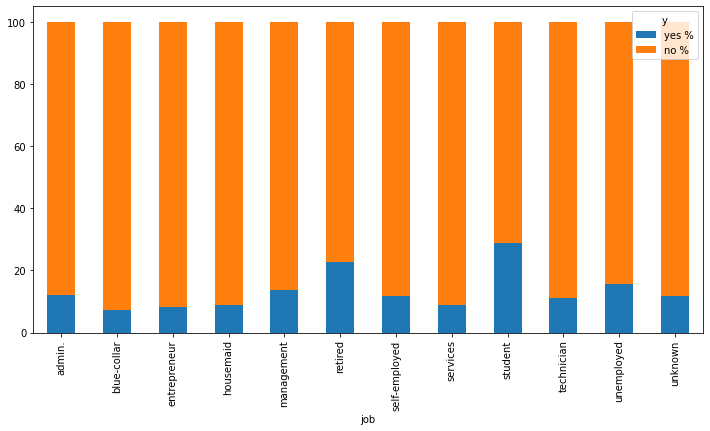

In [10]:
df=pd.crosstab(bank['job'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df[['total','yes %','no %']])
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(12,6))

In [11]:
yes=pd.DataFrame(
    np.round(bank[bank['y']=='yes']['job'].value_counts()/len(bank['job'])*100,2)).reset_index()
no=pd.DataFrame(
    np.round(bank[bank['y']=='no']['job'].value_counts()/len(bank['job'])*100,2)).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'jobs',  'job_x':'subscribed%' , 'job_y':'not subscribed%'})
print('disctribution of data ')
print(distribution)

disctribution of data 
             jobs  subscribed%  not subscribed%
0      management         2.88            18.04
1      technician         1.86            14.95
2     blue-collar         1.57            19.96
3          admin.         1.40            10.04
4         retired         1.14             3.87
5        services         0.82             8.37
6         student         0.59             1.48
7      unemployed         0.45             2.44
8   self-employed         0.41             3.08
9    entrepreneur         0.27             3.02
10      housemaid         0.24             2.50
11        unknown         0.08             0.56


###### Age

In [12]:
print('mean age group of clients not subscribed',bank[bank['y']=='no']['age'].mean())
print('mean age group of clients subscribed',bank[bank['y']=='yes']['age'].mean())
print('median age group of clients not subscribed',bank[bank['y']=='no']['age'].median())
print('median age group of clients subscribed',bank[bank['y']=='yes']['age'].median())
print('range of  age',bank['age'].min(),bank['age'].max())
print('Skewness of the age collumn',bank['age'].skew())

mean age group of clients not subscribed 40.83898602274435
mean age group of clients subscribed 41.670069956513515
median age group of clients not subscribed 39.0
median age group of clients subscribed 38.0
range of  age 18 95
Skewness of the age collumn 0.6848179257252598


    we can concider age to be normally distributed as mean ~ median

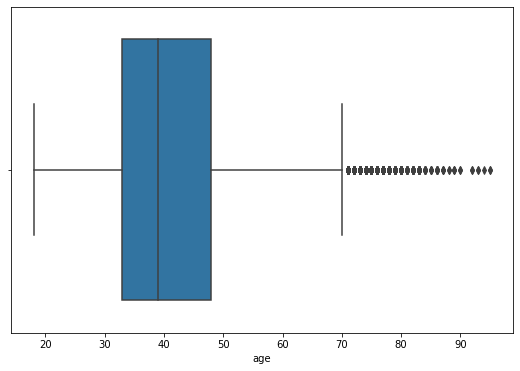

In [13]:
plt.figure(figsize=(9,6))
sns.boxplot(bank['age'])
plt.show()

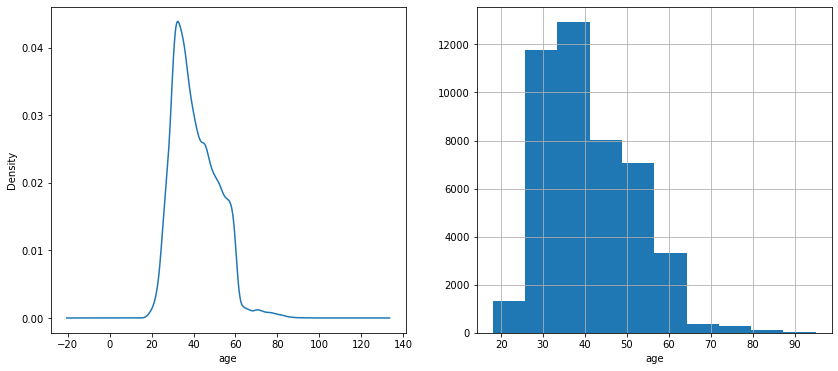

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
bank['age'].plot(kind='density')
plt.xlabel('age')
plt.subplot(1,2,2)
bank['age'].hist()
plt.xlabel('age')
plt.show()

    we can see that data is mainly clustutred over range 20 to 60 hence presence of outliers in the age feature

## Note: Logarithmic transformation reduces skewness of the Age data

In [15]:
age,k=bank[['age','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
age['Groups']=k

    We can see that 95 percent of the data belongs to the age group 25 to 65 

y             total      yes %       no %
Groups                                   
25<Group<=45  29427  10.772420  89.227580
45<Group<=65  13697  10.797985  89.202015
Group<25       1336  23.952096  76.047904
Group>65        751  42.609854  57.390146


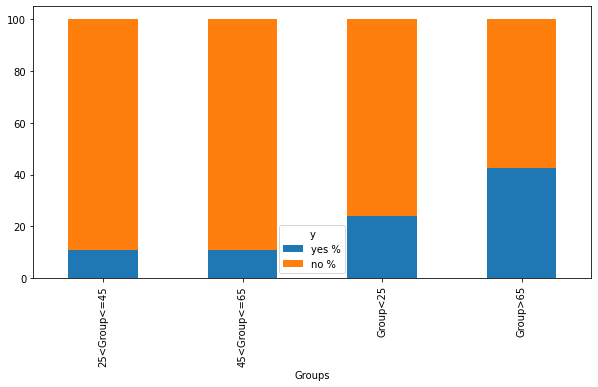

In [16]:
df=pd.crosstab(age['Groups'],age['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df[['total','yes %','no %']])
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

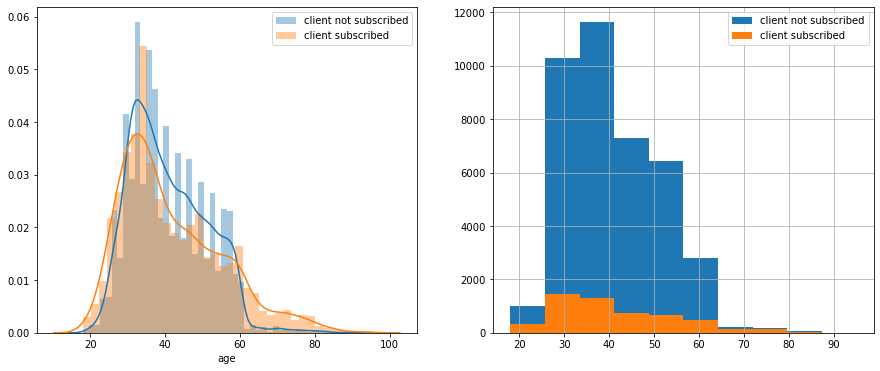

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(bank[bank['y']=='no']['age'],label='client not subscribed')
sns.distplot(bank[bank['y']=='yes']['age'],label='client subscribed')
plt.legend()
plt.subplot(1,2,2)
bank[bank['y']=='no']['age'].hist(label='client not subscribed')
bank[bank['y']=='yes']['age'].hist(label='client subscribed')
plt.legend()
plt.show()

#### marital

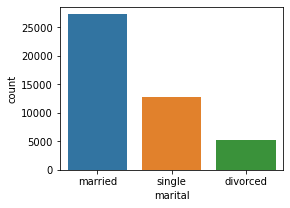

In [296]:
plt.figure(figsize=(4,3))
sns.countplot(bank['marital'])

y            no   yes  total       no %      yes %
marital                                           
divorced   4585   622   5207  88.054542  11.945458
married   24459  2755  27214  89.876534  10.123466
single    10878  1912  12790  85.050821  14.949179


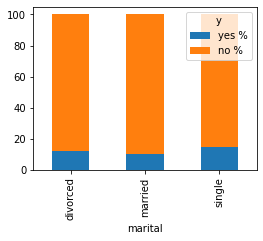

In [297]:
df=pd.crosstab(bank['marital'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(4,3))

In [19]:
yes=pd.DataFrame(bank[bank['y']=='yes']['marital'].value_counts()/len(bank['marital'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['marital'].value_counts()/len(bank['marital'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'marital','marital_x':'subscribed%' ,
                                                         'marital_y':'not subscribed%'})
print('distribution of data ')
print(distribution)

distribution of data 
    marital  subscribed%  not subscribed%
0   married     6.093650        54.099666
1    single     4.229059        24.060516
2  divorced     1.375771        10.141337


    Note:age and marital should have collinearity among themselves

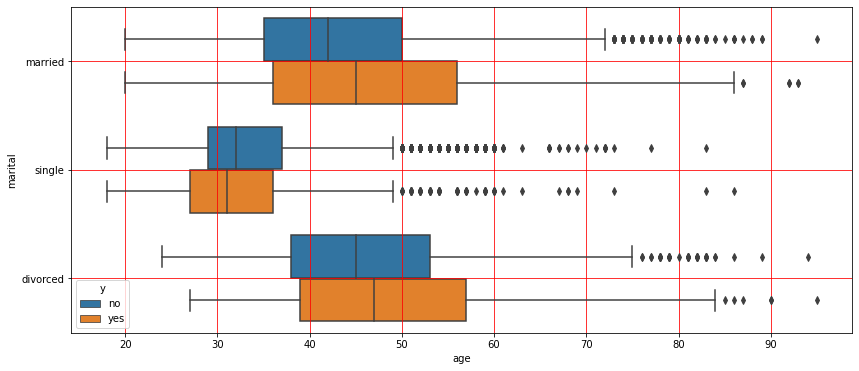

In [20]:
plt.figure(figsize=(14,6))
sns.boxplot(bank['age'],bank['marital'],hue=bank['y'])
plt.grid(color='r')
plt.show()

    age and Marital status is suspected to have high correlation among themselves

#### Education

y             no   yes  total       no %      yes %
education                                          
primary     6260   591   6851  91.373522   8.626478
secondary  20752  2450  23202  89.440565  10.559435
tertiary   11305  1996  13301  84.993610  15.006390
unknown     1605   252   1857  86.429725  13.570275


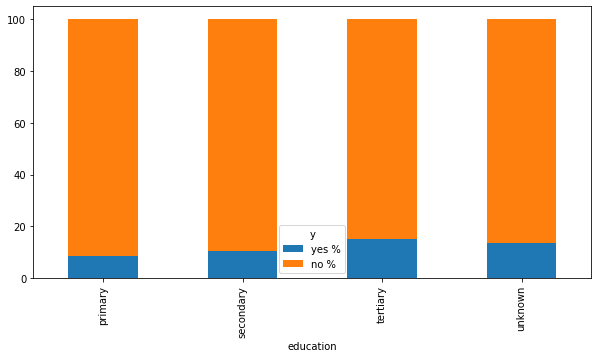

In [21]:
df=pd.crosstab(bank['education'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [22]:
yes=pd.DataFrame(bank[bank['y']=='yes']['education'].value_counts()/len(bank['education'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['education'].value_counts()/len(bank['education'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'education','education_x':'subscribed%' ,
                                                         'education_y':'not subscribed%'})
print('distribution of data ')
print(distribution)

print('education proportions of the subscribers')
print(bank[bank['y']=='yes']['education'].value_counts()/len(bank[bank['y']=='yes']['education'])*100)
print('education proportions of the no subscribers')
print(bank[bank['y']=='no']['education'].value_counts()/len(bank[bank['y']=='no']['education'])*100)

distribution of data 
   education  subscribed%  not subscribed%
0  secondary     5.419035        45.900334
1   tertiary     4.414855        25.004977
2    primary     1.307204        13.846188
3    unknown     0.557386         3.550021
education proportions of the subscribers
secondary    46.322556
tertiary     37.738703
primary      11.174135
unknown       4.764606
Name: education, dtype: float64
education proportions of the no subscribers
secondary    51.981364
tertiary     28.317720
primary      15.680577
unknown       4.020340
Name: education, dtype: float64


### Default
       5 - default: has credit in default? (binary: "yes","no")


y           no   yes  total       no %      yes %
default                                          
no       39159  5237  44396  88.203892  11.796108
yes        763    52    815  93.619632   6.380368


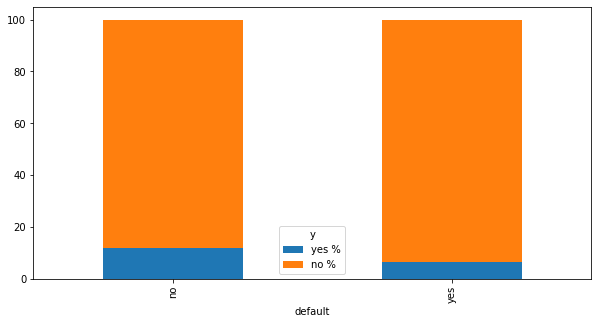

In [23]:
df=pd.crosstab(bank['default'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [24]:
print('percentage of subscriber has credit card  and doesnot has credit card')
print(bank[bank['y']=='yes']['default'].value_counts()/len(bank[bank['y']=='yes']['default'])*100)

percentage of subscriber has credit card  and doesnot has credit card
no     99.016827
yes     0.983173
Name: default, dtype: float64


    99 % customer doesnot has credit card who has subscribed
    

In [25]:
print('percentage of non subscriber has credit card  and doesnot has credit card')

print(bank[bank['y']=='no']['default'].value_counts()/len(bank[bank['y']=='no']['default'])*100)

percentage of non subscriber has credit card  and doesnot has credit card
no     98.088773
yes     1.911227
Name: default, dtype: float64


### balance: 
    average yearly balance, in euros (numeric) 

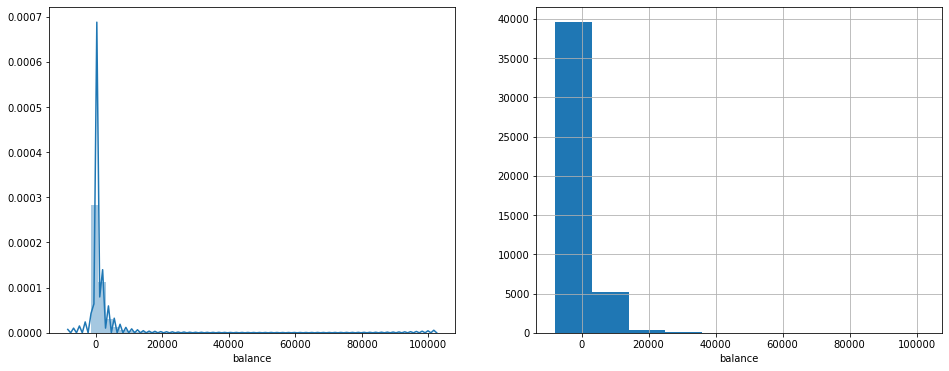

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(bank['balance'])
plt.subplot(1,2,2)
bank['balance'].hist()
plt.xlabel('balance')
plt.show()

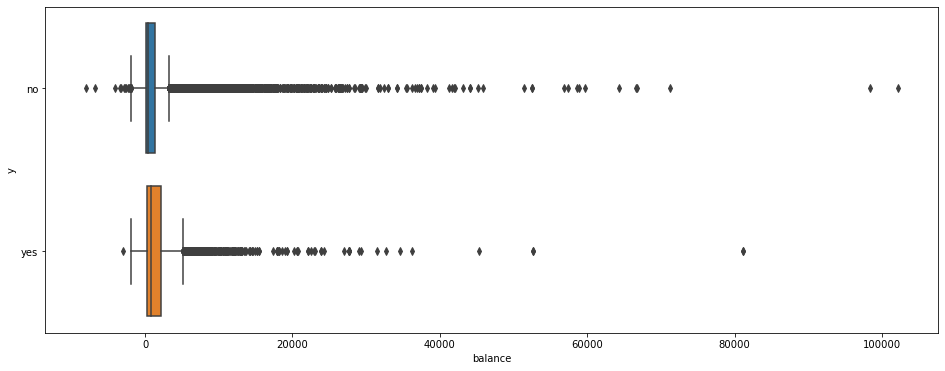

In [27]:
plt.figure(figsize=(16,6))
sns.boxplot(bank['balance'],bank['y'])
plt.show()

    large no of balance= zero values

In [28]:
bank[bank['balance']==0]['y'].value_counts()

no     3222
yes     292
Name: y, dtype: int64

note: 3512 zero balance accounts which may be looked into during feature transformation

In [29]:
bank['balance'].skew()#distribution is hoghly skewed


8.360308326166326

-0.07818749236478738


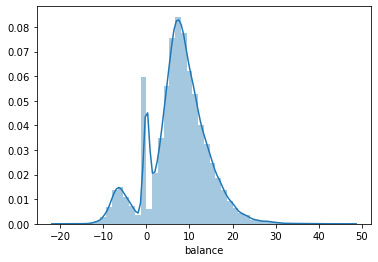

In [30]:
print(np.cbrt(bank['balance']).skew())# note: cube root transformation may be required in the later stages
sns.distplot(np.cbrt(bank['balance']))
plt.show()

    presence of values less than zero

In [31]:
print(bank[bank['balance']<0].shape)#Negetive Balance
bank[bank['balance']<0]['y'].value_counts()#Zero Balance

(3766, 17)


no     3556
yes     210
Name: y, dtype: int64

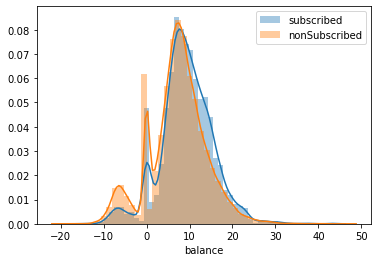

In [32]:
sns.distplot(np.cbrt(bank[bank['y']=='yes']['balance']),label='subscribed')
sns.distplot(np.cbrt(bank[bank['y']=='no']['balance']),label='nonSubscribed')
plt.legend()
plt.show()

### Housing:
    has housing loan? (binary: "yes","no")

y           no   yes  total       no %      yes %
housing                                          
no       16727  3354  20081  83.297645  16.702355
yes      23195  1935  25130  92.300040   7.699960


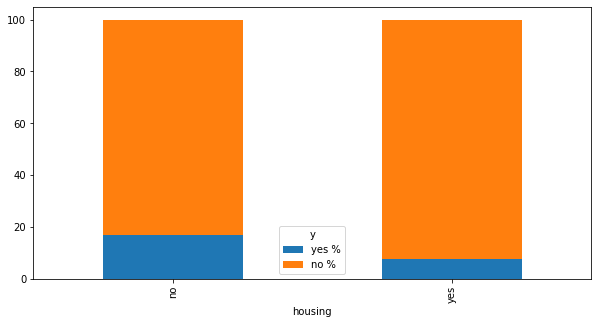

In [33]:
df=pd.crosstab(bank['housing'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [34]:
print('percentage of non subscribers v/s have/dont have housing loan')
print(bank[bank['y']=='no']['housing'].value_counts()/len(bank[bank['y']=='no']['housing'])*100)
print('percentage of  subscribers v/s have/dont have housing loan')
print(bank[bank['y']=='yes']['housing'].value_counts()/len(bank[bank['y']=='yes']['housing'])*100)

percentage of non subscribers v/s have/dont have housing loan
yes    58.100797
no     41.899203
Name: housing, dtype: float64
percentage of  subscribers v/s have/dont have housing loan
no     63.414634
yes    36.585366
Name: housing, dtype: float64


    conclusion:
        58 % non subscribers has housing loan
        63 % subscribers dont have housing loan

In [35]:
yes=pd.DataFrame(bank[bank['y']=='yes']['housing'].value_counts()/len(bank['housing'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['housing'].value_counts()/len(bank['housing'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'housingLoan','housing_x':'subscribed%' ,
                                                         'housing_y':'not subscribed%'})
print('percentage of the client who have/donthave housing Loan')
print(distribution)

percentage of the client who have/donthave housing Loan
  housingLoan  subscribed%  not subscribed%
0          no     7.418549        36.997633
1         yes     4.279932        51.303886


#### Loan
       8 - loan: has personal loan? (binary: "yes","no")

     Note: 83 percent of the clients donot have personal loan

In [36]:
yes=pd.DataFrame(bank[bank['y']=='yes']['loan'].value_counts()/len(bank['loan'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['loan'].value_counts()/len(bank['loan'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'PersonalLoan','loan_x':'subscribed%' ,
                                                         'loan_y':'not subscribed%'})
print('percentage of the client who has/hasnot Personal Loan')
print(distribution)

percentage of the client who has/hasnot Personal Loan
  PersonalLoan  subscribed%  not subscribed%
0           no    10.627945        73.349406
1          yes     1.070536        14.952113


y        no   yes  total       no %      yes %
loan                                          
no    33162  4805  37967  87.344273  12.655727
yes    6760   484   7244  93.318609   6.681391


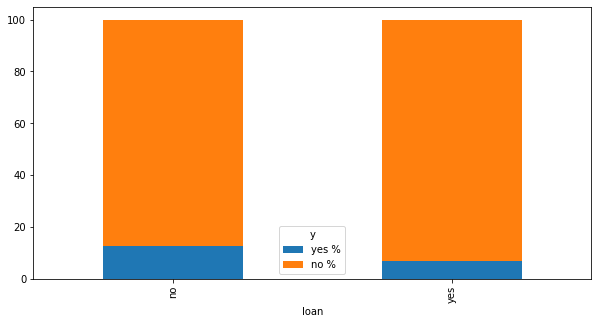

In [37]:
df=pd.crosstab(bank['loan'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [38]:
print('proportion of subscribers have personal loan')
print(bank[bank['y']=='yes']['loan'].value_counts()/len(bank[bank['y']=='yes']['loan'])*100)
print('proportion of non subscribers have personal loan')
print(bank[bank['y']=='no']['loan'].value_counts()/len(bank[bank['y']=='no']['loan'])*100)

proportion of subscribers have personal loan
no     90.848932
yes     9.151068
Name: loan, dtype: float64
proportion of non subscribers have personal loan
no     83.066981
yes    16.933019
Name: loan, dtype: float64


    9 % of the clients who has subscribed has personal loan
    16.9 % of the clients who has not subscribed has personal loan

### Last campaign Data

### Contact
       9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

In [39]:
bank['contact'].value_counts()/len(bank['contact'])*100

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

     Note: 64.8 % of the clients were approached through cellularcontact  and 
     6.4% of the clients were approached through telephonic communication

y             no   yes  total       no %      yes %
contact                                            
cellular   24916  4369  29285  85.081100  14.918900
telephone   2516   390   2906  86.579491  13.420509
unknown    12490   530  13020  95.929339   4.070661


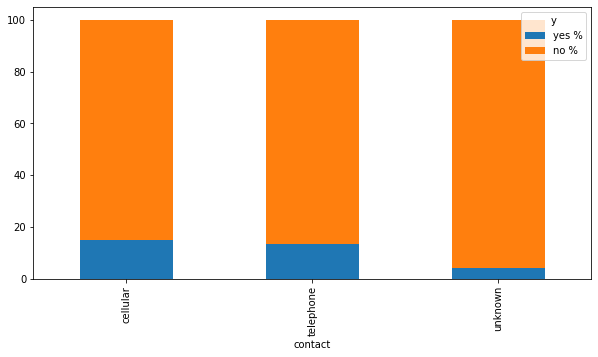

In [40]:
df=pd.crosstab(bank['contact'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [41]:
yes=pd.DataFrame(bank[bank['y']=='yes']['contact'].value_counts()/len(bank['contact'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['contact'].value_counts()/len(bank['contact'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'contact','contact_x':'subscribed%' ,
                                                         'contact_y':'not subscribed%'})
print('percentage of the client wrt Mode of Contact')
print(distribution)

percentage of the client wrt Mode of Contact
     contact  subscribed%  not subscribed%
0   cellular     9.663577        55.110482
1    unknown     1.172281        27.626020
2  telephone     0.862622         5.565017


In [42]:
print(bank[bank['y']=='no']['contact'].value_counts()/len(bank[bank['y']=='no']['contact'])*100)

cellular     62.411703
unknown      31.286008
telephone     6.302289
Name: contact, dtype: float64


In [43]:
print(bank[bank['y']=='yes']['contact'].value_counts()/len(bank[bank['y']=='yes']['contact'])*100)

cellular     82.605407
unknown      10.020798
telephone     7.373795
Name: contact, dtype: float64


    of the person who has subscribed 82.6% clients were approached through cellular contact

### day
      10 - day: last contact day of the month (numeric)


In [44]:
(bank['day'].value_counts())

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

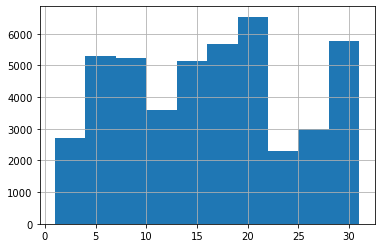

In [45]:
bank['day'].hist()
plt.show()

    Note:- checking number of contacts made in different quarters of the month

In [46]:
quarter=bank[['day','y']].copy(deep=True)
# dividing the month in 3 halves with respect to the size of the data
#firstHalf 1: 10 days
#middleHalf 2: 10 days
#lastHalf 3: 10 days

k=[]
for i in quarter['day']:
    if i<=10:
        k.append('first')
    elif i>10 and i<=20:
        k.append('second')
    else:
        k.append('third')

quarter['month_']=k

In [47]:
quarter['month_'].value_counts()/len(quarter['month_'])*100

second    40.673730
first     30.357656
third     28.968614
Name: month_, dtype: float64

    41 % of the last contacts are in the 2nd quarter of the month

y          no   yes  total      no %     yes %
month_                                        
first   11991  1734  13725  87.36612  12.63388
second  16365  2024  18389  88.99342  11.00658
third   11566  1531  13097  88.31030  11.68970


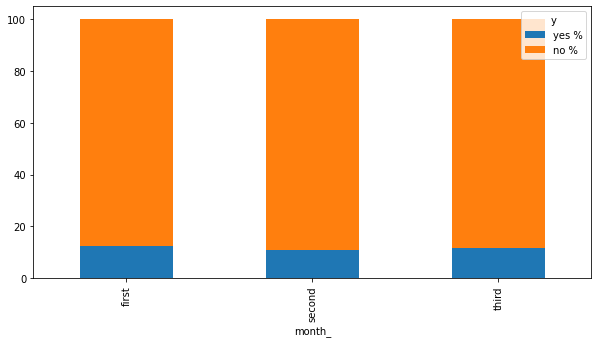

In [48]:
df=pd.crosstab(quarter['month_'],quarter['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

###  Month
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")


y         no  yes  total       no %      yes %
month                                         
apr     2355  577   2932  80.320600  19.679400
aug     5559  688   6247  88.986714  11.013286
dec      114  100    214  53.271028  46.728972
feb     2208  441   2649  83.352208  16.647792
jan     1261  142   1403  89.878831  10.121169
jul     6268  627   6895  90.906454   9.093546
jun     4795  546   5341  89.777195  10.222805
mar      229  248    477  48.008386  51.991614
may    12841  925  13766  93.280546   6.719454
nov     3567  403   3970  89.848866  10.151134
oct      415  323    738  56.233062  43.766938
sep      310  269    579  53.540587  46.459413


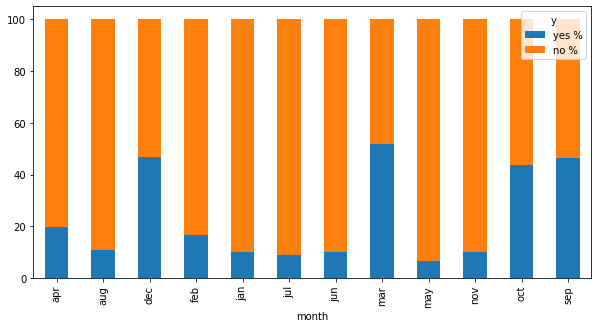

In [49]:
df=pd.crosstab(bank['month'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

    we can see that 71 % of the concats were made between may to august

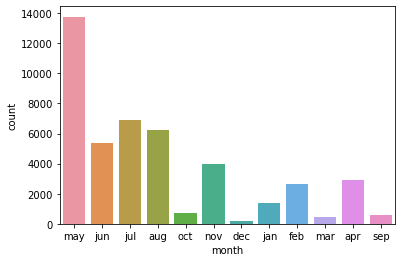

In [50]:
sns.countplot(bank['month'])
plt.show()

In [51]:
yes=pd.DataFrame(bank[bank['y']=='yes']['month'].value_counts()/len(bank['month'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['month'].value_counts()/len(bank['month'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'month','month_x':'subscribed%' ,
                                                         'month_y':'not subscribed%'})
print('percentage of the client wrt Mode of Contact')
print(distribution)
yes=pd.DataFrame(bank[bank['y']=='yes']['month'].value_counts()/len(bank[bank['y']=='yes']['month'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['month'].value_counts()/len(bank[bank['y']=='no']['month'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'month','month_x':'subscribed%' ,
                                                         'month_y':'not subscribed%'})
print('percentage of the subscribers wrt Mode of Contact')
print(distribution)

percentage of the client wrt Mode of Contact
   month  subscribed%  not subscribed%
0    may     2.045962        28.402380
1    aug     1.521754        12.295680
2    jul     1.386831        13.863883
3    apr     1.276238         5.208909
4    jun     1.207671        10.605826
5    feb     0.975426         4.883767
6    nov     0.891376         7.889673
7    oct     0.714428         0.917918
8    sep     0.594988         0.685674
9    mar     0.548539         0.506514
10   jan     0.314083         2.789144
11   dec     0.221185         0.252151
percentage of the subscribers wrt Mode of Contact
   month  subscribed%  not subscribed%
0    may    17.489128        32.165222
1    aug    13.008130        13.924653
2    jul    11.854793        15.700616
3    apr    10.909435         5.899003
4    jun    10.323313        12.010921
5    feb     8.338060         5.530785
6    nov     7.619588         8.934923
7    oct     6.107015         1.039527
8    sep     5.086028         0.776514
9    mar

    with in these same months apr to aug may to august ~61% of total subscribers were gained 

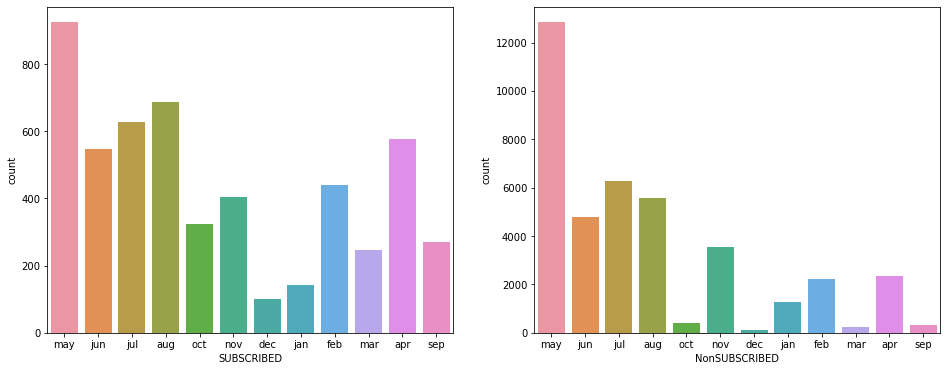

In [52]:
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(1,2,1)
sns.countplot(bank[bank['y']=='yes']['month'])
plt.xlabel('SUBSCRIBED')
plt.subplot(1,2,2)
sns.countplot(bank[bank['y']=='no']['month'])
plt.xlabel('NonSUBSCRIBED')
plt.show()

### duration
      12 - duration: last contact duration, in seconds (numeric)


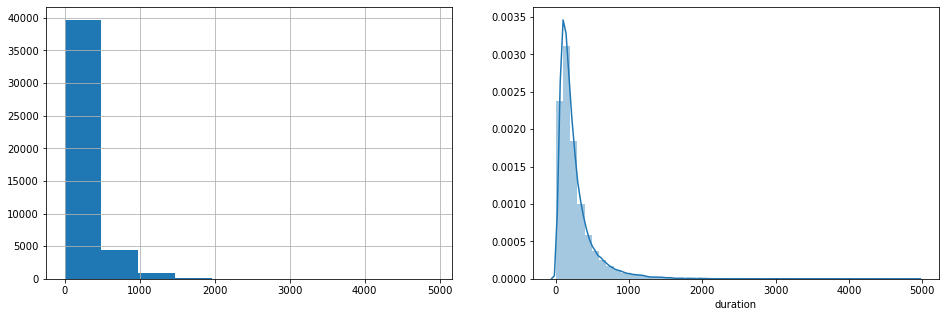

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
bank['duration'].hist()
plt.subplot(1,2,2)
sns.distplot(bank['duration'])

###### Converting into minutes

In [54]:
minutes=bank[['duration']]/60

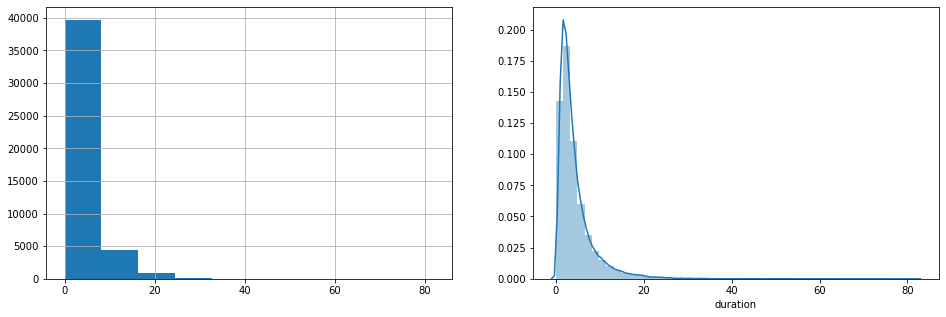

In [55]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
minutes['duration'].hist()
plt.subplot(1,2,2)
sns.distplot(minutes['duration'])

In [56]:
k=[]
for i in minutes['duration']:
    if i<=5:
        k.append('<=5')
    elif i>5 and i<=10:
        k.append('>5&<=10')
    elif i>10 and i<=15:
        k.append('>10&<=15')
    elif i>15 and i<=20:
        k.append('>15&<=20')
    else:
        k.append('>20')
minutes['time']=k

In [57]:
minutes['y']=bank['y']

y            no   yes  total       no %      yes %
time                                              
<=5       31106  1831  32937  94.440902   5.559098
>10&<=15   1379   993   2372  58.136594  41.863406
>15&<=20    364   494    858  42.424242  57.575758
>20         214   346    560  38.214286  61.785714
>5&<=10    6859  1625   8484  80.846299  19.153701


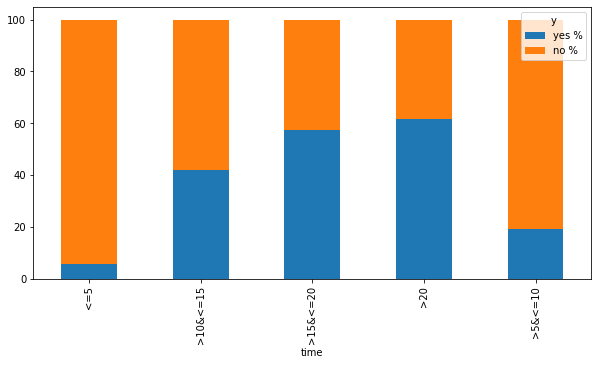

In [58]:
df=pd.crosstab(minutes['time'],minutes['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

In [59]:
yes=pd.DataFrame(minutes[minutes['y']=='yes']['time'].value_counts()/len(minutes['time'])*100).reset_index()
no=pd.DataFrame(minutes[minutes['y']=='no']['time'].value_counts()/len(minutes['time'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'time','time_x':'subscribed%' ,
                                                         'time_y':'not subscribed%'})
print('percentage of the client wrt Mode of Contact')
print(distribution)

yes=pd.DataFrame(minutes[minutes['y']=='yes']['time'].value_counts()/len(minutes[minutes['y']=='yes'])*100).reset_index()
no=pd.DataFrame(minutes[minutes['y']=='no']['time'].value_counts()/len(minutes[minutes['y']=='no'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'time','time_x':'subscribed%' ,
                                                         'time_y':'not subscribed%'})
print('\npercentage of the client wrt Mode of Contact')
print(distribution)

percentage of the client wrt Mode of Contact
       time  subscribed%  not subscribed%
0       <=5     4.049899        68.801840
1   >5&<=10     3.594258        15.171087
2  >10&<=15     2.196368         3.050143
3  >15&<=20     1.092654         0.805114
4       >20     0.765300         0.473336

percentage of the client wrt Mode of Contact
       time  subscribed%  not subscribed%
0       <=5    34.619021        77.916938
1   >5&<=10    30.724144        17.181003
2  >10&<=15    18.774816         3.454236
3  >15&<=20     9.340140         0.911778
4       >20     6.541879         0.536045


    looks like 65 percent of the subscribers has time cintact duration less than 10 minutes

    Note: concidering time duration greater than 10 minutes 
        35 percent of the subscribers  
        while 5 % of non subscribing clients clients that has not subscribed

        we can say chances of client subscribing is way more when call duration is greater than 10 minutes

## Other Attributes

### campaign
      13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


In [60]:
total=pd.DataFrame(bank['campaign'].value_counts()).reset_index().rename(
    columns={'index':'number_of_approaches','campaign':'total'})

yes=pd.DataFrame(bank[bank['y']=='yes']['campaign'].value_counts()).reset_index().rename(
    columns={'index':'number_of_approaches','campaign':'yes'})

no=pd.DataFrame(bank[bank['y']=='no']['campaign'].value_counts()).reset_index().rename(
    columns={'index':'number_of_approaches','campaign':'no'})

success=pd.merge(pd.merge(total,yes,on='number_of_approaches',how='outer'),no,on='number_of_approaches',how='outer')
success['successrate']=success[success['number_of_approaches']<=32]['yes']/success['total']*100
success

number_of_approaches  total     yes     no  successrate
0                      1  17544  2561.0  14983    14.597583
1                      2  12505  1401.0  11104    11.203519
2                      3   5521   618.0   4903    11.193624
3                      4   3522   317.0   3205     9.000568
4                      5   1764   139.0   1625     7.879819
5                      6   1291    92.0   1199     7.126259
6                      7    735    47.0    688     6.394558
7                      8    540    32.0    508     5.925926
8                      9    327    21.0    306     6.422018
9                     10    266    14.0    252     5.263158
10                    11    201    16.0    185     7.960199
11                    12    155     4.0    151     2.580645
12                    13    133     6.0    127     4.511278
13                    14     93     4.0     89     4.301075
14                    15     84     4.0     80     4.761905
15                    16     79     2.0     77     2.531646
16                    17     69     6.0     63     8.695652
17                    18     51     NaN     51          NaN
18                    19     44     NaN     44          NaN
19                    20     43     1.0     42     2.325581
20                    21     35     1.0     34     2.857143
21                    22     23     NaN     23          NaN
22                    25     22     NaN     22          NaN
23                    23     22     NaN     22          NaN
24                    24     20     1.0     19     5.000000
25                    28     16     NaN     16          NaN
26                    29     16     1.0     15     6.250000
27                    26     13     NaN     13          NaN
28                    31     12     NaN     12          NaN
29                    27     10     NaN     10          NaN
30                    32      9     1.0      8    11.111111
31                    30      8     NaN      8          NaN
32                    33      6     NaN      6          NaN
33                    34      5     NaN      5          NaN
34                    35      4     NaN      4          NaN
35                    36      4     NaN      4          NaN
36                    38      3     NaN      3          NaN
37                    43      3     NaN      3          NaN
38                    37      2     NaN      2          NaN
39                    50      2     NaN      2          NaN
40                    41      2     NaN      2          NaN
41                    51      1     NaN      1          NaN
42                    58      1     NaN      1          NaN
43                    39      1     NaN      1          NaN
44                    55      1     NaN      1          NaN
45                    44      1     NaN      1          NaN
46                    46      1     NaN      1          NaN
47                    63      1     NaN      1          NaN

    we see that 87% of subscribers comes from first 3 attemts only and the no of subscribers decreases from so on
    such that .55% of subscribers comes from more than 10 attempts 
    if we look at the success rate it is more than 10% for first 10 attempts

In [61]:
print('percentage of subscribers in first 10 attepts')
print((success[success['number_of_approaches']<=32]['yes']/success['yes'].sum()*100)[0:10])

percentage of subscribers in first 10 attepts
0    48.421252
1    26.488939
2    11.684628
3     5.993572
4     2.628096
5     1.739459
6     0.888637
7     0.605029
8     0.397050
9     0.264700
Name: yes, dtype: float64


In [62]:
(success[success['number_of_approaches']<=32]['no']/success['no'].sum()*100)[0:10]

0    37.530685
1    27.814238
2    12.281449
3     8.028155
4     4.070437
5     3.003357
6     1.723361
7     1.272481
8     0.766495
9     0.631231
Name: no, dtype: float64

In [63]:
success['no'].sum()+success['yes'].sum()

45211.0

Text(0.5, 0, 'success rate')

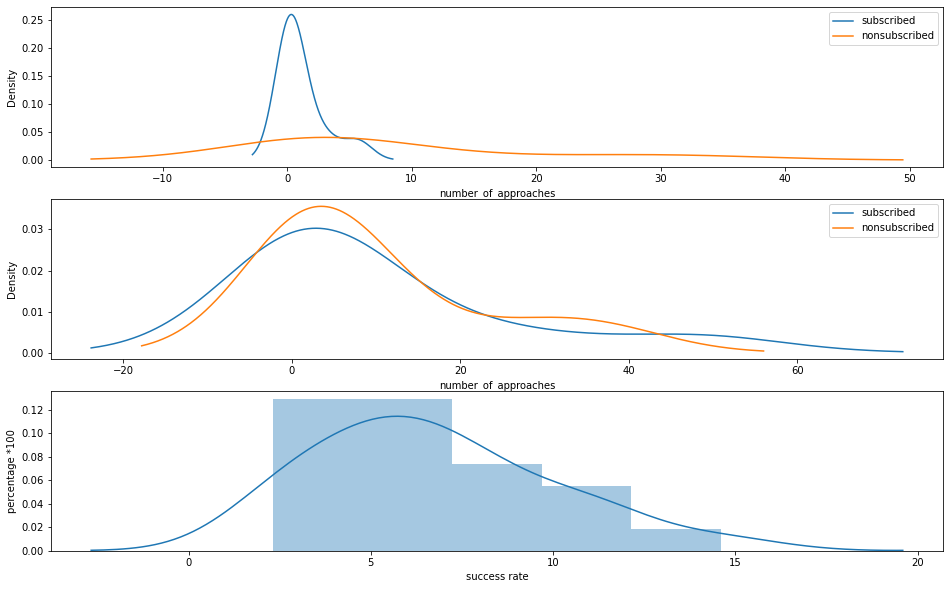

In [64]:
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
(success[success['number_of_approaches']<=32]['yes']/45211.0*100)[0:10].plot(kind='density',label='subscribed')
(success[success['number_of_approaches']<=32]['no']/45211.0*100)[0:10].plot(kind='density',label='nonsubscribed')
plt.xlabel('number_of_approaches')
plt.legend()
plt.subplot(3,1,2)
(success[success['number_of_approaches']<=32]['yes']/success['yes'].sum()*100)[0:10].plot(kind='density',label='subscribed')
(success[success['number_of_approaches']<=32]['no']/success['no'].sum()*100)[0:10].plot(kind='density',label='nonsubscribed')
plt.legend()
plt.xlabel('number_of_approaches')
plt.subplot(3,1,3)
sns.distplot(success['successrate'])
plt.ylabel('percentage *100')
plt.xlabel('success rate')

### Pdays
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

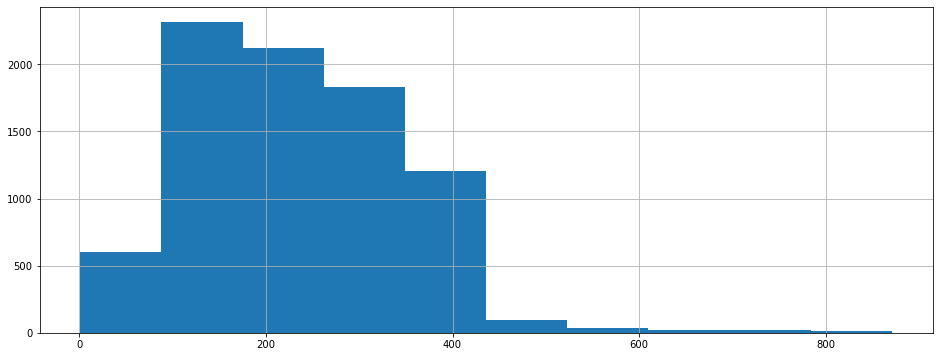

In [65]:
bank[bank['pdays']>0]['pdays'].hist()

    as seen if pdays =-1 then client has never been contacted before

In [66]:
k=[]
for i in bank['pdays']:
    if i==-1:
        k.append('newClients')
    else:
        k.append('oldClients')
df=bank[['y']].copy(deep=True)
df['type']=k

y              no   yes  total       no %      yes %
type                                                
newClients  33570  3384  36954  90.842669   9.157331
oldClients   6352  1905   8257  76.928667  23.071333


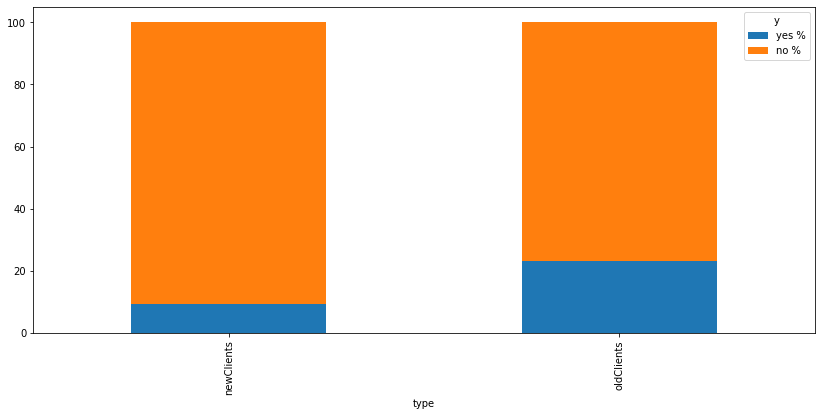

In [67]:
df=pd.crosstab(df['type'],df['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

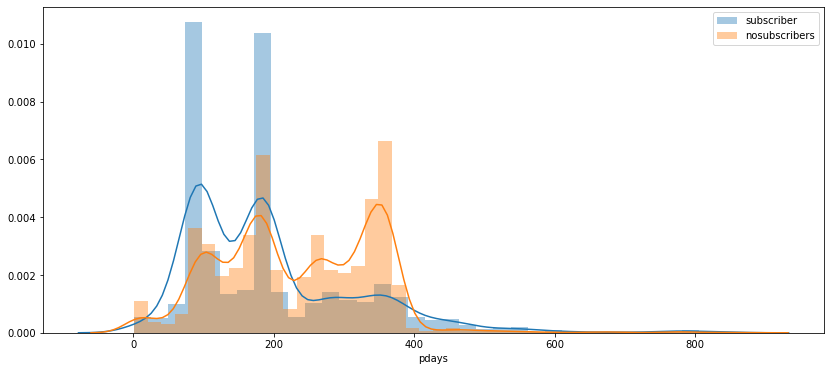

In [68]:

client=bank[bank['pdays']>-1][['pdays','y']]
sns.distplot(client[client['y']=='yes']['pdays'],label='subscriber')
sns.distplot(client[client['y']=='no']['pdays'],label='nosubscribers')
plt.legend()
plt.show()

    If the old client is too old >200 days then chances of non subscribing are more

### previous
      15 - previous: number of contacts performed before this campaign and for this client (numeric)


In [69]:
print('number of newly approached clients')
print(bank[bank['pdays']==-1].shape[0])
print('number of clients who were approached zero times before this')
print(bank[bank['previous']==0].shape[0])
print('number of old  clients')
print(bank[bank['pdays']>-1].shape[0])
print('number of clients who were approached zro times before this')
print(bank[bank['previous']>0].shape[0])

number of newly approached clients
36954
number of clients who were approached zero times before this
36954
number of old  clients
8257
number of clients who were approached zro times before this
8257


proportion of old clients new clients subscribed/not subscribed
y              no   yes  total       no %      yes %
type                                                
newClients   6352  1905   8257  76.928667  23.071333
oldClients  33570  3384  36954  90.842669   9.157331


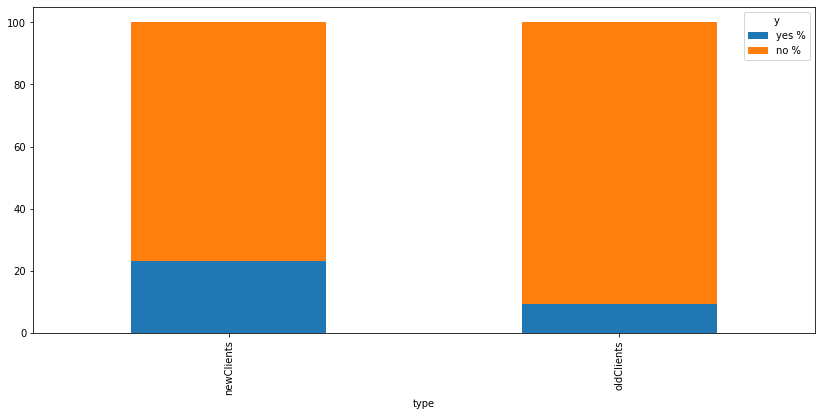

In [70]:
k=[]
for i in bank['pdays']:
    if i>0:
        k.append('newClients')
    else:
        k.append('oldClients')
df=bank[['y']].copy(deep=True)
df['type']=k

print('proportion of old clients new clients subscribed/not subscribed')
df=pd.crosstab(df['type'],minutes['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

    we can say presence of high collinearity with pdays since -1 in  pday means new client which is 36954 and here 
    no of contacts =0 is 36954
     
     as before 3384 out of 33570 approached clients turned out  subscribing

    concidering data for more than 0

Text(0.5, 0, 'no of approaches made previously for old clients data upto 15 approaches')

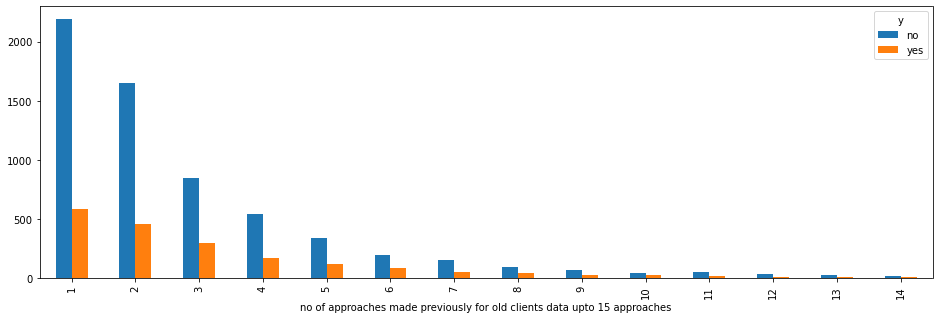

In [71]:
k=bank[bank['previous']>0][['previous','y']]
plt.rcParams['figure.figsize']=[16,5]
pd.crosstab(k[k['previous']<15]['previous'],k[k['previous']<15]['y']).plot(kind='bar')
plt.xlabel('no of approaches made previously for old clients data upto 15 approaches')

    Hence we can say higher chances of clients to subscribe in first 3 contacts
    
    Note: Data for previous looks collinear with pdays and capaign

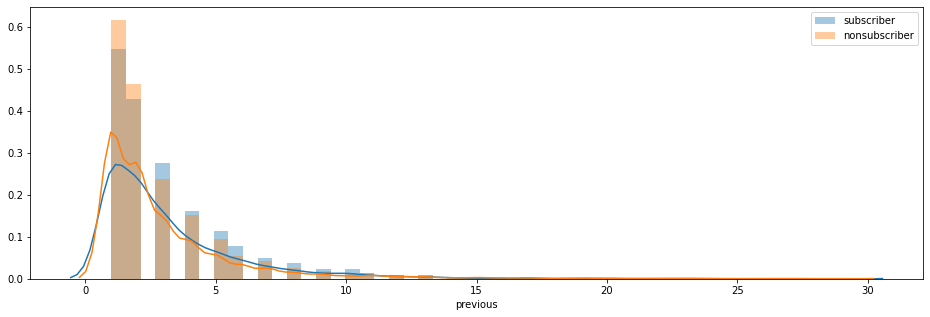

In [72]:
sns.distplot(bank[(bank['previous']>0)&(bank['previous']<30)&(bank['y']=='yes')]['previous'],label='subscriber')
sns.distplot(bank[(bank['previous']>0)&(bank['previous']<30)&(bank['y']=='no')]['previous'],label='nonsubscriber')
plt.legend()
plt.show()

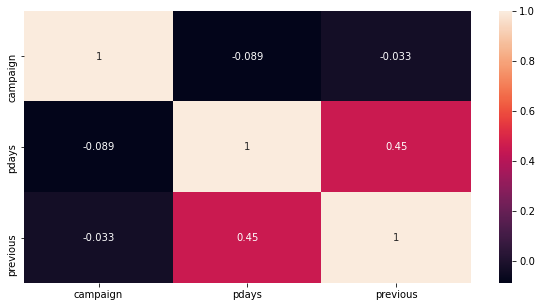

In [73]:
plt.rcParams['figure.figsize']=[10,5]
sns.heatmap(bank[['campaign','pdays','previous']].corr(),annot=True)
plt.show()

### Poutcome
      16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


In [74]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

y            no   yes  total       no %      yes %
poutcome                                          
failure    4283   618   4901  87.390329  12.609671
other      1533   307   1840  83.315217  16.684783
success     533   978   1511  35.274653  64.725347
unknown   33573  3386  36959  90.838497   9.161503


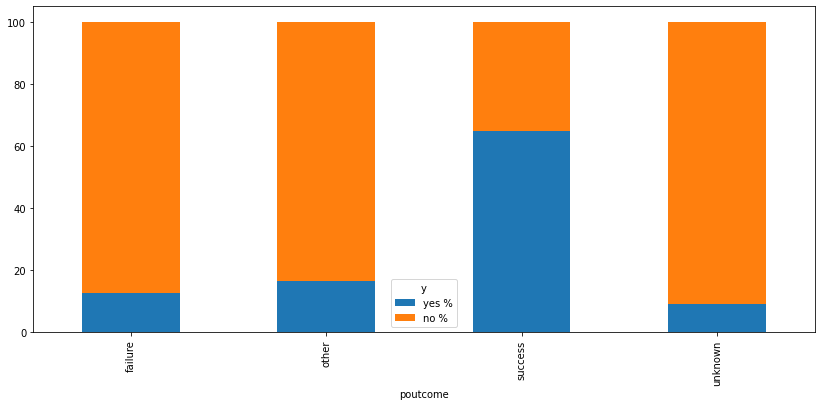

In [75]:
df=pd.crosstab(bank['poutcome'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

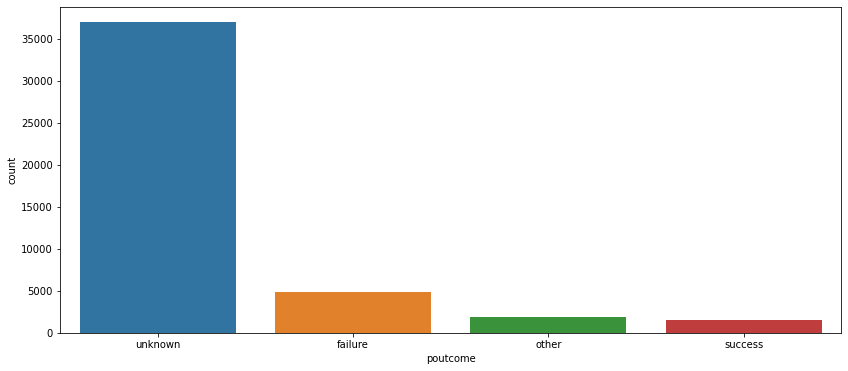

In [76]:

sns.countplot(bank['poutcome'])
plt.show()

    poutcome for unknown =36959, while newly contacted clients=36954 hence looks to be collinear

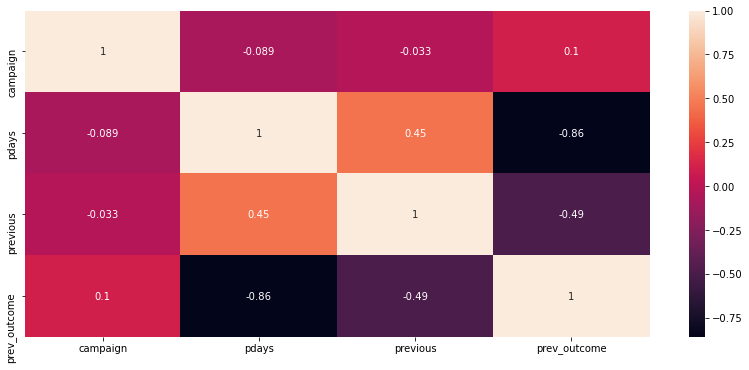

In [77]:
k=bank[['campaign','pdays','previous']].copy(deep=True)
k['prev_outcome']=le.fit_transform(bank['poutcome'])
sns.heatmap(k.corr(),annot=True)
plt.show()

hence we can see high correlation with previous,pdays

#### BIVARIATE MULTIVARIATE

#### AGE - DEFAULT

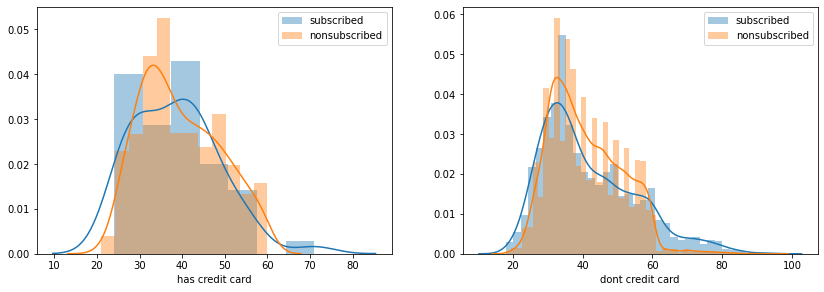

In [78]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['default']=='yes')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['default']=='yes')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('has credit card')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['default']=='no')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['default']=='no')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('dont credit card')
plt.legend()
plt.show()

y                        no   yes
Groups       default             
25<Group<=45 no       25728  3130
             yes        529    40
45<Group<=65 no       12001  1470
             yes        217     9
Group<25     no         999   318
             yes         17     2
Group>65     no         431   319
             yes          0     1


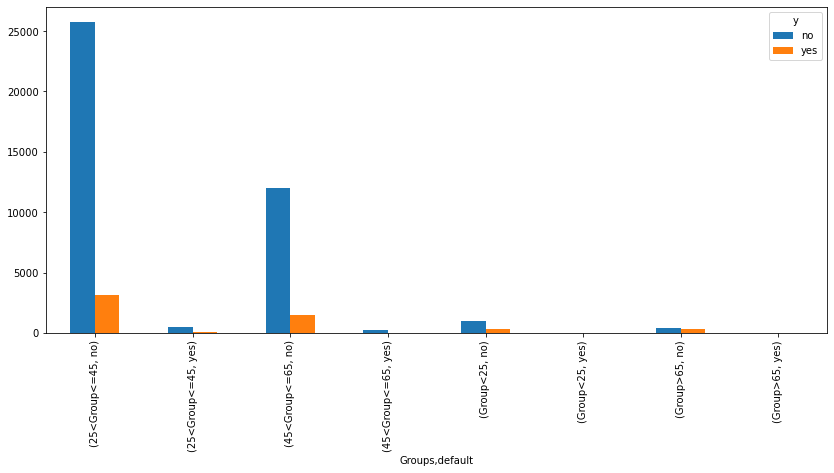

In [79]:
age,k=bank[['age','default','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
print(pd.crosstab([age['Groups'],age['default']],age['y']))
plt.rcParams['figure.figsize']=[14,6]
pd.crosstab([age['Groups'],age['default']],age['y']).plot(kind='bar')

###### AGE Housing

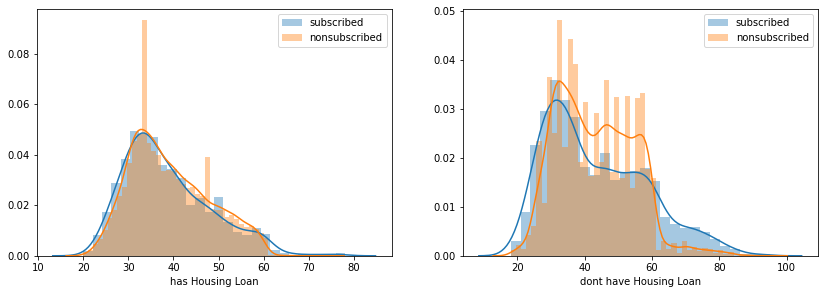

In [80]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['housing']=='yes')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['housing']=='yes')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('has Housing Loan')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['housing']=='no')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['housing']=='no')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('dont have Housing Loan')
plt.legend()
plt.show()

y                        no   yes
Groups       housing             
25<Group<=45 no        9403  1747
             yes      16854  1423
45<Group<=65 no        6510  1052
             yes       5708   427
Group<25     no         389   250
             yes        627    70
Group>65     no         425   305
             yes          6    15


Text(0.5, 0, 'HOUSING LOAN')

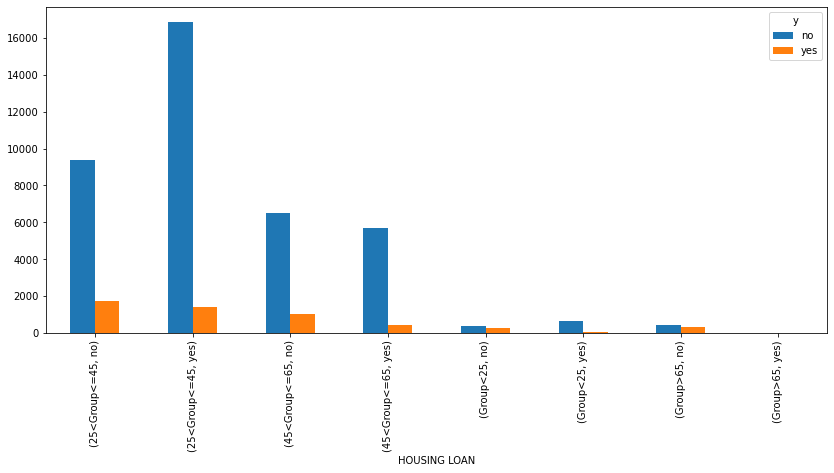

In [81]:
age,k=bank[['age','housing','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
print(pd.crosstab([age['Groups'],age['housing']],age['y']))
plt.rcParams['figure.figsize']=[14,6]
pd.crosstab([age['Groups'],age['housing']],age['y']).plot(kind='bar')
plt.xlabel('HOUSING LOAN')

#### Age-Loan

no     37967
yes     7244
Name: loan, dtype: int64


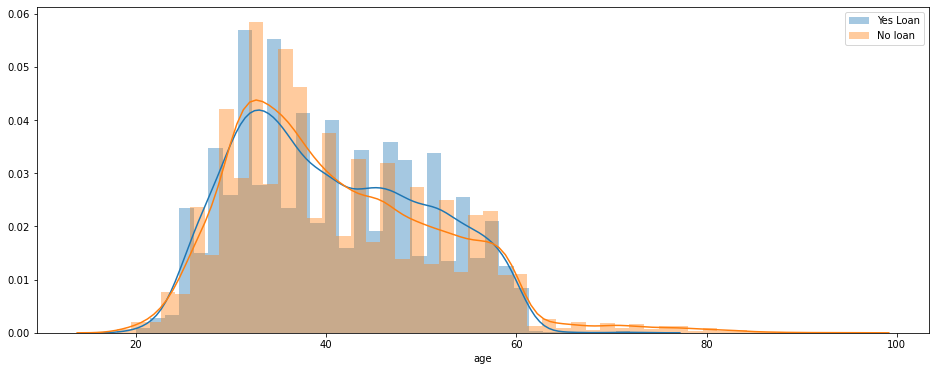

In [82]:
plt.rcParams['figure.figsize']=[16,6]
print(bank['loan'].value_counts())
sns.distplot(bank[(bank['loan']=='yes')]['age'],label='Yes Loan')
sns.distplot(bank[(bank['loan']=='no')]['age'],label='No loan')
plt.legend()

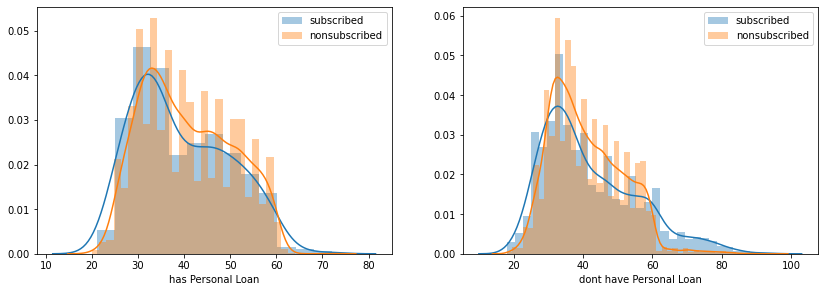

In [83]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['loan']=='yes')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['loan']=='yes')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('has Personal Loan')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['loan']=='no')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['loan']=='no')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('dont have Personal Loan')
plt.legend()
plt.show()

y                     no   yes
Groups       loan             
25<Group<=45 no    21857  2858
             yes    4400   312
45<Group<=65 no    10013  1335
             yes    2205   144
Group<25     no      863   294
             yes     153    26
Group>65     no      429   318
             yes       2     2


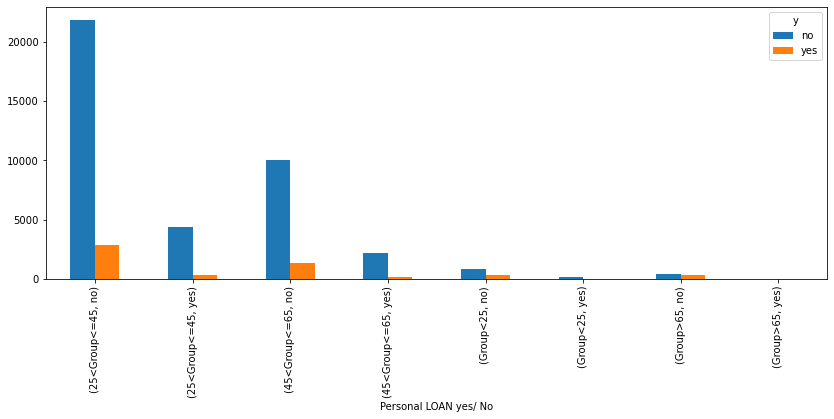

In [84]:
age,k=bank[['age','loan','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
print(pd.crosstab([age['Groups'],age['loan']],age['y']))
plt.rcParams['figure.figsize']=[14,5]
pd.crosstab([age['Groups'],age['loan']],age['y']).plot(kind='bar')
plt.xlabel('Personal LOAN yes/ No')
plt.show()

#### JOB  - AGE

In [85]:
age,k=bank[['age','job','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
age['Groups']=k

In [86]:
df=pd.crosstab([age['Groups'],age['job']],age['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)

y                             no  yes  total   %no  %yes
Groups       job                                        
25<Group<=45 admin.         3198  421   3619  88.0  12.0
             management     5649  898   6547  86.0  14.0
             self-employed   944  136   1080  87.0  13.0
             student         405  120    525  77.0  23.0
             technician     4907  591   5498  89.0  11.0
             unemployed      720  130    850  85.0  15.0
             unknown          99   15    114  87.0  13.0
45<Group<=65 admin.         1204  181   1385  87.0  13.0
             management     2405  361   2766  87.0  13.0
             retired        1319  231   1550  85.0  15.0
             technician     1716  214   1930  89.0  11.0
             unemployed      359   67    426  84.0  16.0
             unknown         144   17    161  89.0  11.0
Group<25     admin.          131   27    158  83.0  17.0
             blue-collar     224   41    265  85.0  15.0
             management       7

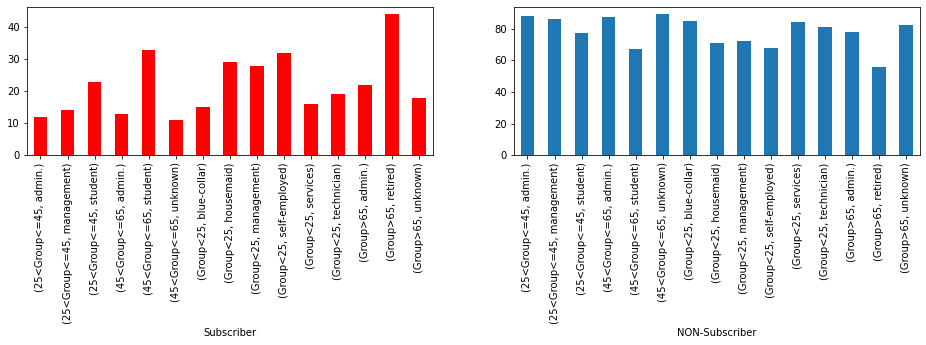

In [87]:
print(df[(df['%yes']>10)&(df['total']>100)])
print('Representating only clients where conversion rates are higher than 10percent')
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df[(df['%yes']>10)&(df['total'])]['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df[(df['%yes']>10)&(df['total'])]['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

###### Marital - Age

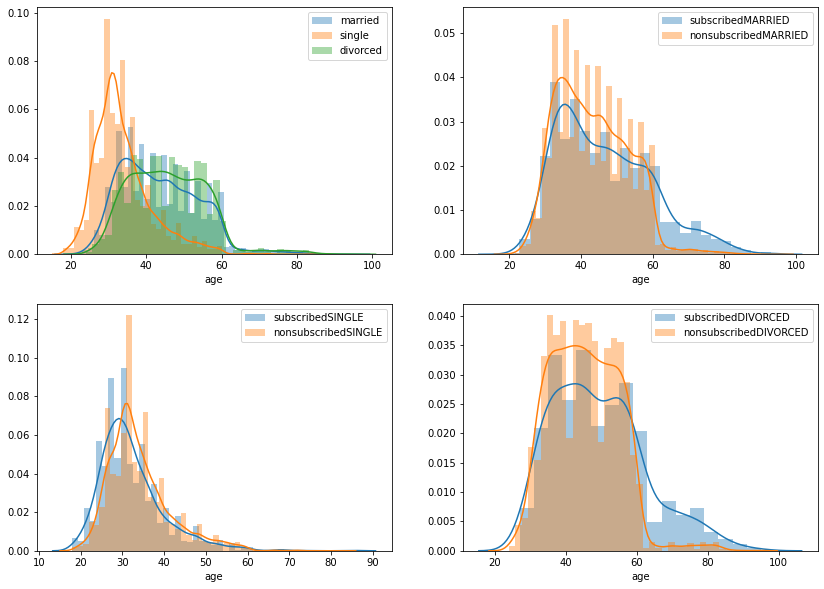

In [88]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[bank['marital']=='married']['age'],label='married')
sns.distplot(bank[bank['marital']=='single']['age'],label='single')
sns.distplot(bank[bank['marital']=='divorced']['age'],label='divorced')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['marital']=='married')&(bank['y']=='yes')]['age'],label='subscribedMARRIED')
sns.distplot(bank[(bank['marital']=='married')&(bank['y']=='no')]['age'],label='nonsubscribedMARRIED')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(bank[(bank['marital']=='single')&(bank['y']=='yes')]['age'],label='subscribedSINGLE')
sns.distplot(bank[(bank['marital']=='single')&(bank['y']=='no')]['age'],label='nonsubscribedSINGLE')
plt.legend()
plt.subplot(2,2,4)
sns.distplot(bank[(bank['marital']=='divorced')&(bank['y']=='yes')]['age'],label='subscribedDIVORCED')
sns.distplot(bank[(bank['marital']=='divorced')&(bank['y']=='no')]['age'],label='nonsubscribedDIVORCED')
plt.legend()
plt.show()

In [89]:
age,k=bank[['age','marital','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
age['Groups']=k

y                no   yes  total       no %      yes %
Groups                                                
25<Group<=45  26257  3170  29427  89.227580  10.772420
45<Group<=65  12218  1479  13697  89.202015  10.797985
Group<25       1016   320   1336  76.047904  23.952096
Group>65        431   320    751  57.390146  42.609854


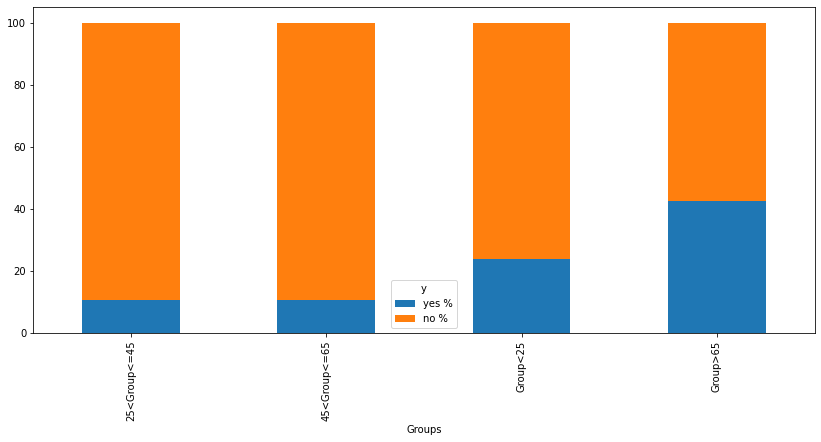

In [90]:
df=pd.crosstab(age['Groups'],age['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

###### AGE-Education

In [91]:
education=bank[['age','education','y']].copy(deep=True)
education['education']=education['education'].mask(education['education']=='unknown','primary')
education['education'].value_counts()

secondary    23202
tertiary     13301
primary       8708
Name: education, dtype: int64

y                no   yes  total       no %      yes %
Groups                                                
25<Group<=45  26257  3170  29427  89.227580  10.772420
45<Group<=65  12218  1479  13697  89.202015  10.797985
Group<25       1016   320   1336  76.047904  23.952096
Group>65        431   320    751  57.390146  42.609854


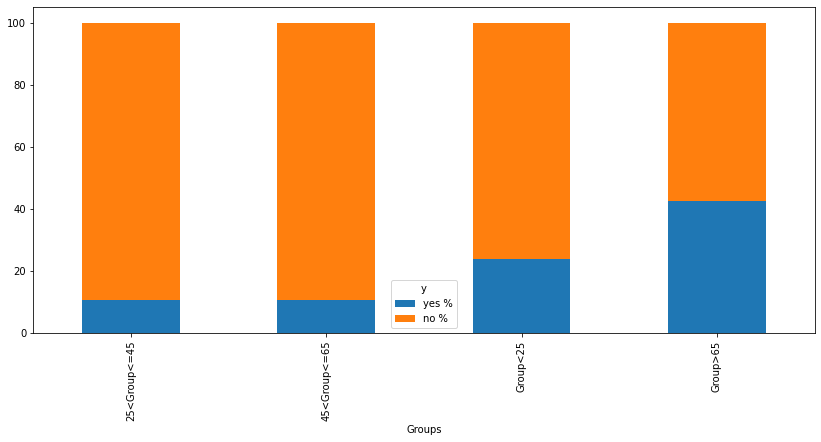

In [92]:
k=[]
plt.rcParams['figure.figsize']=[14,6]
for i in education['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
education['Groups']=k
df=pd.crosstab(education['Groups'],education['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

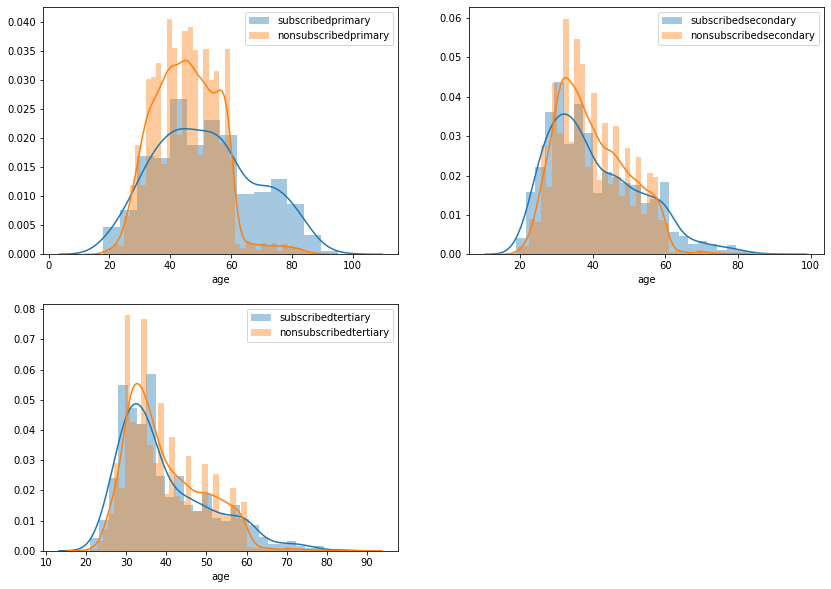

In [93]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['education']=='primary')&(bank['y']=='yes')]['age'],label='subscribedprimary')
sns.distplot(bank[(bank['education']=='primary')&(bank['y']=='no')]['age'],label='nonsubscribedprimary')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['education']=='secondary')&(bank['y']=='yes')]['age'],label='subscribedsecondary')
sns.distplot(bank[(bank['education']=='secondary')&(bank['y']=='no')]['age'],label='nonsubscribedsecondary')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(bank[(bank['education']=='tertiary')&(bank['y']=='yes')]['age'],label='subscribedtertiary')
sns.distplot(bank[(bank['education']=='tertiary')&(bank['y']=='no')]['age'],label='nonsubscribedtertiary')
plt.legend()
plt.show()

#### AGE Contact

In [94]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

y                       total_approached  percentage no  percentage yes
Groups       contact                                                   
25<Group<=45 cellular              19566           86.0            14.0
             telephone              1225           90.0            10.0
             unknown                8636           96.0             4.0
45<Group<=65 cellular               8385           86.0            14.0
             telephone              1318           89.0            11.0
             unknown                3994           97.0             3.0
Group<25     cellular                874           67.0            33.0
             telephone                72           82.0            18.0
             unknown                 390           95.0             5.0
Group>65     cellular                460           55.0            45.0
             telephone               291           62.0            38.0


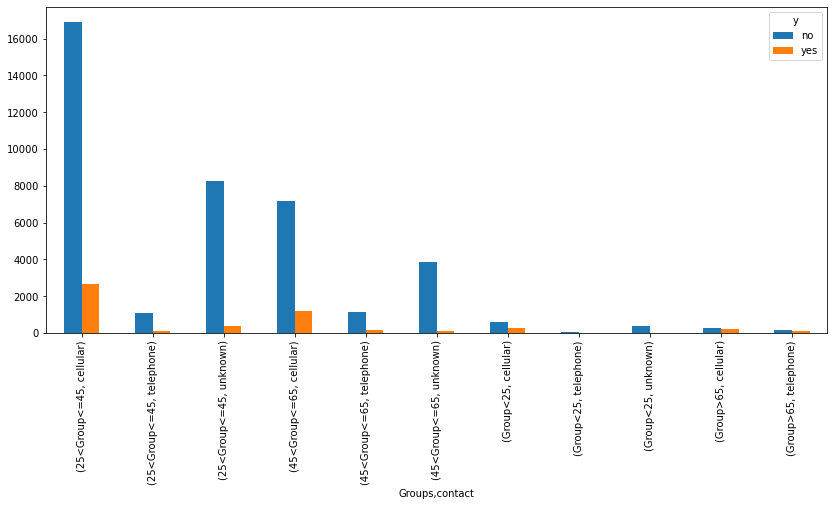

In [95]:
age,k=bank[['age','contact','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
#print(pd.crosstab([age['Groups'],age['contact']],age['y']))
plt.rcParams['figure.figsize']=[14,6]
pd.crosstab([age['Groups'],age['contact']],age['y']).plot(kind='bar')
df=pd.crosstab([age['Groups'],age['contact']],age['y'])
df['total_approached']=df['no']+df['yes']
df['percentage no']=np.round(df['no']*100/df['total_approached'])
df['percentage yes']=np.round(df['yes']*100/df['total_approached'])
print(df[['total_approached','percentage no','percentage yes']])

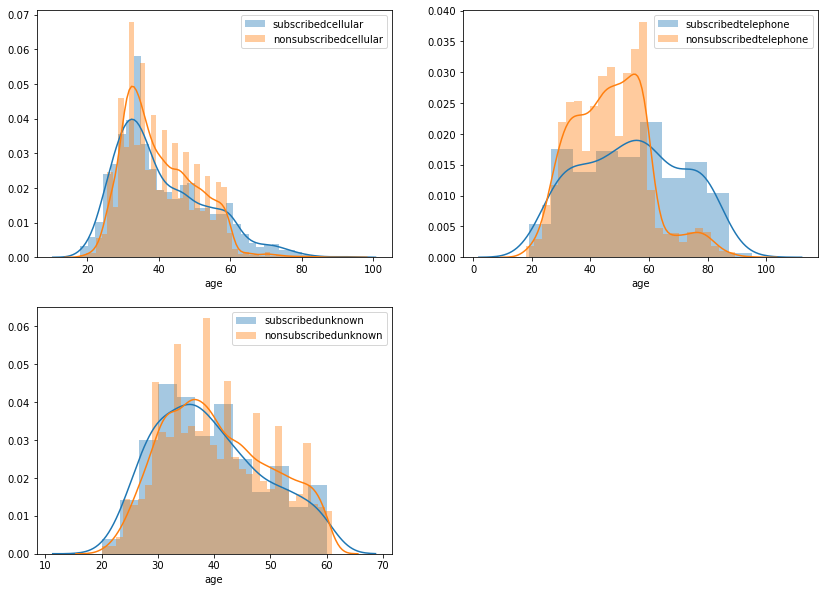

In [96]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['contact']=='cellular')&(bank['y']=='yes')]['age'],label='subscribedcellular')
sns.distplot(bank[(bank['contact']=='cellular')&(bank['y']=='no')]['age'],label='nonsubscribedcellular')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['contact']=='telephone')&(bank['y']=='yes')]['age'],label='subscribedtelephone')
sns.distplot(bank[(bank['contact']=='telephone')&(bank['y']=='no')]['age'],label='nonsubscribedtelephone')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(bank[(bank['contact']=='unknown')&(bank['y']=='yes')]['age'],label='subscribedunknown')
sns.distplot(bank[(bank['contact']=='unknown')&(bank['y']=='no')]['age'],label='nonsubscribedunknown')
plt.legend()
plt.show()

#### AGE-Poutcome

y                      total_approached  percentage no  percentage yes
Groups       poutcome                                                 
25<Group<=45 failure               3379           88.0            12.0
             other                 1268           85.0            15.0
             success                872           39.0            61.0
45<Group<=65 failure               1312           88.0            12.0
             other                  458           82.0            18.0
             success                441           32.0            68.0
Group<25     failure                106           79.0            21.0
             other                   64           69.0            31.0
             success                 76           22.0            78.0
Group>65     failure                104           67.0            33.0
             other                   50           60.0            40.0
             success                122           28.0            72.0


Text(0.5, 0, 'Previous Outcome NO/Yes')

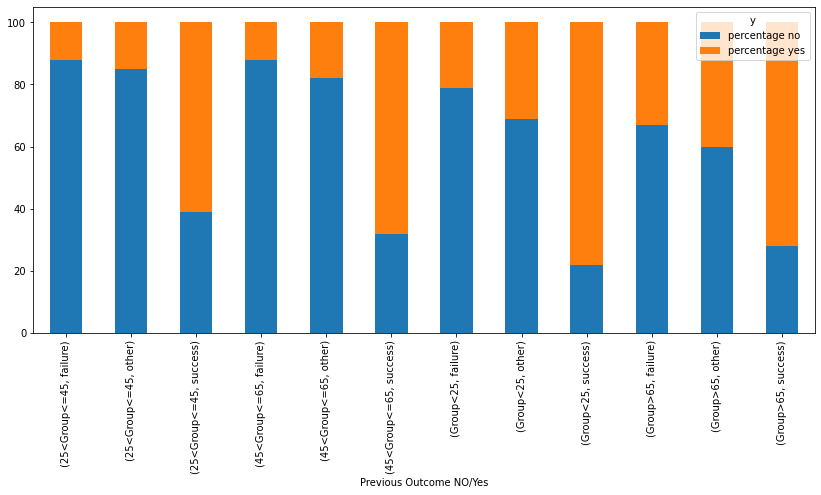

In [97]:
age,k=bank[bank['poutcome']!='unknown'][['age','poutcome','y']].copy(deep=True),[]
for i in age['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
#print(pd.crosstab([age['Groups'],age['contact']],age['y']))
plt.rcParams['figure.figsize']=[14,6]
df=pd.crosstab([age['Groups'],age['poutcome']],age['y'])
df['total_approached']=df['no']+df['yes']
df['percentage no']=np.round(df['no']*100/df['total_approached'])
df['percentage yes']=np.round(df['yes']*100/df['total_approached'])
print(df[['total_approached','percentage no','percentage yes']])
(df[['percentage no','percentage yes']]).plot(kind='bar',stacked=True)
plt.xlabel('Previous Outcome NO/Yes')

y                      total_approached  percentage no  percentage yes
Groups       poutcome                                                 
25<Group<=45 unknown              23908           91.0             9.0
45<Group<=65 unknown              11486           92.0             8.0
Group<25     unknown               1090           80.0            20.0
Group>65     unknown                475           63.0            37.0


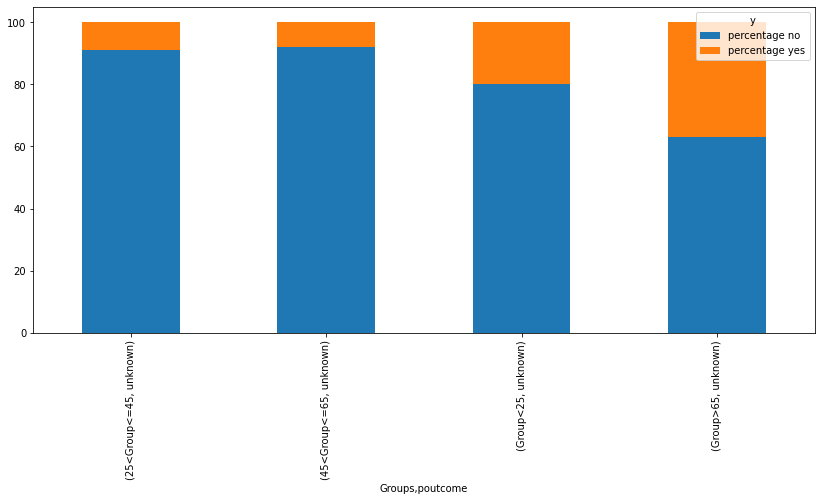

In [98]:
age,k=bank[bank['poutcome']=='unknown'][['age','poutcome','y']].copy(deep=True),[]
for i in age['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
df=pd.crosstab([age['Groups'],age['poutcome']],age['y'])
df['total_approached']=df['no']+df['yes']
df['percentage no']=np.round(df['no']*100/df['total_approached'])
df['percentage yes']=np.round(df['yes']*100/df['total_approached'])
print(df[['total_approached','percentage no','percentage yes']])
df[['percentage no','percentage yes']].plot(kind='bar',stacked=True)

#### default','balance'

In [99]:
education=bank[['job','default','contact','poutcome','marital','housing','loan','month','education','balance','y']].copy(deep=True)

k=[]
for i in education['balance']:
    if i<0:
        k.append('NegetiveBalance')
    elif i==0:
        k.append('ZeroBalance')
    else:
        k.append('PositiveBalance')
education['categorical_balance']=k

In [100]:
print(pd.crosstab(bank['default'],bank['y']))

y           no   yes
default             
no       39159  5237
yes        763    52


Text(0.5, 0, 'donot have credit card')

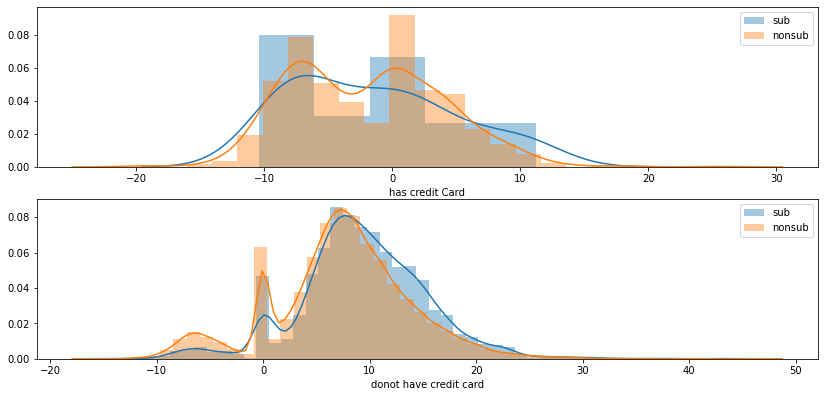

In [101]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(3,1,1)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['default']=='yes')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['default']=='yes')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('has credit Card')
plt.subplot(3,1,2)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['default']=='no')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['default']=='no')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('donot have credit card')

y                               no   yes  total        %no       %yes
default categorical_balance                                          
no      NegetiveBalance       3144   182   3326  94.527962   5.472038
        PositiveBalance      32902  4770  37672  87.338076  12.661924
        ZeroBalance           3113   285   3398  91.612713   8.387287
yes     NegetiveBalance        412    28    440  93.636364   6.363636
        PositiveBalance        242    17    259  93.436293   6.563707
        ZeroBalance            109     7    116  93.965517   6.034483


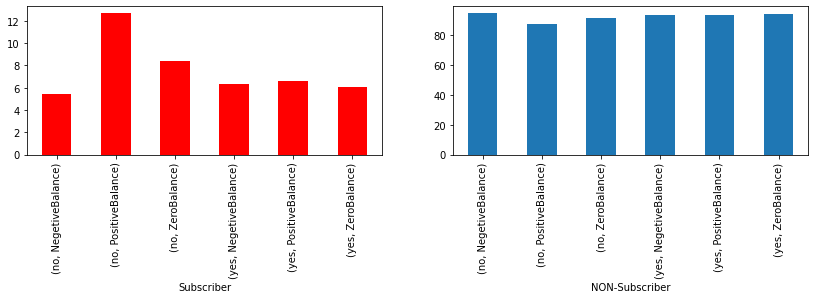

In [102]:
df=pd.crosstab([education['default'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=df['no']/df['total']*100
df['%yes']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
#df[['%no','%yes']].plot(kind='bar')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

#### Housing balance

In [103]:
print(pd.crosstab(bank['housing'],bank['y']))

y           no   yes
housing             
no       16727  3354
yes      23195  1935


Text(0.5, 0, 'donot have Housing Loan')

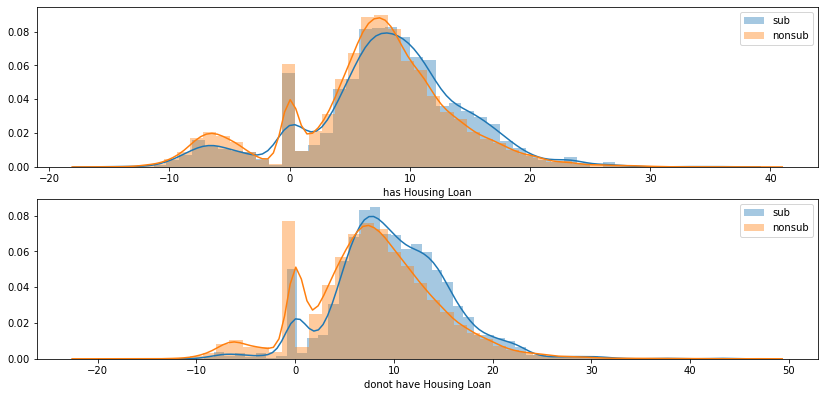

In [104]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(3,1,1)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['housing']=='yes')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['housing']=='yes')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('has Housing Loan')
plt.subplot(3,1,2)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['housing']=='no')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['housing']=='no')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('donot have Housing Loan')

y                               no   yes  total   %no  %yes
housing categorical_balance                                
no      NegetiveBalance        974    54   1028  95.0   5.0
        PositiveBalance      14074  3123  17197  82.0  18.0
        ZeroBalance           1679   177   1856  90.0  10.0
yes     NegetiveBalance       2582   156   2738  94.0   6.0
        PositiveBalance      19070  1664  20734  92.0   8.0
        ZeroBalance           1543   115   1658  93.0   7.0


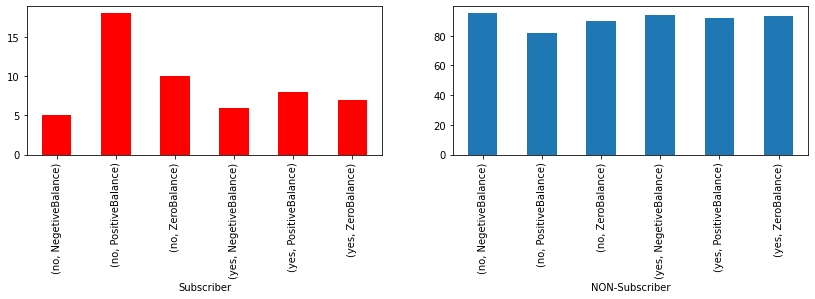

In [105]:
df=pd.crosstab([education['housing'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round((df['yes']/df['total']*100))
print(df)
plt.rcParams['figure.figsize']=[14,6]
#df[['%no','%yes']].plot(kind='bar')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

#### LOAN-BALANCE

In [106]:
print(pd.crosstab(bank['loan'],bank['y']))

y        no   yes
loan             
no    33162  4805
yes    6760   484


Text(0.5, 0, 'Non Subscriber')

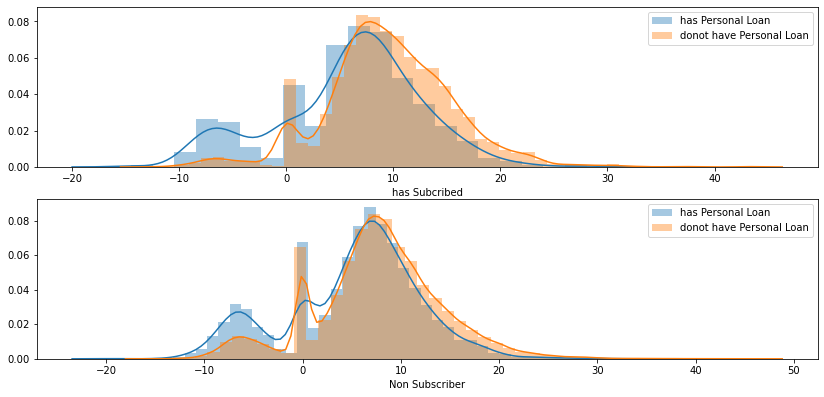

In [107]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(3,1,1)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['loan']=='yes')]['balance']),label='has Personal Loan')
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['loan']=='no')]['balance']),label='donot have Personal Loan')
plt.legend()
plt.xlabel('has Subcribed')
plt.subplot(3,1,2)
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['loan']=='yes')]['balance']),label='has Personal Loan')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['loan']=='no')]['balance']),label='donot have Personal Loan')
plt.legend()
plt.xlabel('Non Subscriber')

y                            no   yes  total   %no  %yes
loan categorical_balance                                
no   NegetiveBalance       2421   135   2556  95.0   5.0
     PositiveBalance      28044  4412  32456  86.0  14.0
     ZeroBalance           2697   258   2955  91.0   9.0
yes  NegetiveBalance       1135    75   1210  94.0   6.0
     PositiveBalance       5100   375   5475  93.0   7.0
     ZeroBalance            525    34    559  94.0   6.0


Text(0.5, 0, 'NON-Subscriber')

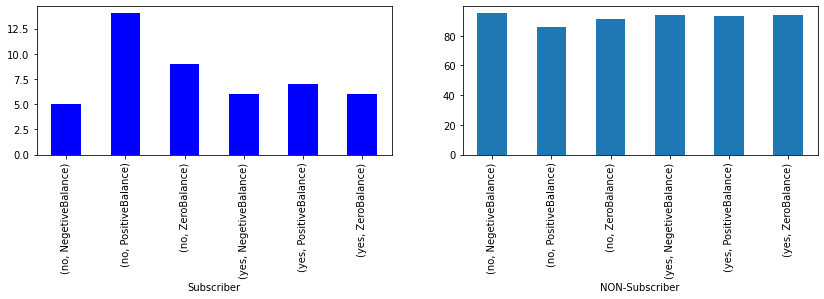

In [108]:
df=pd.crosstab([education['loan'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[14,6]
#df[['%no','%yes']].plot(kind='bar')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='b')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

#### Balance Marital

Text(0.5, 0, 'MARRIED')

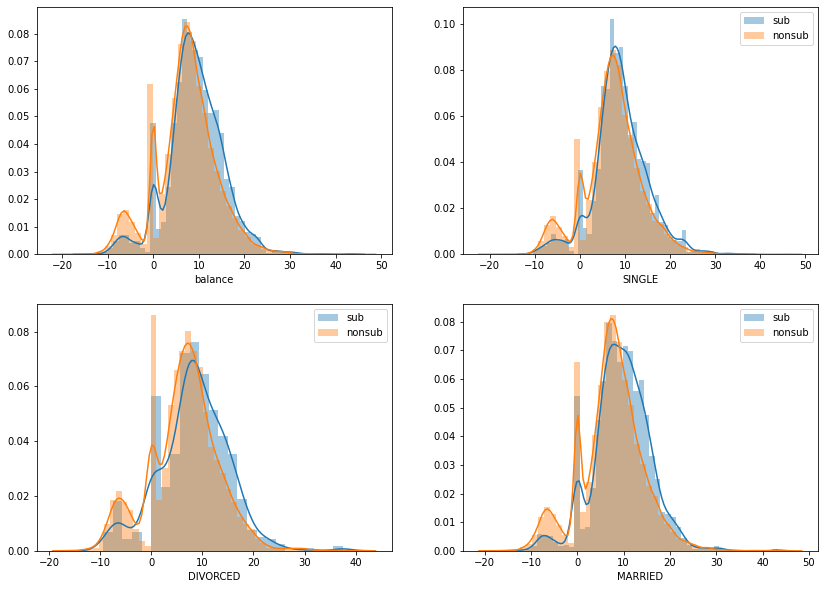

In [109]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(np.cbrt(bank[bank['y']=='yes']['balance']))
sns.distplot(np.cbrt(bank[bank['y']=='no']['balance']))
plt.subplot(2,2,2)
sns.distplot(np.cbrt(bank[(bank['y']=='yes')&(bank['marital']=='single')]['balance']),label='sub')
sns.distplot(np.cbrt(bank[(bank['y']=='no')&(bank['marital']=='single')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('SINGLE')
plt.subplot(2,2,3)
sns.distplot(np.cbrt(bank[(bank['y']=='yes')&(bank['marital']=='divorced')]['balance']),label='sub')
sns.distplot(np.cbrt(bank[(bank['y']=='no')&(bank['marital']=='divorced')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('DIVORCED')
plt.subplot(2,2,4)
sns.distplot(np.cbrt(bank[(bank['y']=='yes')&(bank['marital']=='married')]['balance']),label='sub')
sns.distplot(np.cbrt(bank[(bank['y']=='no')&(bank['marital']=='married')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('MARRIED')

y                                no   yes  total   %no  %yes
marital  categorical_balance                                
divorced NegetiveBalance        534    42    576  93.0   7.0
         PositiveBalance       3634   530   4164  87.0  13.0
         ZeroBalance            417    50    467  89.0  11.0
married  NegetiveBalance       2114    88   2202  96.0   4.0
         PositiveBalance      20242  2495  22737  89.0  11.0
         ZeroBalance           2103   172   2275  92.0   8.0
single   NegetiveBalance        908    80    988  92.0   8.0
         PositiveBalance       9268  1762  11030  84.0  16.0
         ZeroBalance            702    70    772  91.0   9.0


Text(0.5, 0, 'NON-Subscriber')

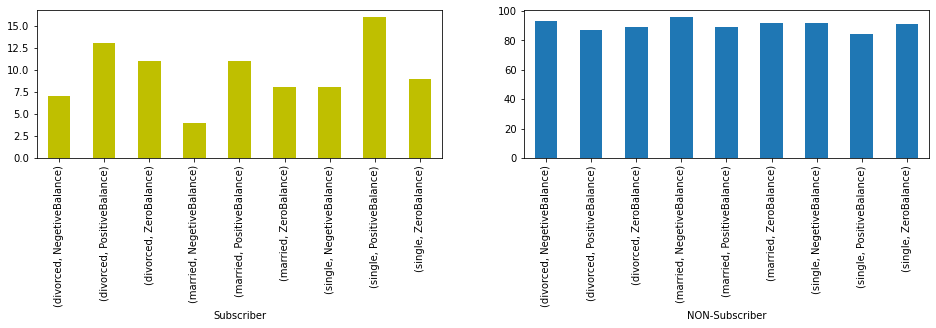

In [110]:
df=pd.crosstab([education['marital'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
#df[['%no','%yes']].plot(kind='bar')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='y')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

#### BALANCE-EDUCATION

In [111]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 0, 'primary')

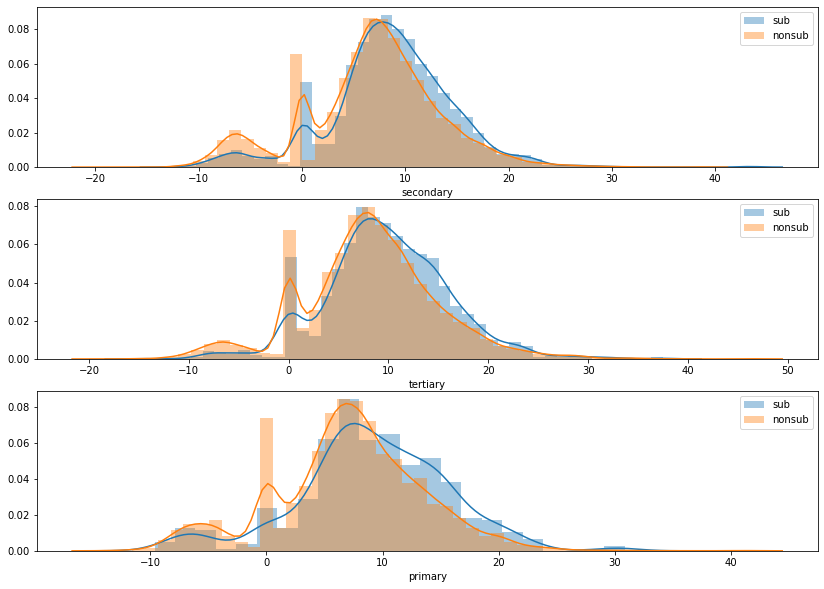

In [112]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(3,1,1)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['education']=='secondary')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['education']=='secondary')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('secondary')
plt.subplot(3,1,2)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['education']=='tertiary')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['education']=='tertiary')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('tertiary')
plt.subplot(3,1,3)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['education']=='primary')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['education']=='primary')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('primary')

y                                 no   yes  total   %no  %yes
education categorical_balance                                
primary   NegetiveBalance        572    35    607  94.0   6.0
          PositiveBalance       5176   531   5707  91.0   9.0
          ZeroBalance            512    25    537  95.0   5.0
secondary NegetiveBalance       2186   125   2311  95.0   5.0
          PositiveBalance      16982  2189  19171  89.0  11.0
          ZeroBalance           1584   136   1720  92.0   8.0
tertiary  NegetiveBalance        673    47    720  93.0   7.0
          PositiveBalance       9632  1823  11455  84.0  16.0
          ZeroBalance           1000   126   1126  89.0  11.0
unknown   NegetiveBalance        125     3    128  98.0   2.0
          PositiveBalance       1354   244   1598  85.0  15.0
          ZeroBalance            126     5    131  96.0   4.0


Text(0.5, 0, 'NON-Subscriber')

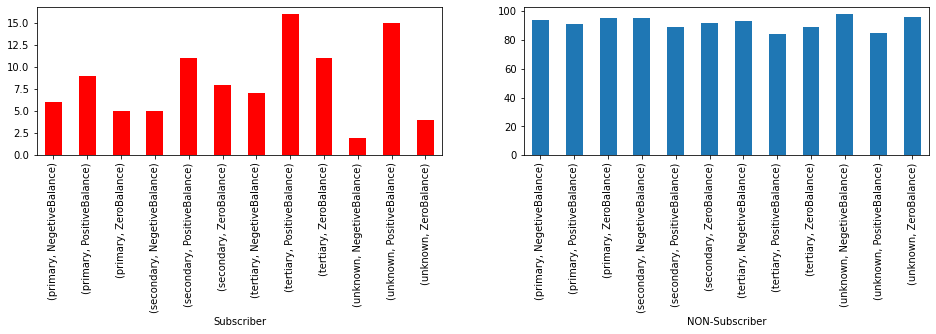

In [113]:
df=pd.crosstab([education['education'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

#### BALANCE- CONTACT

In [114]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 0, 'telephone')

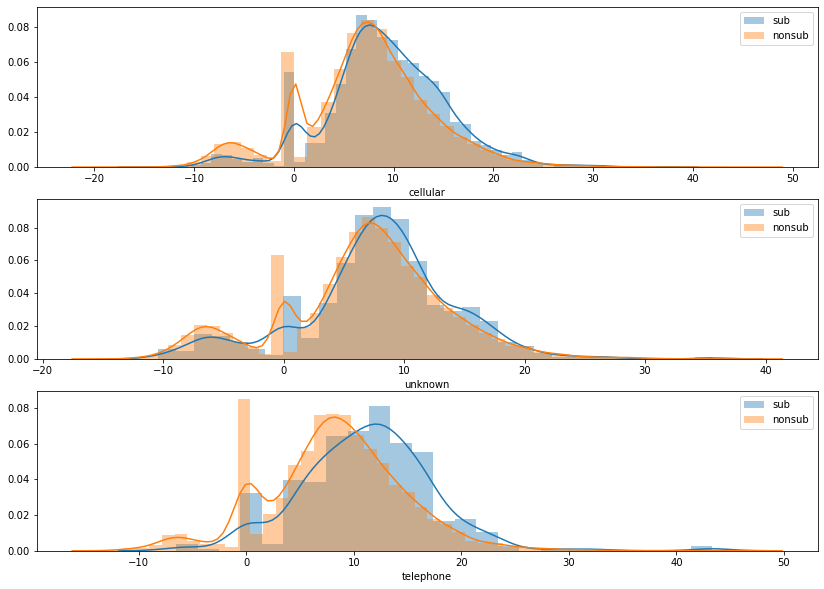

In [115]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(3,1,1)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['contact']=='cellular')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['contact']=='cellular')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('cellular')
plt.subplot(3,1,2)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['contact']=='unknown')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['contact']=='unknown')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('unknown')
plt.subplot(3,1,3)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['contact']=='telephone')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['contact']=='telephone')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('telephone')

y                                 no   yes  total   %no  %yes
contact   categorical_balance                                
cellular  NegetiveBalance       2004   159   2163  93.0   7.0
          PositiveBalance      20786  3965  24751  84.0  16.0
          ZeroBalance           2126   245   2371  90.0  10.0
telephone NegetiveBalance        119     4    123  97.0   3.0
          PositiveBalance       2145   366   2511  85.0  15.0
          ZeroBalance            252    20    272  93.0   7.0
unknown   NegetiveBalance       1433    47   1480  97.0   3.0
          PositiveBalance      10213   456  10669  96.0   4.0
          ZeroBalance            844    27    871  97.0   3.0


Text(0.5, 0, 'NON-Subscriber')

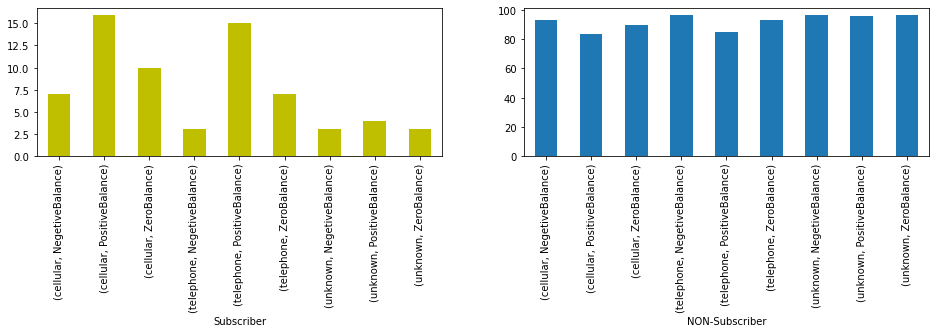

In [116]:
df=pd.crosstab([education['contact'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='y')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

#### BALANCE-Poutcome

In [117]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 0, 'other')

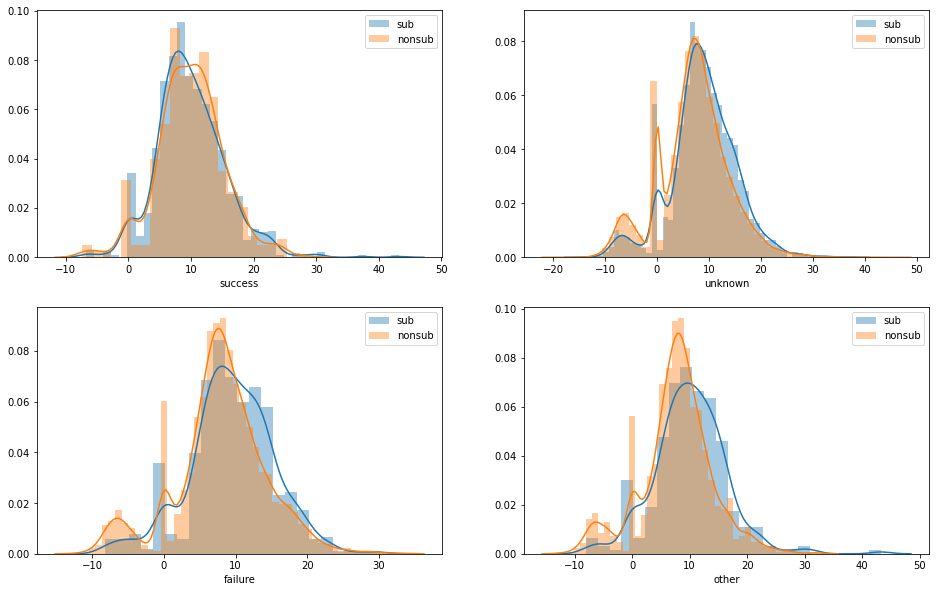

In [118]:
plt.rcParams['figure.figsize']=[16,10]
plt.subplot(2,2,1)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['poutcome']=='success')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['poutcome']=='success')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('success')
plt.subplot(2,2,2)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['poutcome']=='unknown')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['poutcome']=='unknown')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('unknown')
plt.subplot(2,2,3)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['poutcome']=='failure')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['poutcome']=='failure')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('failure')
plt.subplot(2,2,4)
sns.distplot(np.cbrt(education[(education['y']=='yes')&(education['poutcome']=='other')]['balance']),label='sub')
sns.distplot(np.cbrt(education[(education['y']=='no')&(education['poutcome']=='other')]['balance']),label='nonsub')
plt.legend()
plt.xlabel('other')

y                                no   yes  total   %no  %yes
poutcome categorical_balance                                
failure  NegetiveBalance        322    22    344  94.0   6.0
         PositiveBalance       3725   559   4284  87.0  13.0
         ZeroBalance            236    37    273  86.0  14.0
other    NegetiveBalance        120     8    128  94.0   6.0
         PositiveBalance       1321   281   1602  82.0  18.0
         ZeroBalance             92    18    110  84.0  16.0
success  NegetiveBalance          8     8     16  50.0  50.0
         PositiveBalance        499   930   1429  35.0  65.0
         ZeroBalance             26    40     66  39.0  61.0
unknown  NegetiveBalance       3106   172   3278  95.0   5.0
         PositiveBalance      27599  3017  30616  90.0  10.0
         ZeroBalance           2868   197   3065  94.0   6.0


Text(0.5, 0, 'NON-Subscriber')

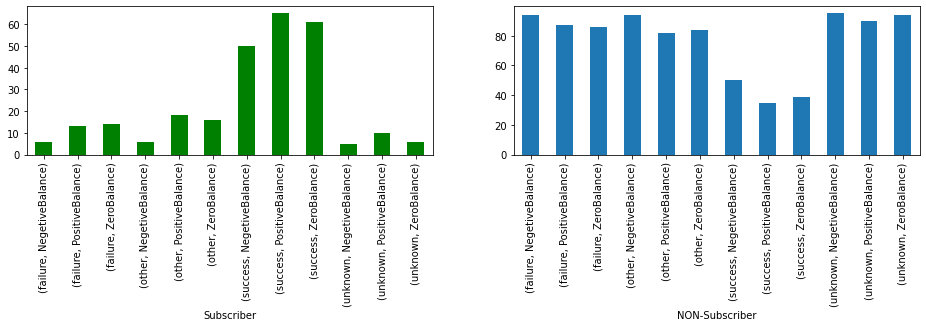

In [119]:
df=pd.crosstab([education['poutcome'],education['categorical_balance']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='g')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

#### Balance_job

In [120]:
education['job']=education['job'].mask(education['job']=='unknown','primary')

y                                    no   yes  total   %no  %yes
categorical_balance job                                         
NegetiveBalance     entrepreneur    100    13    113  88.0  12.0
PositiveBalance     admin.         3747   565   4312  87.0  13.0
                    management     6843  1210   8053  85.0  15.0
                    primary         226    30    256  88.0  12.0
                    retired        1495   482   1977  76.0  24.0
                    self-employed  1197   170   1367  88.0  12.0
                    student         622   258    880  71.0  29.0
                    technician     5577   757   6334  88.0  12.0
                    unemployed      935   187   1122  83.0  17.0
ZeroBalance         retired         138    26    164  84.0  16.0
                    unemployed       95    12    107  89.0  11.0
Representating only clients where conversion rates are higher than 10 percent and total no of approaches are > 100


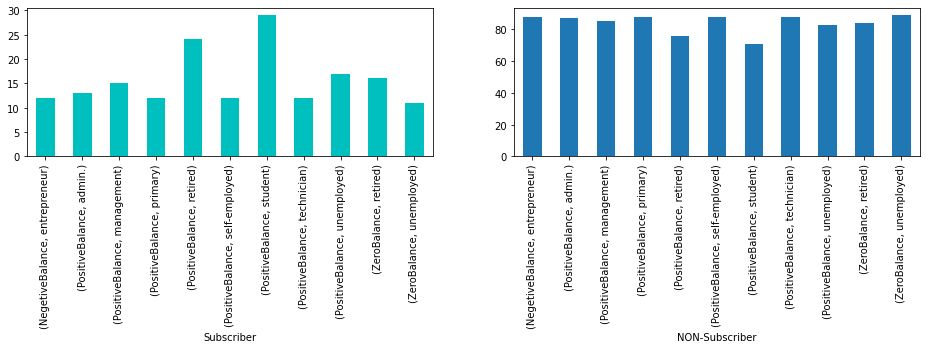

In [121]:
df=pd.crosstab([education['categorical_balance'],education['job']],education['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df[(df['%yes']>10)&(df['total']>100)])
print('Representating only clients where conversion rates are higher than 10 percent and total no of approaches are > 100')
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df[(df['%yes']>10)&(df['total']>100)]['%yes'].plot(kind='bar',color='c')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df[(df['%yes']>10)&(df['total']>100)]['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

##### Day Default

y                    no   yes  total   %no  %yes
segments default                                
first    no       11760  1715  13475  87.0  13.0
         yes        231    19    250  92.0   8.0
second   no       16097  2004  18101  89.0  11.0
         yes        268    20    288  93.0   7.0
third    no       11302  1518  12820  88.0  12.0
         yes        264    13    277  95.0   5.0


Text(0.5, 0, 'NON-Subscriber')

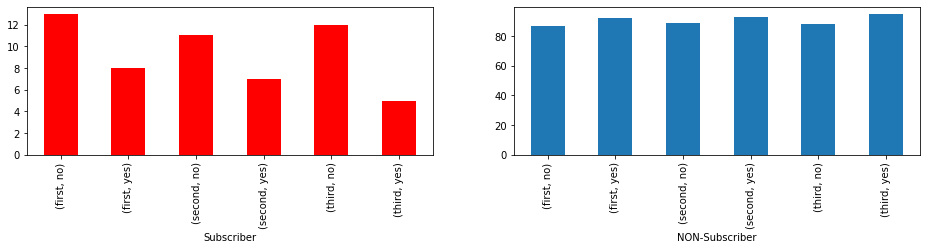

In [122]:
quarter=bank[['day','job','marital','education','default','housing','loan','contact',
              'poutcome','y','month']].copy(deep=True)
k=[]
for i in quarter['day']:
    if i<=10:
        k.append('first')
    elif i>10 and i<=20:
        k.append('second')
    else:
        k.append('third')
quarter['segments']=k
df=pd.crosstab([quarter['segments'],quarter['default']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

    Customer without Credit card has more success rate in each half of the month

#### Day-Housing

y                    no   yes  total   %no  %yes
segments housing                                
first    no        5191  1153   6344  82.0  18.0
         yes       6800   581   7381  92.0   8.0
second   no        6053  1170   7223  84.0  16.0
         yes      10312   854  11166  92.0   8.0
third    no        5483  1031   6514  84.0  16.0
         yes       6083   500   6583  92.0   8.0


Text(0.5, 0, 'NON-Subscriber')

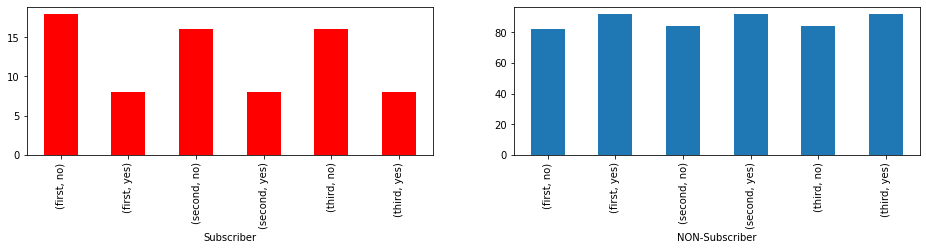

In [123]:
df=pd.crosstab([quarter['segments'],quarter['housing']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

    Customer without Home Loan has more success rate in each half of the month

#### Day-Loan

y                 no   yes  total   %no  %yes
segments loan                                
first    no     9874  1571  11445  86.0  14.0
         yes    2117   163   2280  93.0   7.0
second   no    13845  1834  15679  88.0  12.0
         yes    2520   190   2710  93.0   7.0
third    no     9443  1400  10843  87.0  13.0
         yes    2123   131   2254  94.0   6.0


Text(0.5, 0, 'NON-Subscriber')

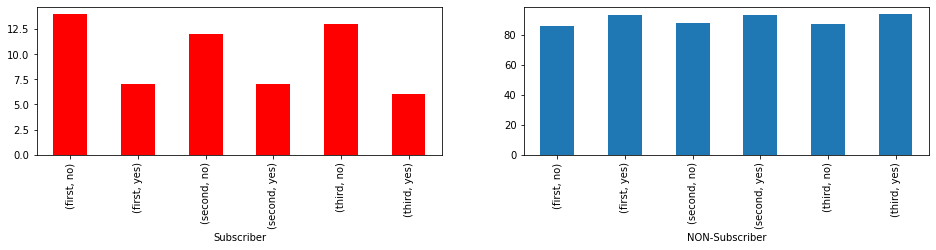

In [124]:
df=pd.crosstab([quarter['segments'],quarter['loan']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

    Customer without Personal Loan has more success rate in each half of the month

##### Day-Job

y                         no  yes  total   %no  %yes
segments job                                        
first    admin.         1442  224   1666  87.0  13.0
         management     2331  445   2776  84.0  16.0
         retired         544  155    699  78.0  22.0
         self-employed   404   59    463  87.0  13.0
         student         249   92    341  73.0  27.0
         technician     1903  287   2190  87.0  13.0
         unemployed      421   78    499  84.0  16.0
         unknown          98   12    110  89.0  11.0
second   management     3237  472   3709  87.0  13.0
         retired         728  208    936  78.0  22.0
         self-employed   586   72    658  89.0  11.0
         student         238   86    324  73.0  27.0
         technician     2550  300   2850  89.0  11.0
         unemployed      332   57    389  85.0  15.0
third    admin.         1272  195   1467  87.0  13.0
         management     2589  384   2973  87.0  13.0
         retired         476  153    629  76.0

Text(0.5, 0, 'NON-Subscriber')

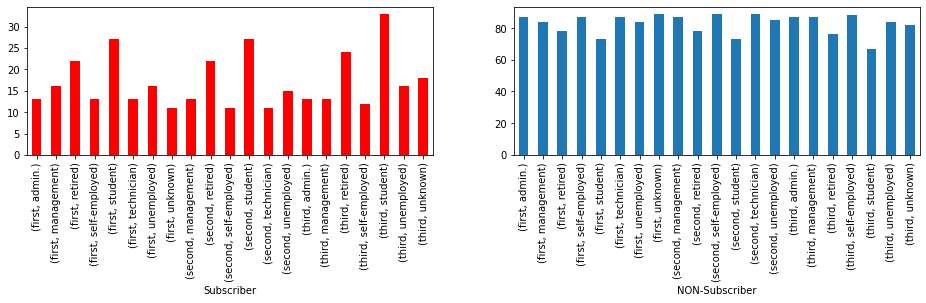

In [125]:
df=pd.crosstab([quarter['segments'],quarter['job']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df[df['%yes']>10])
plt.rcParams['figure.figsize']=[16,6]
print('concidering success rate greater than 10 percent')
plt.subplot(2,2,1)
df[df['%yes']>10]['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df[df['%yes']>10]['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')

#### DAY-marital

y                     no   yes  total   %no  %yes
segments marital                                 
first    divorced   1372   181   1553  88.0  12.0
         married    7181   920   8101  89.0  11.0
         single     3438   633   4071  84.0  16.0
second   divorced   1934   264   2198  88.0  12.0
         married   10273  1077  11350  91.0   9.0
         single     4158   683   4841  86.0  14.0
third    divorced   1279   177   1456  88.0  12.0
         married    7005   758   7763  90.0  10.0
         single     3282   596   3878  85.0  15.0


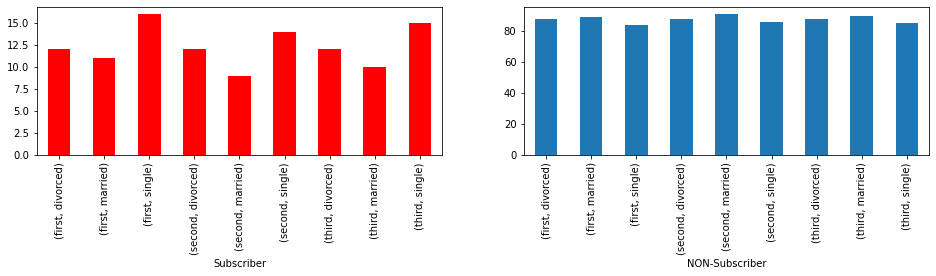

In [126]:
df=pd.crosstab([quarter['segments'],quarter['marital']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
#print('concidering success rate greater than 10 percent')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

#### DAYS-EDUCATION

y                     no  yes  total   %no  %yes
segments education                              
first    primary    2464  244   2708  91.0   9.0
         secondary  6266  802   7068  89.0  11.0
         tertiary   3261  688   3949  83.0  17.0
second   primary    3400  342   3742  91.0   9.0
         secondary  8570  970   9540  90.0  10.0
         tertiary   4395  712   5107  86.0  14.0
third    primary    2001  257   2258  89.0  11.0
         secondary  5916  678   6594  90.0  10.0
         tertiary   3649  596   4245  86.0  14.0


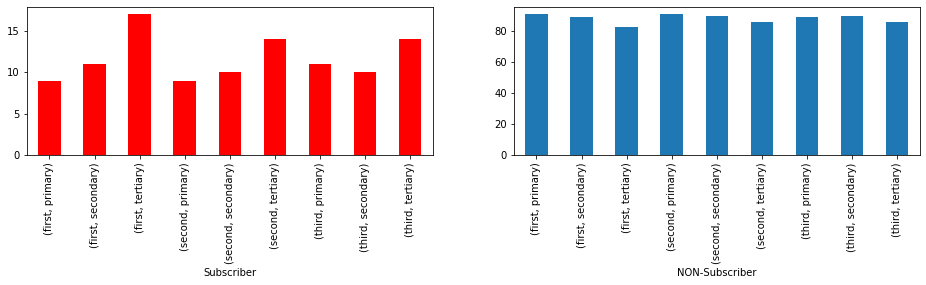

In [127]:
quarter['education']=quarter.education.mask(quarter.education=='unknown','primary')
df=pd.crosstab([quarter['segments'],quarter['education']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
#print('concidering success rate greater than 10 percent')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

#### Day-Contact

y                      no   yes  total   %no  %yes
segments contact                                  
first    cellular    6995  1441   8436  83.0  17.0
         telephone    708   132    840  84.0  16.0
         unknown     4288   161   4449  96.0   4.0
second   cellular   10569  1674  12243  86.0  14.0
         telephone    948   128   1076  88.0  12.0
         unknown     4848   222   5070  96.0   4.0
third    cellular    7352  1254   8606  85.0  15.0
         telephone    860   130    990  87.0  13.0
         unknown     3354   147   3501  96.0   4.0


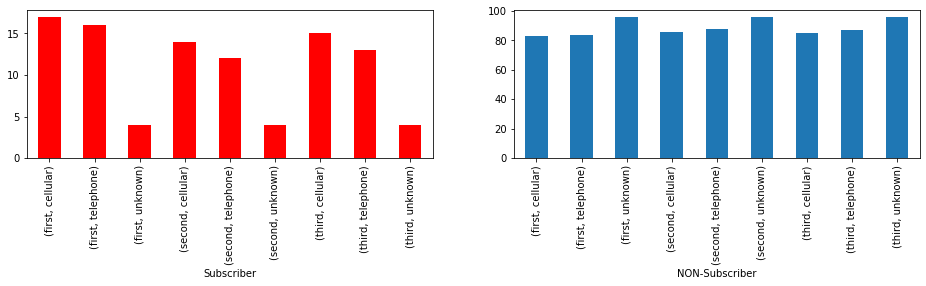

In [128]:
df=pd.crosstab([quarter['segments'],quarter['contact']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
#print('concidering success rate greater than 10 percent')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

Cellular and telephonic contact has more successrate 

#### Day-Month

In [129]:
k=[]
for i in quarter['month']:
    if i in ['apr','may','jun']:
        k.append('firstQuarter')
    elif i in ['jul','aug','sep']:
        k.append('SecondQuarter')
    elif i in ['oct','nov','dec']:
        k.append('ThirdQuarter')
    else:
        k.append('LastQuarter')
quarter['quarters']=k

y                         no  yes  total   %no  %yes
segments quarters                                   
first    LastQuarter    2149  357   2506  86.0  14.0
         SecondQuarter  3136  578   3714  84.0  16.0
         ThirdQuarter    265  163    428  62.0  38.0
         firstQuarter   6441  636   7077  91.0   9.0
second   LastQuarter     190  262    452  42.0  58.0
         SecondQuarter  3722  575   4297  87.0  13.0
         ThirdQuarter   2874  368   3242  89.0  11.0
         firstQuarter   9579  819  10398  92.0   8.0
third    LastQuarter    1359  212   1571  87.0  13.0
         SecondQuarter  5279  431   5710  92.0   8.0
         ThirdQuarter    957  295   1252  76.0  24.0
         firstQuarter   3971  593   4564  87.0  13.0


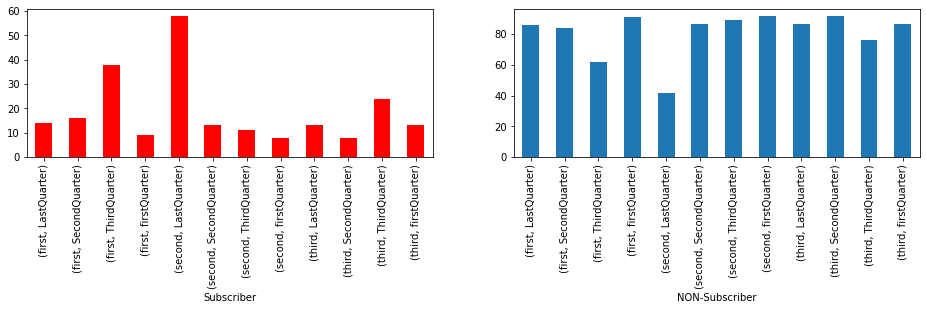

In [130]:
df=pd.crosstab([quarter['segments'],quarter['quarters']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
#print('concidering success rate greater than 10 percent')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

month     apr     aug    dec     feb     jan     jul     jun    mar      may  \
y                                                                              
total  2932.0  6247.0  214.0  2649.0  1403.0  6895.0  5341.0  477.0  13766.0   
%yes     20.0    11.0   47.0    17.0    10.0     9.0    10.0   52.0      7.0   
%no      80.0    89.0   53.0    83.0    90.0    91.0    90.0   48.0     93.0   

month     nov    oct    sep  
y                            
total  3970.0  738.0  579.0  
%yes     10.0   44.0   46.0  
%no      90.0   56.0   54.0  


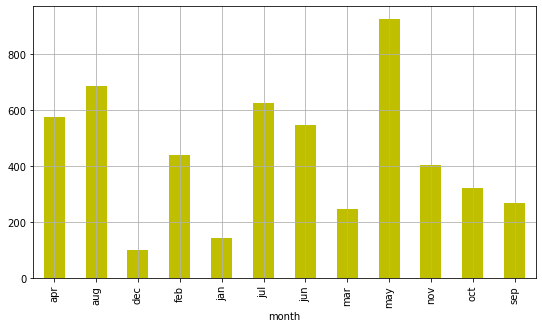

In [131]:
df=pd.crosstab(bank['month'],bank['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df[['total','%yes','%no']].T)
plt.rcParams['figure.figsize']=[9,5]
pd.crosstab(bank['month'],bank['y'])['yes'].plot(kind='bar',color='y')
plt.grid()
plt.show()

#### Day-Poutcome

y                     no   yes  total   %no  %yes
poutcome segments                                
failure  first      1359   226   1585  86.0  14.0
         second     2215   234   2449  90.0  10.0
         third       709   158    867  82.0  18.0
other    first       521    86    607  86.0  14.0
         second      730   123    853  86.0  14.0
         third       282    98    380  74.0  26.0
success  first       185   339    524  35.0  65.0
         second      226   357    583  39.0  61.0
         third       122   282    404  30.0  70.0
unknown  first      9926  1083  11009  90.0  10.0
         second    13194  1310  14504  91.0   9.0
         third     10453   993  11446  91.0   9.0


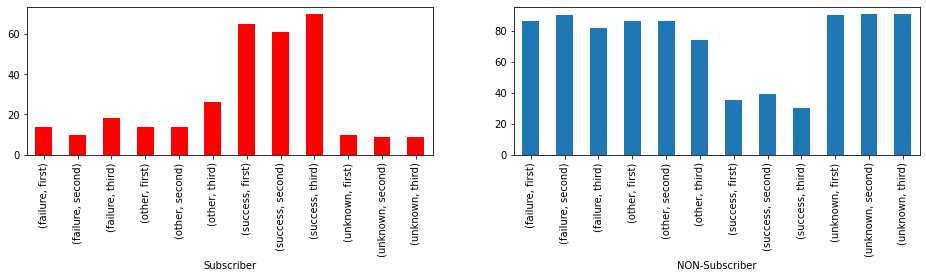

In [132]:
df=pd.crosstab([quarter['poutcome'],quarter['segments']],quarter['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)
print(df)
plt.rcParams['figure.figsize']=[16,6]
#print('concidering success rate greater than 10 percent')
plt.subplot(2,2,1)
df['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

## Categorical -Categorical Bivariate Analysis

### Job-Marital

y                       People_approached  Percentage No  Percentage Yes
job           marital                                                   
admin.        divorced                750          88.00           12.00
              married                2693          88.64           11.36
              single                 1728          86.40           13.60
blue-collar   divorced                750          92.27            7.73
              married                6968          93.73            6.27
              single                 2014          89.42           10.58
entrepreneur  divorced                179          91.62            8.38
              married                1070          92.43            7.57
              single                  238          88.66           11.34
housemaid     divorced                184          90.22            9.78
              married                 912          92.65            7.35
              single                  144          

Text(0.5, 0, 'Previous Outcome No/Yes')

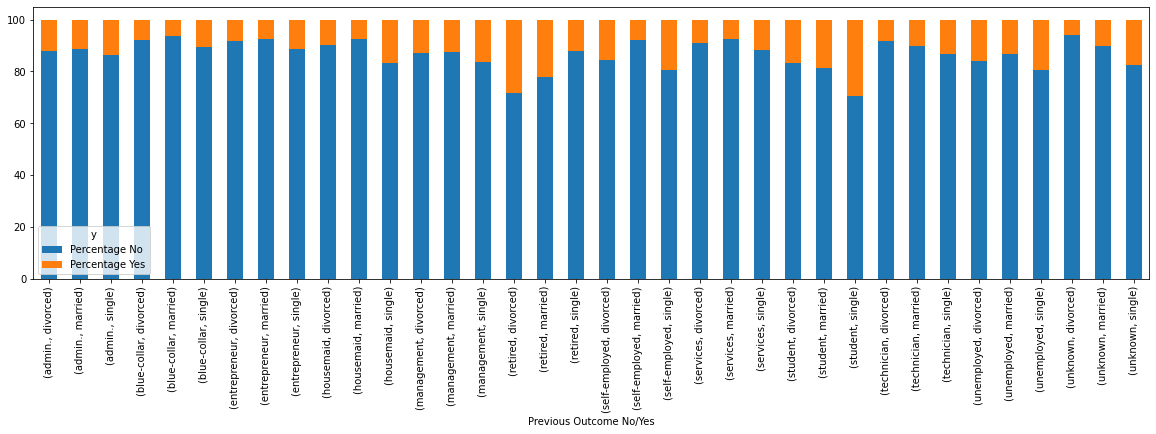

In [133]:
df=pd.crosstab([bank['job'],bank['marital']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Education

y                        People_approached  Percentage No  Percentage Yes
job           education                                                  
admin.        primary                  209          94.26            5.74
              secondary               4219          88.10           11.90
              tertiary                 572          82.69           17.31
              unknown                  171          89.47           10.53
blue-collar   primary                 3758          94.20            5.80
              secondary               5371          91.94            8.06
              tertiary                 149          83.89           16.11
              unknown                  454          92.73            7.27
entrepreneur  primary                  183          93.44            6.56
              secondary                542          90.41            9.59
              tertiary                 686          92.42            7.58
              unknown                 

Text(0.5, 0, 'Previous Outcome No/Yes')

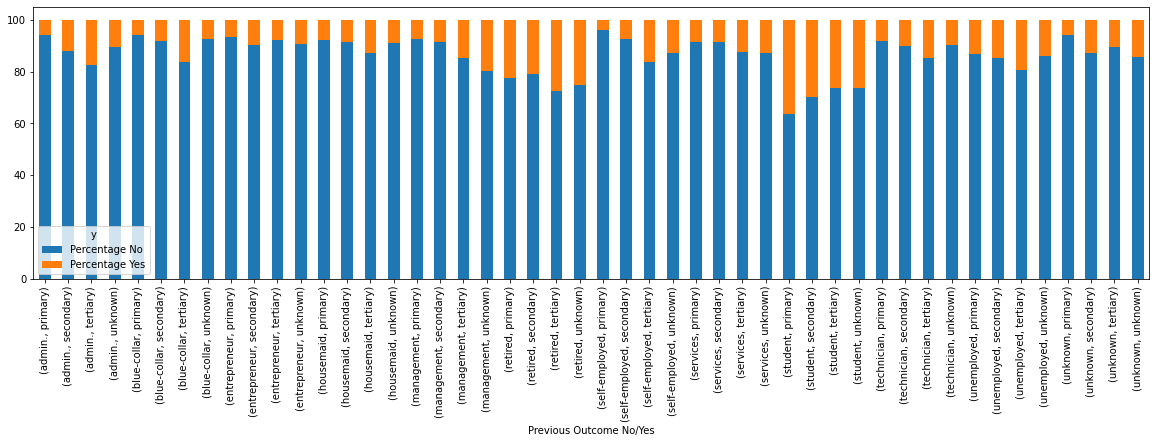

In [134]:
df=pd.crosstab([bank['job'],bank['education']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Default

y                      People_approached  Percentage No  Percentage Yes
job           default                                                  
admin.        no                    5097          87.68           12.32
              yes                     74          95.95            4.05
blue-collar   no                    9531          92.73            7.27
              yes                    201          92.54            7.46
entrepreneur  no                    1432          91.83            8.17
              yes                     55          89.09           10.91
housemaid     no                    1218          91.13            8.87
              yes                     22          95.45            4.55
management    no                    9294          86.09           13.91
              yes                    164          95.12            4.88
retired       no                    2238          76.99           23.01
              yes                     26          96.15         

Text(0.5, 0, 'Previous Outcome No/Yes')

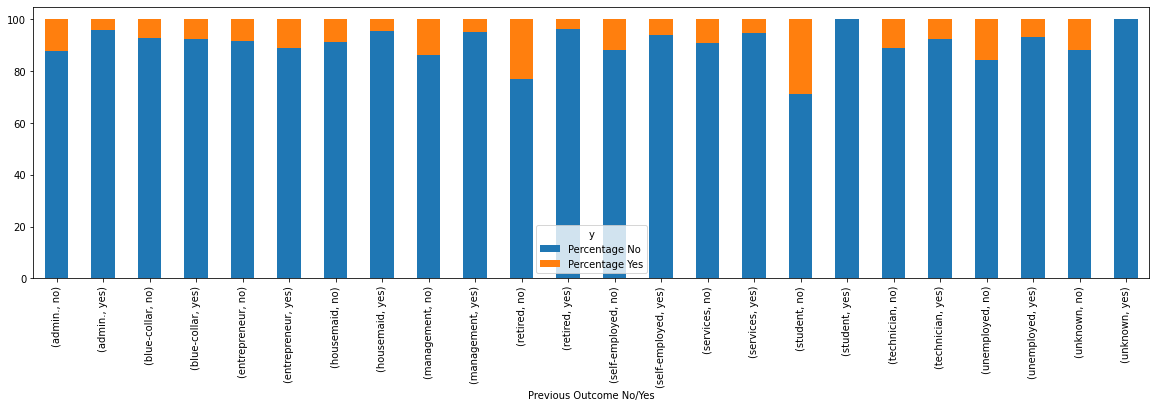

In [135]:
df=pd.crosstab([bank['job'],bank['default']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Loan

y                   People_approached  Percentage No  Percentage Yes
job           loan                                                  
admin.        no                 4180          86.89           13.11
              yes                 991          91.62            8.38
blue-collar   no                 8048          92.53            7.47
              yes                1684          93.65            6.35
entrepreneur  no                 1131          90.63            9.37
              yes                 356          95.22            4.78
housemaid     no                 1088          90.44            9.56
              yes                 152          96.71            3.29
management    no                 8205          85.27           14.73
              yes                1253          92.66            7.34
retired       no                 1955          74.68           25.32
              yes                 309          93.20            6.80
self-employed no                 1

Text(0.5, 0, 'Previous Outcome No/Yes')

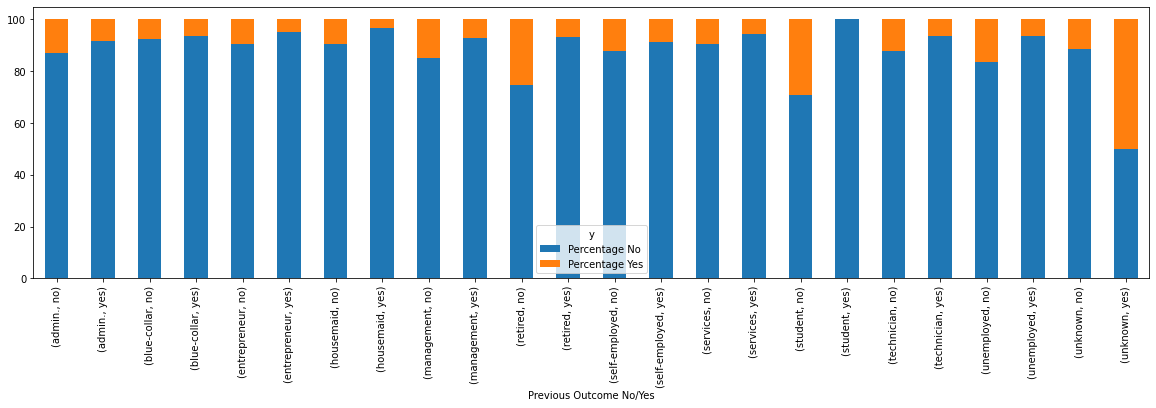

In [136]:
df=pd.crosstab([bank['job'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

None of the student with personal loan subscribed the term deposite.

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Housing

y                      People_approached  Percentage No  Percentage Yes
job           housing                                                  
admin.        no                    1989          82.70           17.30
              yes                   3182          90.98            9.02
blue-collar   no                    2684          89.83           10.17
              yes                   7048          93.83            6.17
entrepreneur  no                     618          88.67           11.33
              yes                    869          93.90            6.10
housemaid     no                     842          89.90           10.10
              yes                    398          93.97            6.03
management    no                    4780          81.80           18.20
              yes                   4678          90.79            9.21
retired       no                    1773          73.83           26.17
              yes                    491          89.41         

Text(0.5, 0, 'Previous Outcome No/Yes')

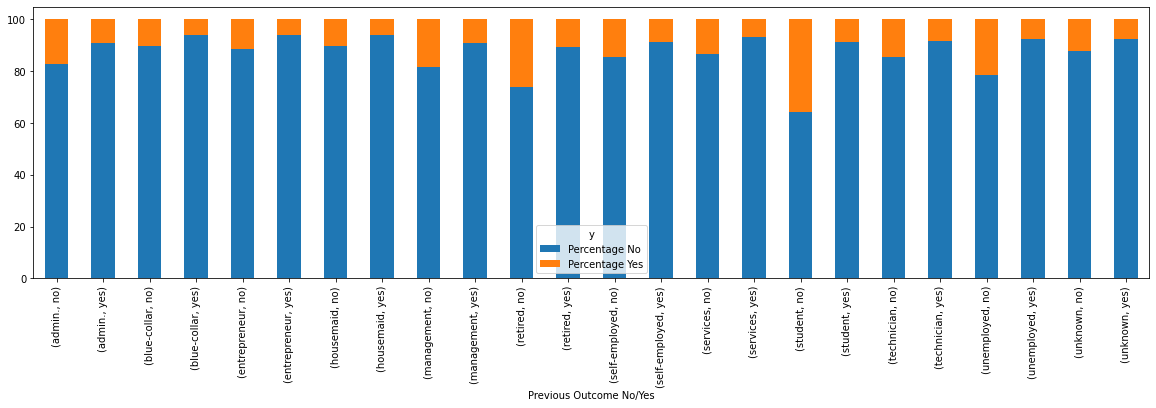

In [137]:
df=pd.crosstab([bank['job'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

_
No significant conclusion can be drawn

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Contact

y                        People_approached  Percentage No  Percentage Yes
job           contact                                                    
admin.        cellular                3354          84.23           15.77
              telephone                289          85.81           14.19
              unknown                 1528          96.01            3.99
blue-collar   cellular                5156          90.03            9.97
              telephone                611          93.78            6.22
              unknown                 3965          96.07            3.93
entrepreneur  cellular                 954          90.67            9.33
              telephone                 87          81.61           18.39
              unknown                  446          95.96            4.04
housemaid     cellular                 748          88.77           11.23
              telephone                151          90.73            9.27
              unknown                 

Text(0.5, 0, 'Previous Outcome No/Yes')

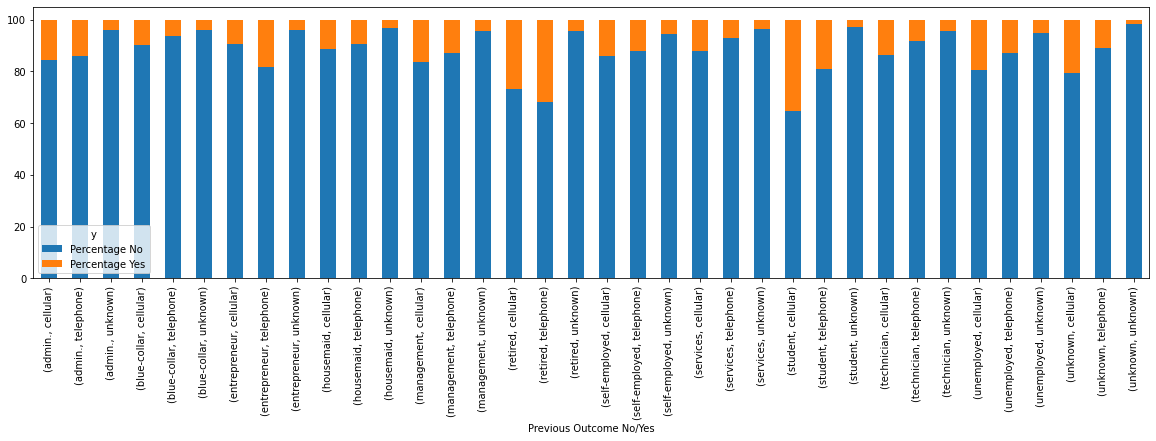

In [138]:
df=pd.crosstab([bank['job'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Month

y                             People_approached  Percentage No  Percentage Yes
job           quarters                                                        
admin.        First Quarter                1310          87.33           12.67
              Fourth Quarter               2745          90.02            9.98
              Second Quarter                550          83.45           16.55
              Third Quarter                 566          82.33           17.67
blue-collar   First Quarter                2036          90.67            9.33
              Fourth Quarter               6411          93.87            6.13
              Second Quarter                673          89.30           10.70
              Third Quarter                 612          91.34            8.66
entrepreneur  First Quarter                 396          88.38           11.62
              Fourth Quarter                702          94.30            5.70
              Second Quarter                262     

Text(0.5, 0, 'Previous Outcome No/Yes')

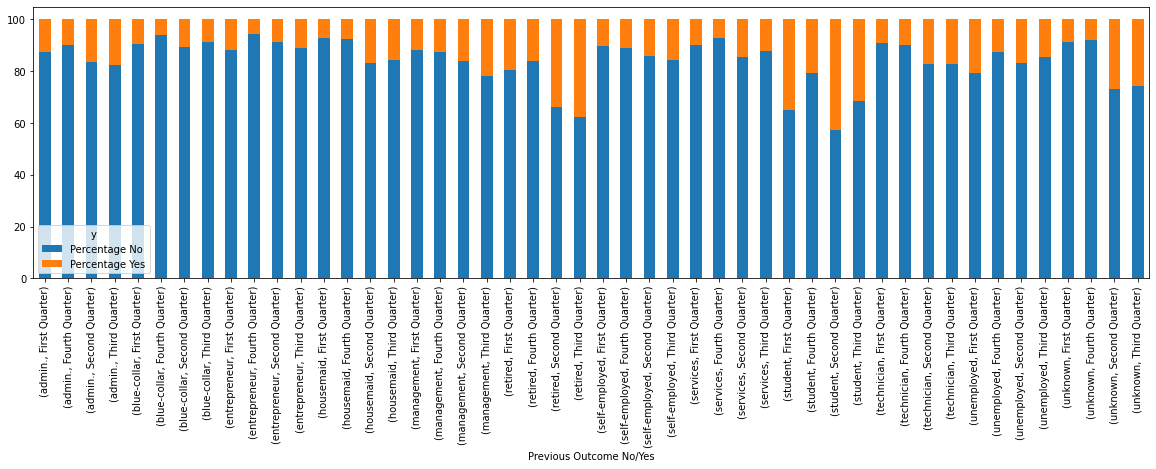

In [139]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k
df=pd.crosstab([bank['job'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Job-Poutcome

y                       People_approached  Percentage No  Percentage Yes
job           poutcome                                                  
admin.        failure                 643          86.63           13.37
              other                   241          83.40           16.60
              success                 204          40.20           59.80
              unknown                4083          90.62            9.38
blue-collar   failure                1068          94.01            5.99
              other                   401          91.27            8.73
              success                 148          42.57           57.43
              unknown                8115          93.54            6.46
entrepreneur  failure                 164          90.85            9.15
              other                    39          92.31            7.69
              success                  22          59.09           40.91
              unknown                1262          

Text(0.5, 0, 'Previous Outcome No/Yes')

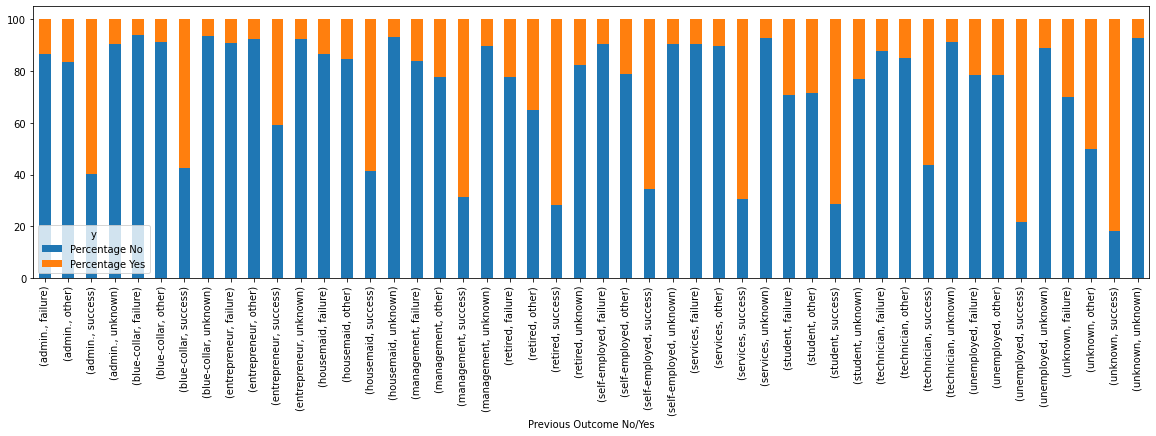

In [140]:
df=pd.crosstab([bank['job'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Education

y                   People_approached  Percentage No  Percentage Yes
marital  education                                                  
divorced primary                  752          86.17           13.83
         secondary               2815          89.66           10.34
         tertiary                1471          86.20           13.80
         unknown                  169          85.80           14.20
married  primary                 5246          92.45            7.55
         secondary              13770          90.53            9.47
         tertiary                7038          87.03           12.97
         unknown                 1160          87.76           12.24
single   primary                  853          89.33           10.67
         secondary               6617          87.08           12.92
         tertiary                4792          81.64           18.36
         unknown                  528          83.71           16.29


Text(0.5, 0, 'Previous Outcome No/Yes')

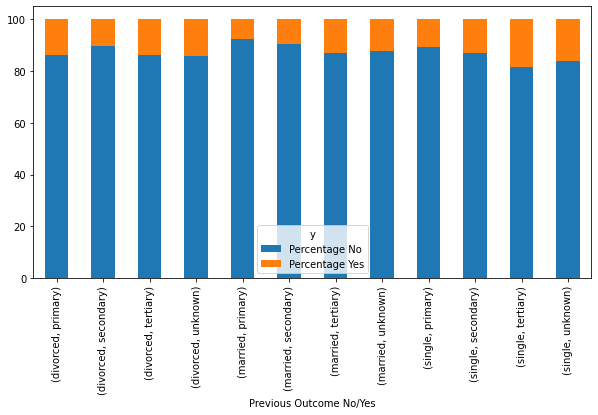

In [141]:
df=pd.crosstab([bank['marital'],bank['education']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Default

y                 People_approached  Percentage No  Percentage Yes
marital  default                                                  
divorced no                    5079          87.97           12.03
         yes                    128          91.41            8.59
married  no                   26766          89.78           10.22
         yes                    448          95.54            4.46
single   no                   12551          84.93           15.07
         yes                    239          91.21            8.79


Text(0.5, 0, 'Previous Outcome No/Yes')

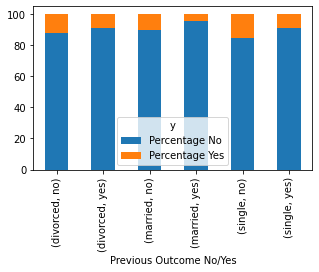

In [142]:
df=pd.crosstab([bank['marital'],bank['default']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Housing

y                 People_approached  Percentage No  Percentage Yes
marital  housing                                                  
divorced no                    2300          83.78           16.22
         yes                   2907          91.43            8.57
married  no                   11893          85.32           14.68
         yes                  15321          93.41            6.59
single   no                    5888          79.03           20.97
         yes                   6902          90.19            9.81


Text(0.5, 0, 'Previous Outcome No/Yes')

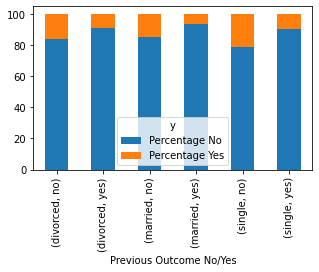

In [143]:
df=pd.crosstab([bank['marital'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Loan

y              People_approached  Percentage No  Percentage Yes
marital  loan                                                  
divorced no                 4286          87.05           12.95
         yes                 921          92.73            7.27
married  no                22554          88.98           11.02
         yes                4660          94.21            5.79
single   no                11127          84.14           15.86
         yes                1663          91.16            8.84


Text(0.5, 0, 'Previous Outcome No/Yes')

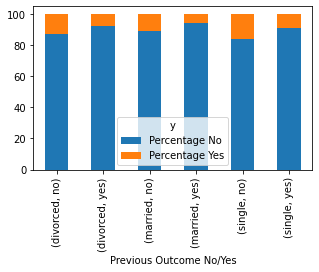

In [144]:
df=pd.crosstab([bank['marital'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Contact

y                   People_approached  Percentage No  Percentage Yes
marital  contact                                                    
divorced cellular                3326          85.39           14.61
         telephone                271          81.55           18.45
         unknown                 1610          94.66            5.34
married  cellular               17168          87.01           12.99
         telephone               2015          87.15           12.85
         unknown                 8031          96.69            3.31
single   cellular                8791          81.20           18.80
         telephone                620          86.94           13.06
         unknown                 3379          94.73            5.27


Text(0.5, 0, 'Previous Outcome No/Yes')

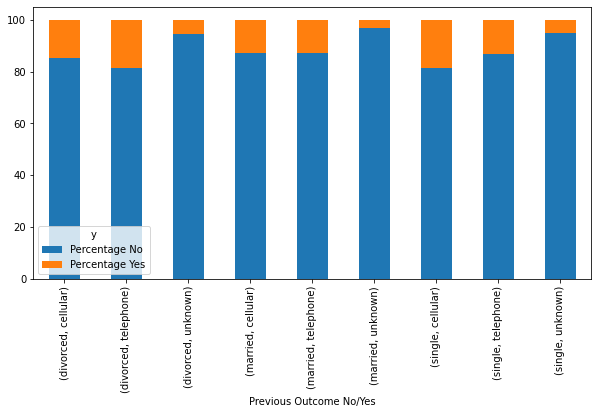

In [145]:
df=pd.crosstab([bank['marital'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Months

y                        People_approached  Percentage No  Percentage Yes
marital  quarters                                                        
divorced First Quarter                1514          87.12           12.88
         Fourth Quarter               2581          90.70            9.30
         Second Quarter                596          82.89           17.11
         Third Quarter                 516          83.53           16.47
married  First Quarter                8798          90.20            9.80
         Fourth Quarter              12981          92.30            7.70
         Second Quarter               3068          84.81           15.19
         Third Quarter                2367          81.96           18.04
single   First Quarter                3409          84.54           15.46
         Fourth Quarter               6477          87.53           12.47
         Second Quarter               1258          79.49           20.51
         Third Quarter                

Text(0.5, 0, 'Previous Outcome No/Yes')

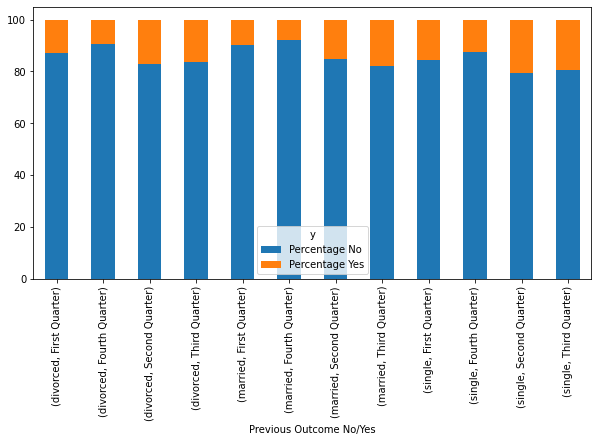

In [146]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k

df=pd.crosstab([bank['marital'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Marital-Poutcome

y                  People_approached  Percentage No  Percentage Yes
marital  poutcome                                                  
divorced failure                 556          90.11            9.89
         other                   223          83.86           16.14
         success                 152          38.82           61.18
         unknown                4276          89.76           10.24
married  failure                2919          88.15           11.85
         other                   987          84.19           15.81
         success                 836          34.57           65.43
         unknown               22472          92.41            7.59
single   failure                1426          84.78           15.22
         other                   630          81.75           18.25
         success                 523          35.37           64.63
         unknown               10211          87.84           12.16


Text(0.5, 0, 'Previous Outcome No/Yes')

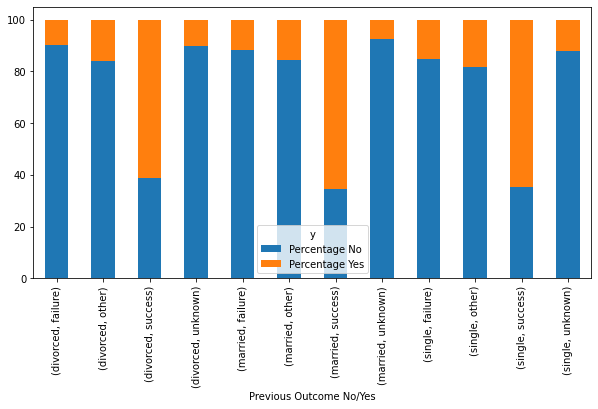

In [147]:
df=pd.crosstab([bank['marital'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infered that 60-65% of people who subscribed in previous marketing campaign, subscribes again irrespective of marital status.

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Education-Default

y                  People_approached  Percentage No  Percentage Yes
education default                                                  
primary   no                    6724          91.30            8.70
          yes                    127          95.28            4.72
secondary no                   22744          89.35           10.65
          yes                    458          93.89            6.11
tertiary  no                   13103          84.87           15.13
          yes                    198          92.93            7.07
unknown   no                    1825          86.41           13.59
          yes                     32          87.50           12.50


Text(0.5, 0, 'Previous Outcome No/Yes')

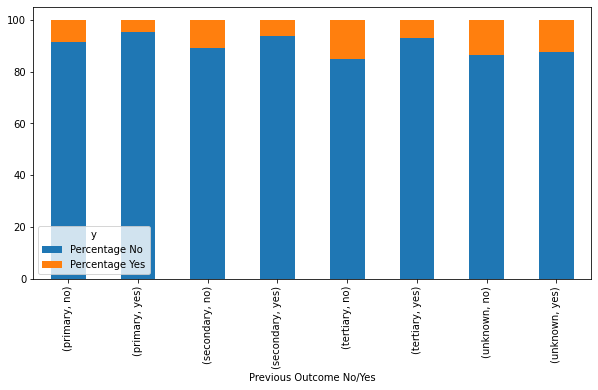

In [148]:
df=pd.crosstab([bank['education'],bank['default']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Education-Housing

y                  People_approached  Percentage No  Percentage Yes
education housing                                                  
primary   no                    2957          87.62           12.38
          yes                   3894          94.22            5.78
secondary no                    9164          84.58           15.42
          yes                  14038          92.61            7.39
tertiary  no                    6923          80.04           19.96
          yes                   6378          90.37            9.63
unknown   no                    1037          81.39           18.61
          yes                    820          92.80            7.20


Text(0.5, 0, 'Previous Outcome No/Yes')

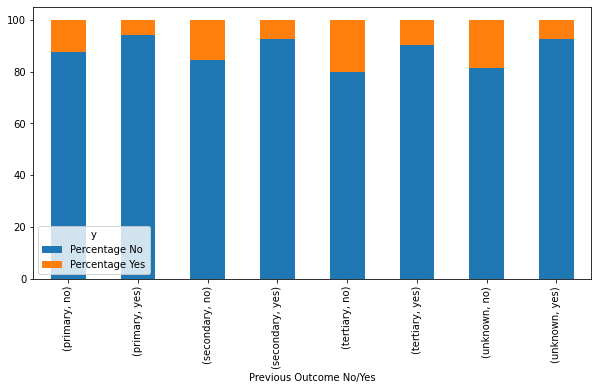

In [149]:
df=pd.crosstab([bank['education'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Education-Loan

y               People_approached  Percentage No  Percentage Yes
education loan                                                  
primary   no                 5827          90.72            9.28
          yes                1024          95.12            4.88
secondary no                18899          88.59           11.41
          yes                4303          93.17            6.83
tertiary  no                11517          83.81           16.19
          yes                1784          92.66            7.34
unknown   no                 1724          85.90           14.10
          yes                 133          93.23            6.77


Text(0.5, 0, 'Previous Outcome No/Yes')

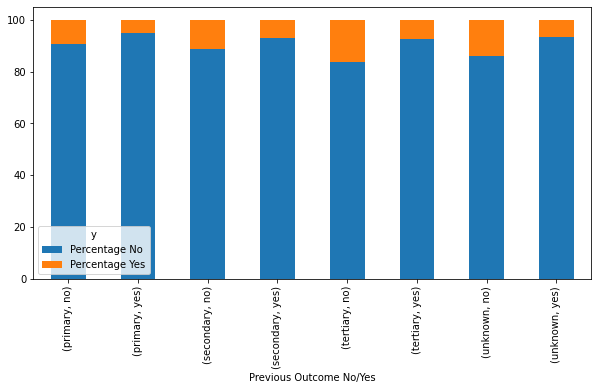

In [150]:
df=pd.crosstab([bank['education'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Education-Contact

y                    People_approached  Percentage No  Percentage Yes
education contact                                                    
primary   cellular                3568          88.37           11.63
          telephone                722          87.40           12.60
          unknown                 2561          96.68            3.32
secondary cellular               14688          86.37           13.63
          telephone               1365          88.42           11.58
          unknown                 7149          95.94            4.06
tertiary  cellular               10039          82.47           17.53
          telephone                629          83.78           16.22
          unknown                 2633          94.91            5.09
unknown   cellular                 990          80.61           19.39
          telephone                190          79.47           20.53
          unknown                  677          96.90            3.10


Text(0.5, 0, 'Previous Outcome No/Yes')

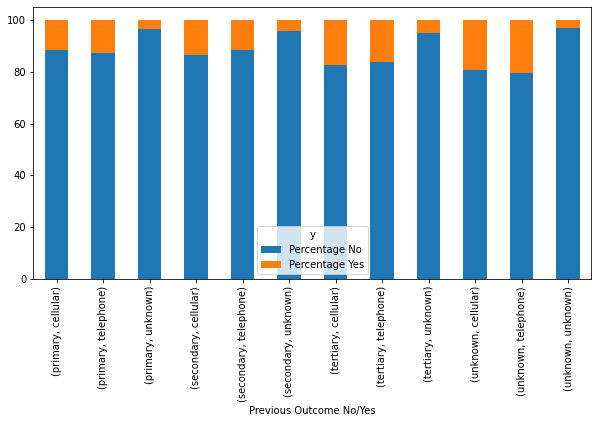

In [151]:
df=pd.crosstab([bank['education'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

NO significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Education-Months

y                         People_approached  Percentage No  Percentage Yes
education quarters                                                        
primary   First Quarter                1838          90.32            9.68
          Fourth Quarter               3892          93.78            6.22
          Second Quarter                574          85.19           14.81
          Third Quarter                 547          84.28           15.72
secondary First Quarter                6581          89.26           10.74
          Fourth Quarter              12075          91.67            8.33
          Second Quarter               2322          83.38           16.62
          Third Quarter                2224          84.22           15.78
tertiary  First Quarter                4809          87.23           12.77
          Fourth Quarter               5091          86.05           13.95
          Second Quarter               1851          83.14           16.86
          Third Quarter  

Text(0.5, 0, 'Previous Outcome No/Yes')

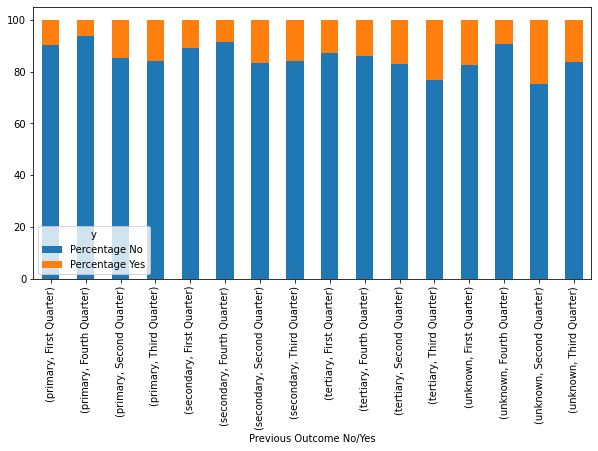

In [152]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k


df=pd.crosstab([bank['education'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Education-Poutcome

y                   People_approached  Percentage No  Percentage Yes
education poutcome                                                  
primary   failure                 643          91.14            8.86
          other                   244          85.66           14.34
          success                 133          39.10           60.90
          unknown                5831          92.83            7.17
secondary failure                2589          89.11           10.89
          other                   987          85.92           14.08
          success                 675          35.85           64.15
          unknown               18951          91.58            8.42
tertiary  failure                1492          83.18           16.82
          other                   544          77.94           22.06
          success                 622          34.24           65.76
          unknown               10643          88.57           11.43
unknown   failure                 

Text(0.5, 0, 'Previous Outcome No/Yes')

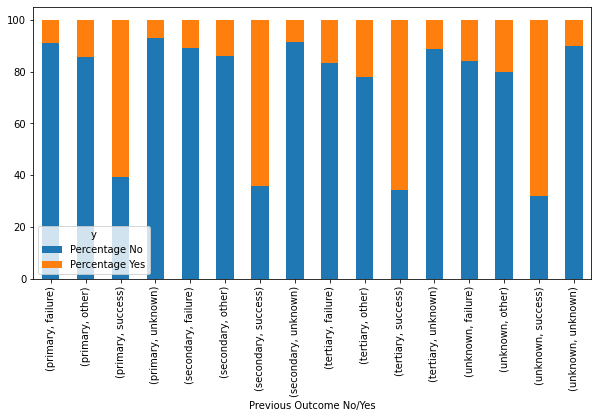

In [153]:
df=pd.crosstab([bank['education'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infered that 60-70% of people who subscribed in previous marketing campaign, subscribes again irrespective of education.

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Default-Housing

y                People_approached  Percentage No  Percentage Yes
default housing                                                  
no      no                   19701          83.09           16.91
        yes                  24695          92.28            7.72
yes     no                     380          93.95            6.05
        yes                    435          93.33            6.67


Text(0.5, 0, 'Previous Outcome No/Yes')

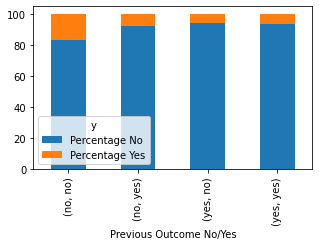

In [154]:
df=pd.crosstab([bank['default'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Default-Loan

y             People_approached  Percentage No  Percentage Yes
default loan                                                  
no      no                37453          87.27           12.73
        yes                6943          93.24            6.76
yes     no                  514          92.80            7.20
        yes                 301          95.02            4.98


Text(0.5, 0, 'Previous Outcome No/Yes')

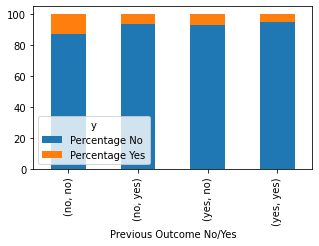

In [155]:
df=pd.crosstab([bank['default'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Default-Contact

y                  People_approached  Percentage No  Percentage Yes
default contact                                                    
no      cellular               28786          84.95           15.05
        telephone               2879          86.45           13.55
        unknown                12731          95.95            4.05
yes     cellular                 499          92.38            7.62
        telephone                 27         100.00            0.00
        unknown                  289          95.16            4.84


Text(0.5, 0, 'Previous Outcome No/Yes')

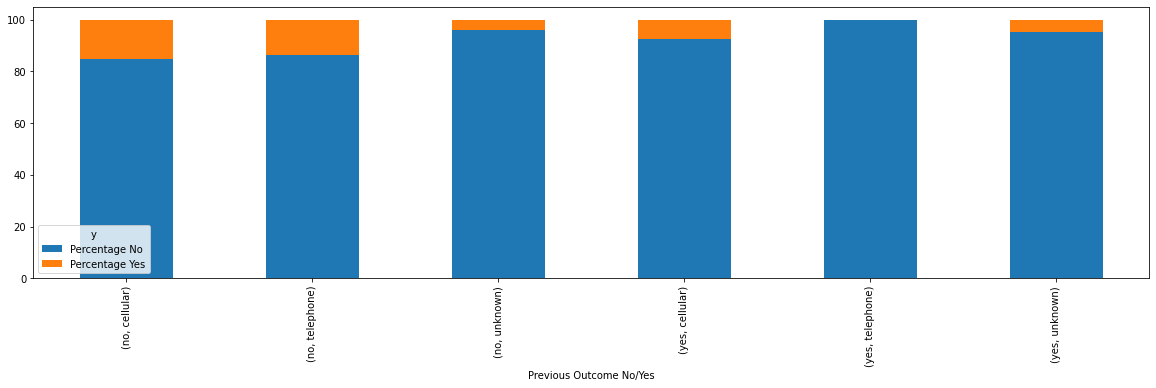

In [156]:
df=pd.crosstab([bank['default'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

NOne of the people who had default credit and who were contacted over telephone subscribed the term deposite`m

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Default-Months

y                       People_approached  Percentage No  Percentage Yes
default quarters                                                        
no      First Quarter               13403          88.34           11.66
        Fourth Quarter              21677          90.66            9.34
        Second Quarter               4840          83.00           17.00
        Third Quarter                4476          81.52           18.48
yes     First Quarter                 318          93.40            6.60
        Fourth Quarter                362          93.37            6.63
        Second Quarter                 82          96.34            3.66
        Third Quarter                  53          92.45            7.55


Text(0.5, 0, 'Previous Outcome No/Yes')

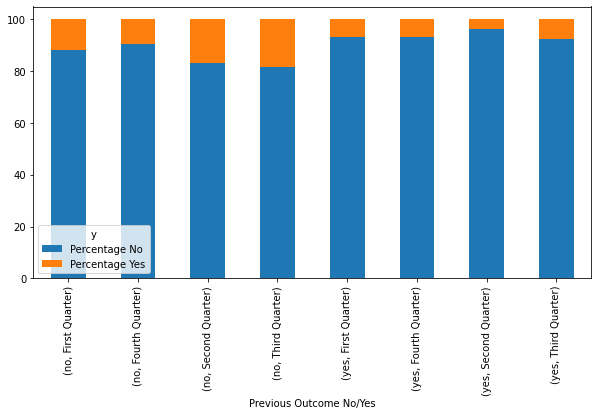

In [157]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k


df=pd.crosstab([bank['default'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

No signoficantc conclusion

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Default-Poutcome

y                 People_approached  Percentage No  Percentage Yes
default poutcome                                                  
no      failure                4862          87.35           12.65
        other                  1824          83.28           16.72
        success                1509          35.19           64.81
        unknown               36201          90.78            9.22
yes     failure                  39          92.31            7.69
        other                    16          87.50           12.50
        success                   2         100.00            0.00
        unknown                 758          93.80            6.20


Text(0.5, 0, 'Previous Outcome No/Yes')

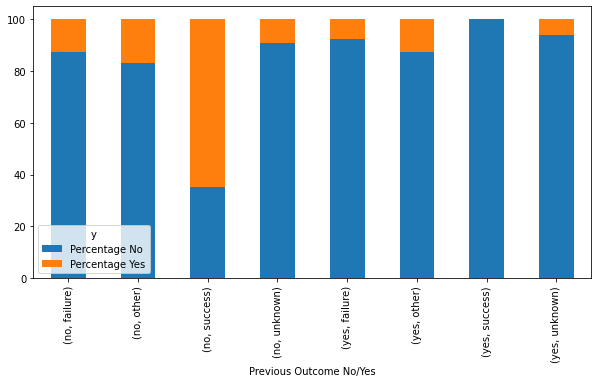

In [158]:
df=pd.crosstab([bank['default'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Housing-Loan

y             People_approached  Percentage No  Percentage Yes
housing loan                                                  
no      no                17204          81.78           18.22
        yes                2877          92.39            7.61
yes     no                20763          91.96            8.04
        yes                4367          93.93            6.07


Text(0.5, 0, 'Previous Outcome No/Yes')

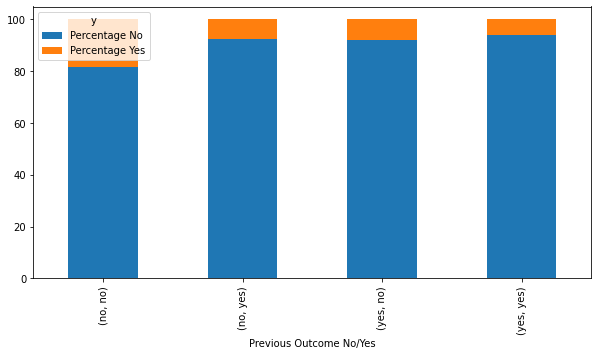

In [159]:
df=pd.crosstab([bank['housing'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Housing-Contact

y                  People_approached  Percentage No  Percentage Yes
housing contact                                                    
no      cellular               14682          80.36           19.64
        telephone               1736          81.97           18.03
        unknown                 3663          95.69            4.31
yes     cellular               14603          89.82           10.18
        telephone               1170          93.42            6.58
        unknown                 9357          96.02            3.98


Text(0.5, 0, 'Previous Outcome No/Yes')

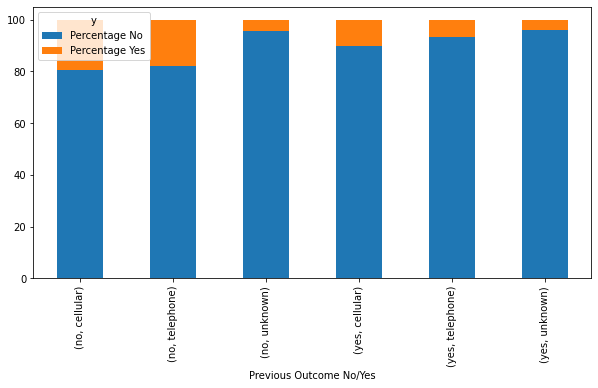

In [160]:
df=pd.crosstab([bank['housing'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Housing-Month

y                       People_approached  Percentage No  Percentage Yes
housing quarters                                                        
no      First Quarter                9151          87.40           12.60
        Fourth Quarter               5667          82.65           17.35
        Second Quarter               2500          76.68           23.32
        Third Quarter                2763          77.02           22.98
yes     First Quarter                4570          90.57            9.43
        Fourth Quarter              16372          93.49            6.51
        Second Quarter               2422          89.97           10.03
        Third Quarter                1766          88.90           11.10


Text(0.5, 0, 'Previous Outcome No/Yes')

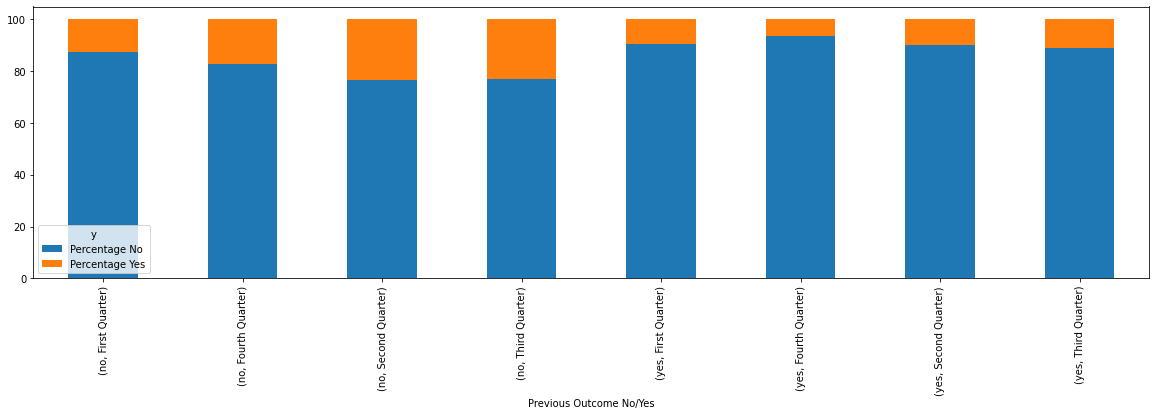

In [161]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k


df=pd.crosstab([bank['housing'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Housing-Poutcome

y                 People_approached  Percentage No  Percentage Yes
housing poutcome                                                  
no      failure                1431          76.94           23.06
        other                   641          69.73           30.27
        success                1040          29.90           70.10
        unknown               16969          87.62           12.38
yes     failure                3470          91.70            8.30
        other                  1199          90.58            9.42
        success                 471          47.13           52.87
        unknown               19990          93.57            6.43


Text(0.5, 0, 'Previous Outcome No/Yes')

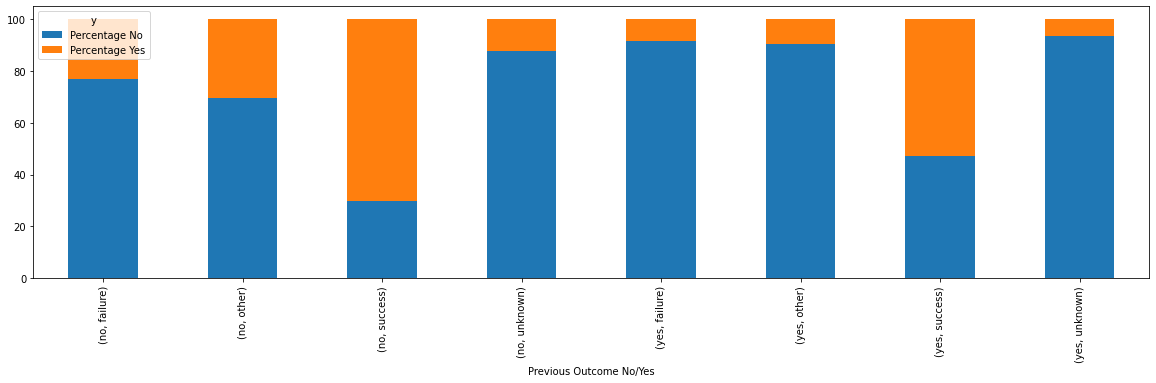

In [162]:
df=pd.crosstab([bank['housing'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(20,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Loan-Contact

y               People_approached  Percentage No  Percentage Yes
loan contact                                                    
no   cellular               24485          83.74           16.26
     telephone               2494          85.40           14.60
     unknown                10988          95.81            4.19
yes  cellular                4800          91.92            8.08
     telephone                412          93.69            6.31
     unknown                 2032          96.56            3.44


Text(0.5, 0, 'Previous Outcome No/Yes')

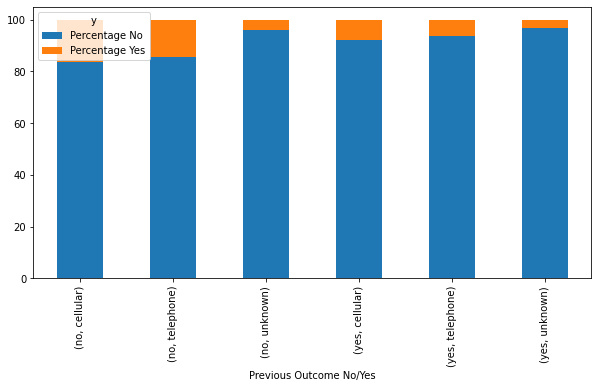

In [163]:
df=pd.crosstab([bank['loan'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Loan-Month

In [164]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k

y                    People_approached  Percentage No  Percentage Yes
loan quarters                                                        
no   First Quarter               10982          87.15           12.85
     Fourth Quarter              18954          90.22            9.78
     Second Quarter               4130          81.65           18.35
     Third Quarter                3901          79.95           20.05
yes  First Quarter                2739          93.68            6.32
     Fourth Quarter               3085          93.71            6.29
     Second Quarter                792          91.41            8.59
     Third Quarter                 628          92.20            7.80


Text(0.5, 0, 'Previous Outcome No/Yes')

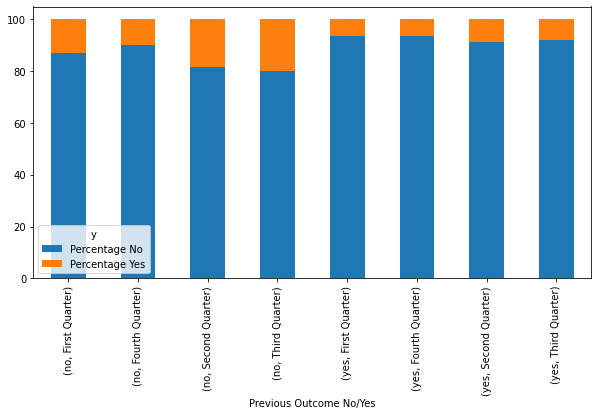

In [165]:
df=pd.crosstab([bank['loan'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Loan-Poutcome

y              People_approached  Percentage No  Percentage Yes
loan poutcome                                                  
no   failure                4127          86.43           13.57
     other                  1575          81.65           18.35
     success                1429          34.64           65.36
     unknown               30836          90.20            9.80
yes  failure                 774          92.51            7.49
     other                   265          93.21            6.79
     success                  82          46.34           53.66
     unknown                6123          94.06            5.94


Text(0.5, 0, 'Previous Outcome No/Yes')

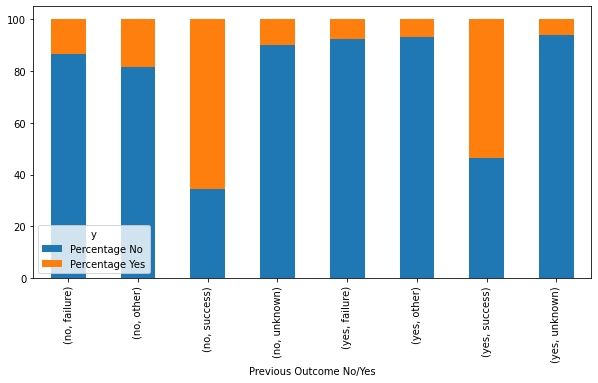

In [166]:
df=pd.crosstab([bank['loan'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Contact-Month

y                         People_approached  Percentage No  Percentage Yes
contact   quarters                                                        
cellular  First Quarter               12183          88.12           11.88
          Fourth Quarter               8787          83.09           16.91
          Second Quarter               4271          83.94           16.06
          Third Quarter                4044          81.45           18.55
telephone First Quarter                1164          89.86           10.14
          Fourth Quarter                739          87.82           12.18
          Second Quarter                547          79.89           20.11
          Third Quarter                 456          84.21           15.79
unknown   First Quarter                 374          94.92            5.08
          Fourth Quarter              12513          96.23            3.77
          Second Quarter                104          71.15           28.85
          Third Quarter  

Text(0.5, 0, 'Previous Outcome No/Yes')

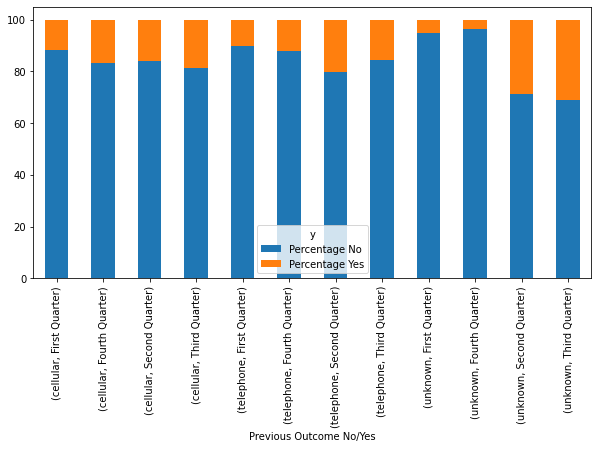

In [167]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k

df=pd.crosstab([bank['contact'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Contact-Poutcome

y                   People_approached  Percentage No  Percentage Yes
contact   poutcome                                                  
cellular  failure                4529          87.35           12.65
          other                  1637          82.90           17.10
          success                1385          35.02           64.98
          unknown               21734          87.96           12.04
telephone failure                 341          87.98           12.02
          other                   176          87.50           12.50
          success                 114          34.21           65.79
          unknown                2275          88.92           11.08
unknown   failure                  31          87.10           12.90
          other                    27          81.48           18.52
          success                  12          75.00           25.00
          unknown               12950          96.00            4.00


Text(0.5, 0, 'Previous Outcome No/Yes')

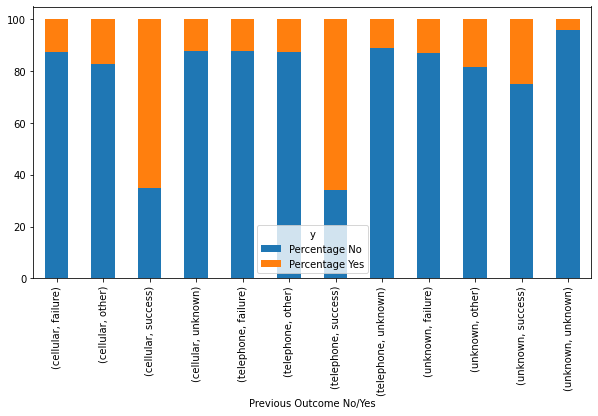

In [168]:
df=pd.crosstab([bank['contact'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Month-Poutcome

y                        People_approached  Percentage No  Percentage Yes
quarters       poutcome                                                  
First Quarter  failure                 466          68.03           31.97
               other                   193          57.51           42.49
               success                 438          30.14           69.86
               unknown               12624          91.71            8.29
Fourth Quarter failure                2557          90.30            9.70
               other                   913          86.97           13.03
               success                 483          42.24           57.76
               unknown               18086          92.25            7.75
Second Quarter failure                 985          87.72           12.28
               other                   299          80.94           19.06
               success                 323          35.29           64.71
               unknown                

Text(0.5, 0, 'Previous Outcome No/Yes')

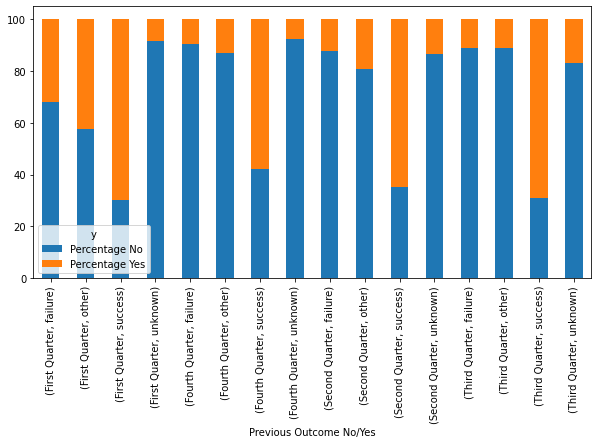

In [169]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k
df=pd.crosstab([df['quarters'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [170]:
bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

## Multivariate Analysis Num-Num:

In [171]:
#### Creating Dummy dataframe 

dummy=bank[['balance','y','age','day']].copy(deep=True)
k=[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
dummy['converted_age_group']=k
minutes=bank[['duration']]/60
dummy['Time']=minutes
k=[]
for i in dummy['Time']:
    if i<=5:
        k.append('<=5')
    elif i>5 and i<=10:
        k.append('>5&<=10')
    elif i>10 and i<=15:
        k.append('>10&<=15')
    elif i>15 and i<=20:
        k.append('>15&<=20')
    else:
        k.append('>20')
dummy['converted_duration_group']=k
k=[]
for i in bank['day']:
    if i<=10:
        k.append('first')
    elif i>10 and i<=20:
        k.append('second')
    else:
        k.append('third')
dummy['converted_day_group']=k

k=[]
for i in bank['pdays']:
    if i==-1:
        k.append('newClients')
    else:
        k.append('oldClients')
dummy['converted_pdays_group']=k

dummy.head()

balance   y  age  day converted_age_group      Time  \
0     2143  no   58    5        45<Group<=65  4.350000   
1       29  no   44    5        25<Group<=45  2.516667   
2        2  no   33    5        25<Group<=45  1.266667   
3     1506  no   47    5        45<Group<=65  1.533333   
4        1  no   33    5        25<Group<=45  3.300000   

  converted_duration_group converted_day_group converted_pdays_group  
0                      <=5               first            newClients  
1                      <=5               first            newClients  
2                      <=5               first            newClients  
3                      <=5               first            newClients  
4                      <=5               first            newClients

### Balance-Age

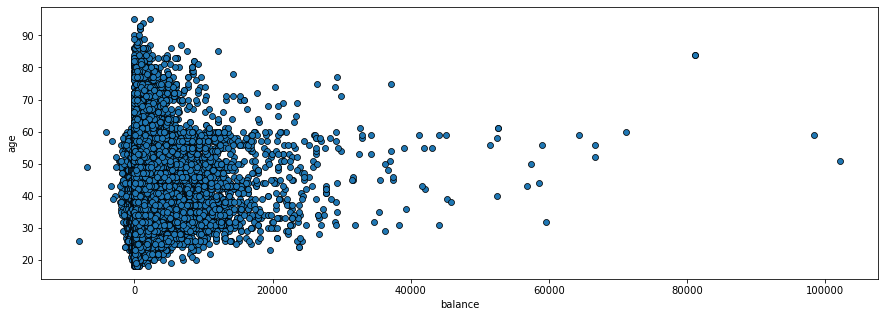

In [172]:
plt.figure(figsize=(15,5))
sns.scatterplot(y=dummy['age'],x=dummy['balance'],edgecolor='black')
plt.show()

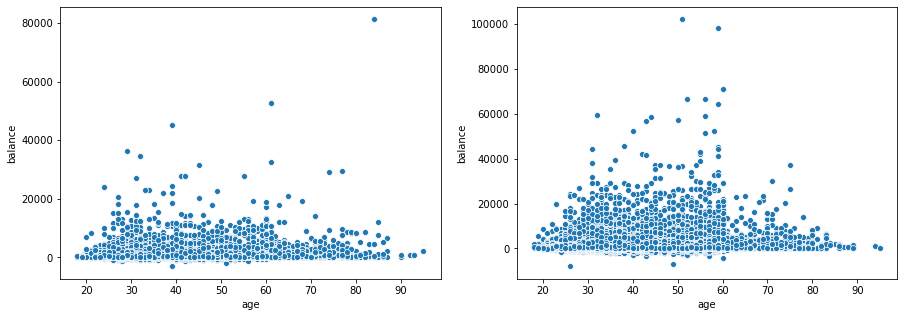

In [173]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['age'],y=dummy[dummy['y']=='yes']['balance'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['age'],y=dummy[dummy['y']=='no']['balance'])

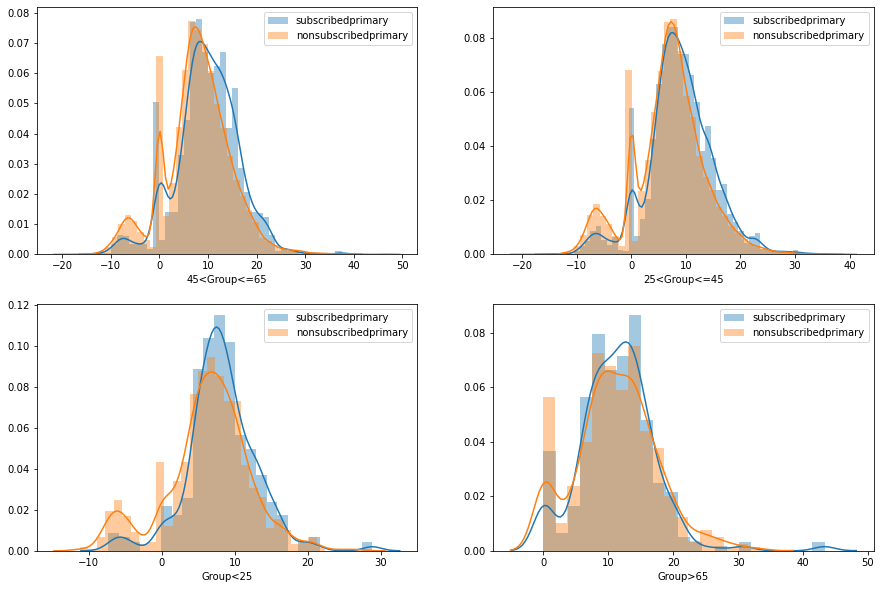

In [174]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='45<Group<=65')&
                           (dummy['y']=='yes')]['balance']),label='subscribedprimary')
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='45<Group<=65')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribedprimary')
plt.legend()
plt.xlabel('45<Group<=65')


plt.subplot(2,2,2)
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='25<Group<=45')&
                           (dummy['y']=='yes')]['balance']),label='subscribedprimary')
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='25<Group<=45')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribedprimary')
plt.legend()
plt.xlabel('25<Group<=45')

plt.subplot(2,2,3)
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='Group<25')&
                           (dummy['y']=='yes')]['balance']),label='subscribedprimary')
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='Group<25')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribedprimary')
plt.legend()
plt.xlabel('Group<25')


plt.subplot(2,2,4)
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='Group>65')&
                           (dummy['y']=='yes')]['balance']),label='subscribedprimary')
sns.distplot(np.cbrt(dummy[(dummy['converted_age_group']=='Group>65')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribedprimary')
plt.legend()
plt.xlabel('Group>65')
plt.show()

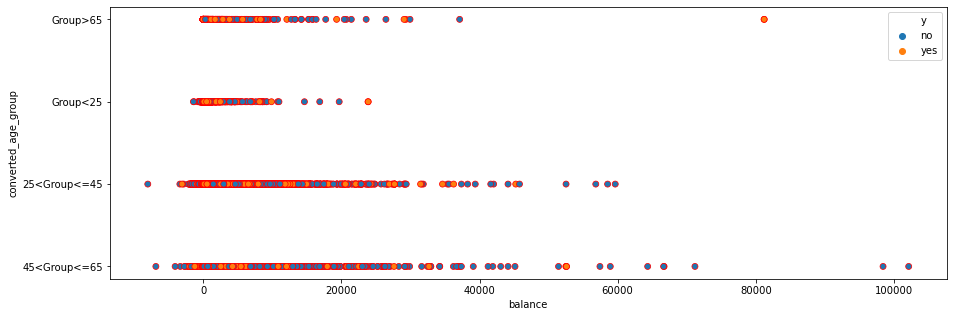

In [175]:
plt.figure(figsize=(15,5))
sns.scatterplot(y='converted_age_group',x='balance',data=dummy,edgecolor='red',hue='y')
plt.show()

### Balance-Duration

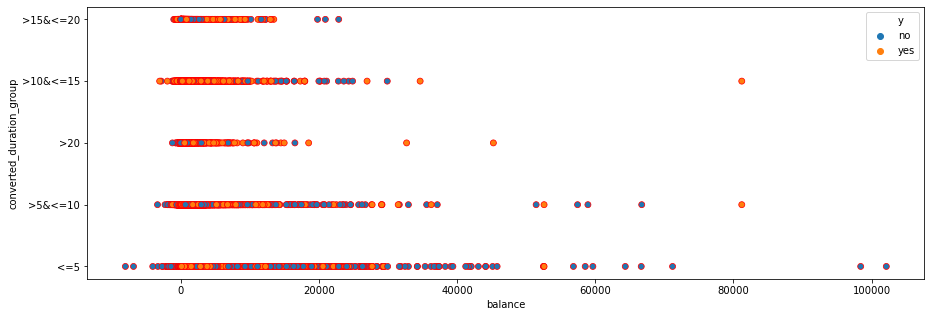

In [176]:
plt.figure(figsize=(15,5))
sns.scatterplot(y='converted_duration_group',x='balance',data=dummy,edgecolor='red',hue='y')
plt.show()

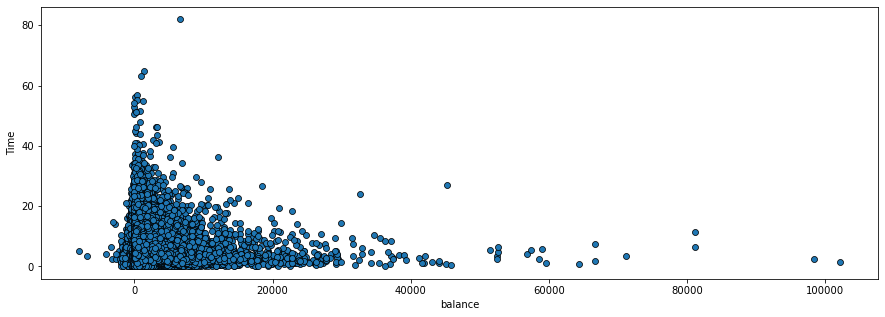

In [177]:
plt.figure(figsize=(15,5))
sns.scatterplot(y=dummy['Time'],x=dummy['balance'],edgecolor='black')
plt.show()

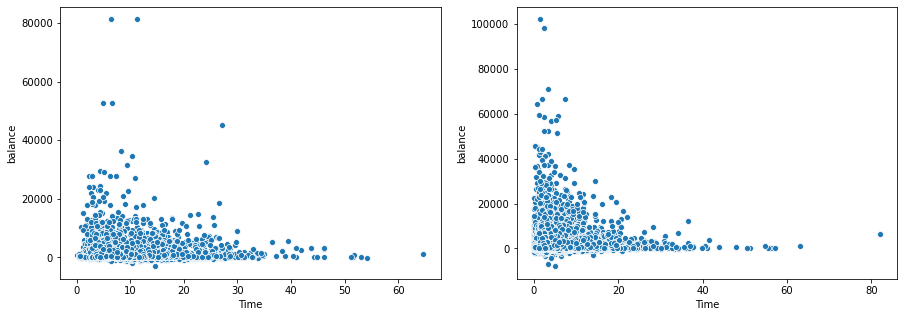

In [178]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['Time'],y=dummy[dummy['y']=='yes']['balance'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['Time'],y=dummy[dummy['y']=='no']['balance'])

plt.show()

Text(0.5, 0, '>15&<=20')

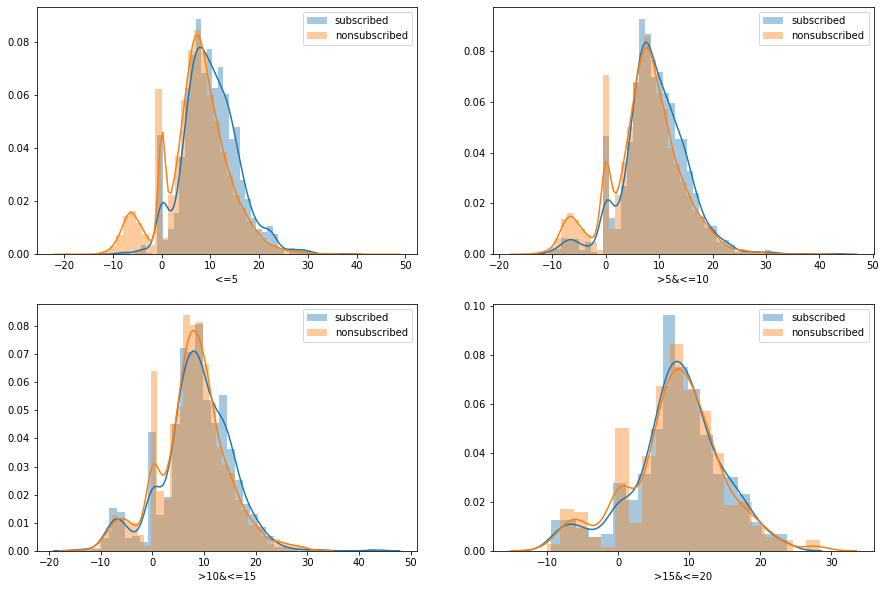

In [179]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='<=5')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='<=5')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.xlabel('<=5')

plt.subplot(2,2,2)
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='>5&<=10')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='>5&<=10')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.xlabel('>5&<=10')
plt.subplot(2,2,3)
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='>10&<=15')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='>10&<=15')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.xlabel('>10&<=15')
plt.subplot(2,2,4)
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='>15&<=20')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_duration_group']=='>15&<=20')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.xlabel('>15&<=20')

### Balance-Day

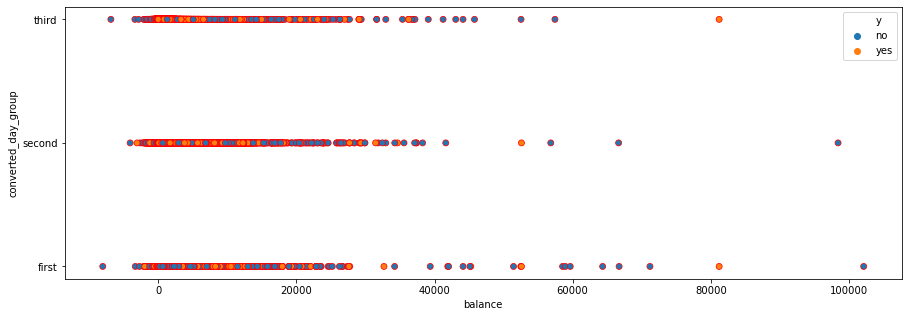

In [180]:
plt.figure(figsize=(15,5))
sns.scatterplot(y='converted_day_group',x='balance',data=dummy,edgecolor='red',hue='y')
plt.show()

Text(0.5, 0, 'Third')

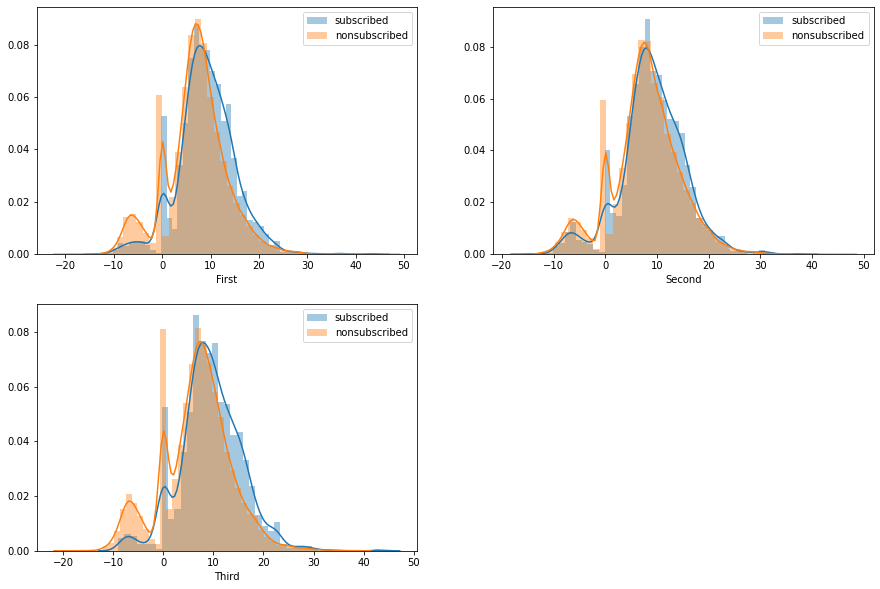

In [181]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(np.cbrt(dummy[(dummy['converted_day_group']=='first')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_day_group']=='first')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.xlabel('First')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(np.cbrt(dummy[(dummy['converted_day_group']=='second')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_day_group']=='second')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.xlabel('Second')

plt.subplot(2,2,3)
sns.distplot(np.cbrt(dummy[(dummy['converted_day_group']=='third')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_day_group']=='third')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.xlabel('Third')


### Balance-Pdays

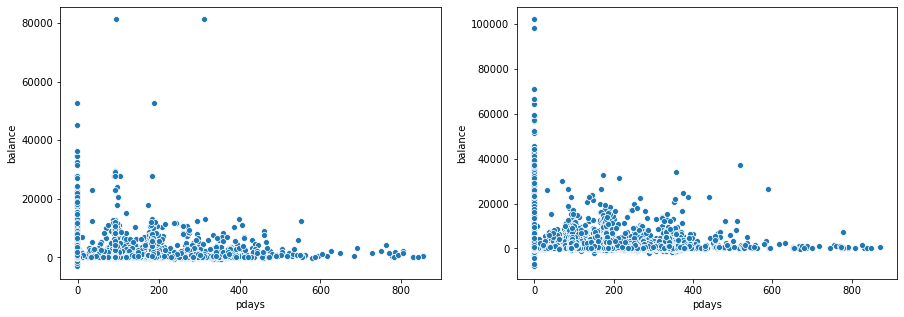

In [182]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=bank[bank['y']=='yes']['pdays'],y=bank[bank['y']=='yes']['balance'])
plt.subplot(1,2,2)
sns.scatterplot(x=bank[bank['y']=='no']['pdays'],y=bank[bank['y']=='no']['balance'])

plt.show()

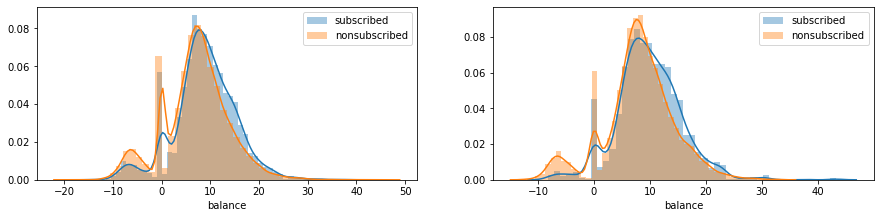

In [183]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(np.cbrt(dummy[(dummy['converted_pdays_group']=='newClients')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_pdays_group']=='newClients')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(np.cbrt(dummy[(dummy['converted_pdays_group']=='oldClients')&
                           (dummy['y']=='yes')]['balance']),label='subscribed')
sns.distplot(np.cbrt(dummy[(dummy['converted_pdays_group']=='oldClients')&
                           (dummy['y']=='no')]['balance']),label='nonsubscribed')
plt.legend()


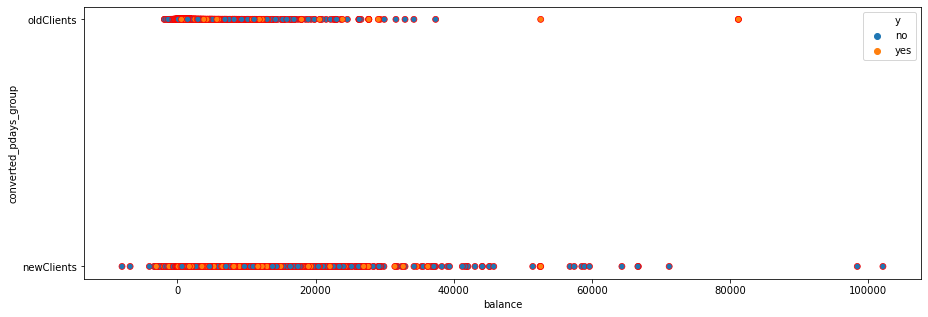

In [184]:
plt.figure(figsize=(15,5))
sns.scatterplot(y='converted_pdays_group',x='balance',data=dummy,edgecolor='red',hue='y')
plt.show()

### Duration-Age

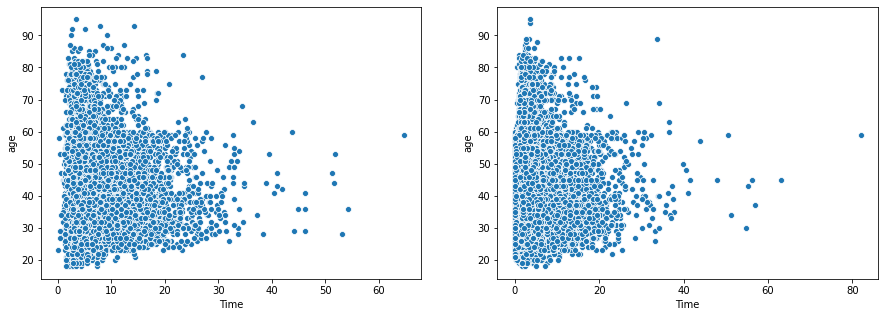

In [185]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['Time'],y=bank[bank['y']=='yes']['age'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['Time'],y=bank[bank['y']=='no']['age'])
plt.show()

converted_age_group       25<Group<=45  45<Group<=65  Group<25  Group>65
converted_duration_group                                                
<=5                              21326         10233       931       447
>10&<=15                          1571           653        79        69
>15&<=20                           558           252        27        21
>20                                365           173        14         8
>5&<=10                           5607          2386       285       206


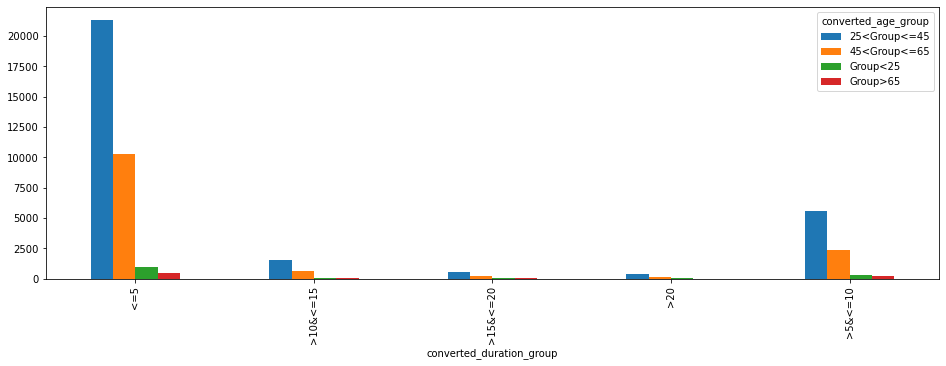

In [186]:
print(pd.crosstab(dummy['converted_duration_group'],dummy['converted_age_group']))
pd.crosstab(dummy['converted_duration_group'],dummy['converted_age_group']).plot(kind='bar',figsize=(16,5))

y                                                  no %      yes %
converted_duration_group converted_age_group                      
<=5                      25<Group<=45         95.118635   4.881365
                         45<Group<=65         95.123620   4.876380
                         Group<25             83.243824  16.756176
                         Group>65             69.798658  30.201342
>10&<=15                 25<Group<=45         59.452578  40.547422
                         45<Group<=65         58.958652  41.041348
                         Group<25             44.303797  55.696203
                         Group>65             36.231884  63.768116
>15&<=20                 25<Group<=45         42.114695  57.885305
                         45<Group<=65         42.857143  57.142857
                         Group<25             37.037037  62.962963
                         Group>65             52.380952  47.619048
>20                      25<Group<=45         37.808219  62.19

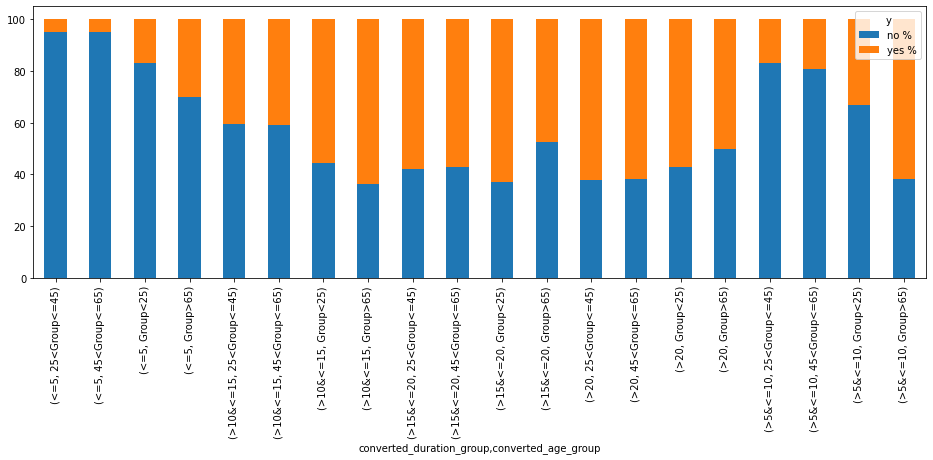

In [187]:
df=pd.crosstab([dummy['converted_duration_group'],dummy['converted_age_group']],dummy['y'])
df['total_approached']=df['yes']+df['no']
df['no %']=df['no']/df['total_approached']*100
df['yes %']=df['yes']/df['total_approached']*100
print(df[['no %','yes %']])
df[['no %','yes %']].plot(kind='bar',stacked=True,figsize=(16,5))

### Day-Age

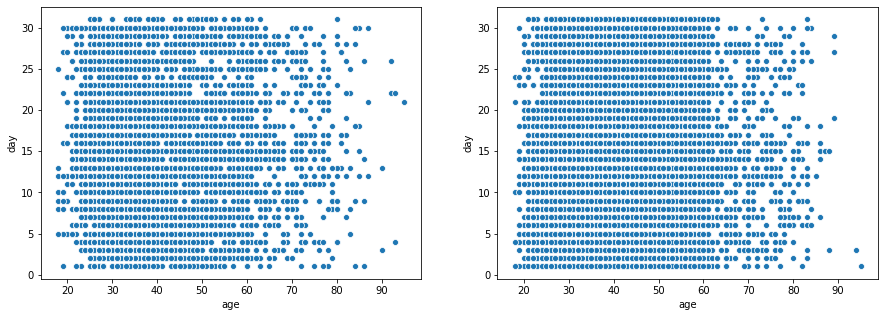

In [188]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['age'],y=dummy[dummy['y']=='yes']['day'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['age'],y=dummy[dummy['y']=='no']['day'])
plt.show()

### Pdays-Age

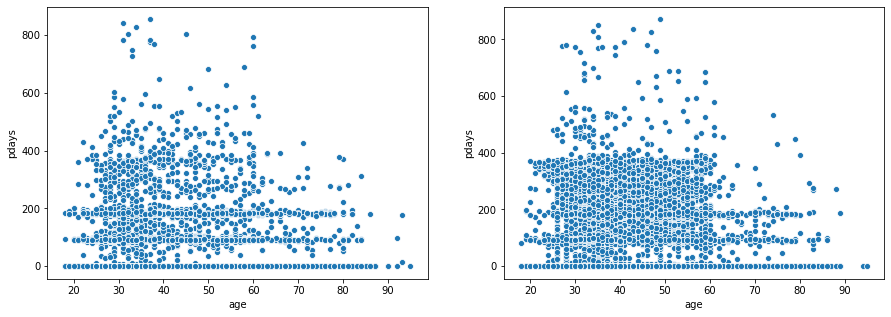

In [189]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['age'],y=bank[bank['y']=='yes']['pdays'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['age'],y=bank[bank['y']=='no']['pdays'])
plt.show()

### Day-Duration

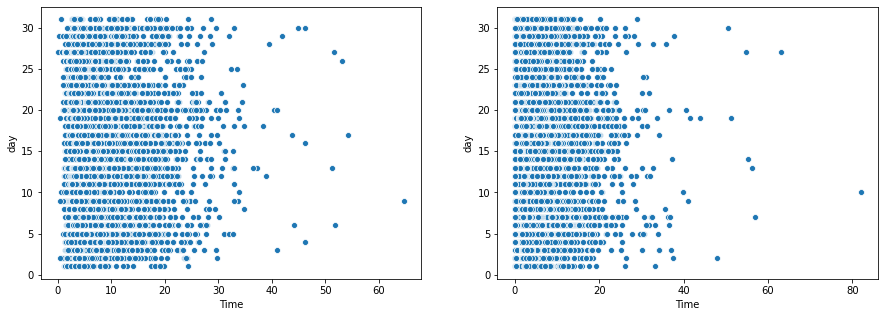

In [190]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['Time'],y=dummy[dummy['y']=='yes']['day'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['Time'],y=dummy[dummy['y']=='no']['day'])
plt.show()

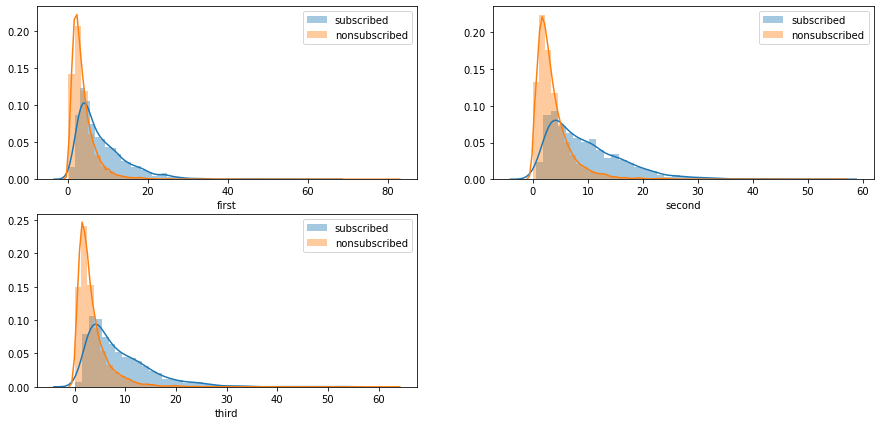

In [191]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(dummy[(dummy['converted_day_group']=='first')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_day_group']=='first')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.xlabel('first')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(dummy[(dummy['converted_day_group']=='second')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_day_group']=='second')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('second')
plt.subplot(2,2,3)
sns.distplot(dummy[(dummy['converted_day_group']=='third')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_day_group']=='third')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('third')

plt.show()


### Pdays-Duration

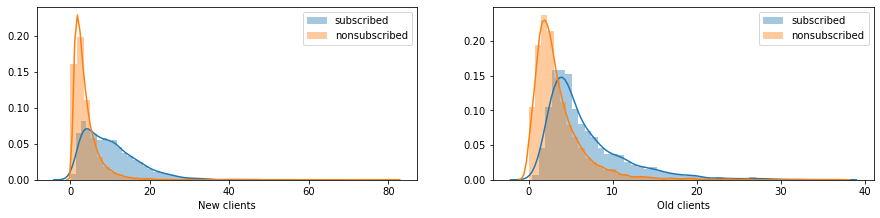

In [192]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(dummy[(dummy['converted_pdays_group']=='newClients')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_pdays_group']=='newClients')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.xlabel('New clients')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(dummy[(dummy['converted_pdays_group']=='oldClients')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_pdays_group']=='oldClients')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('Old clients')

plt.show()


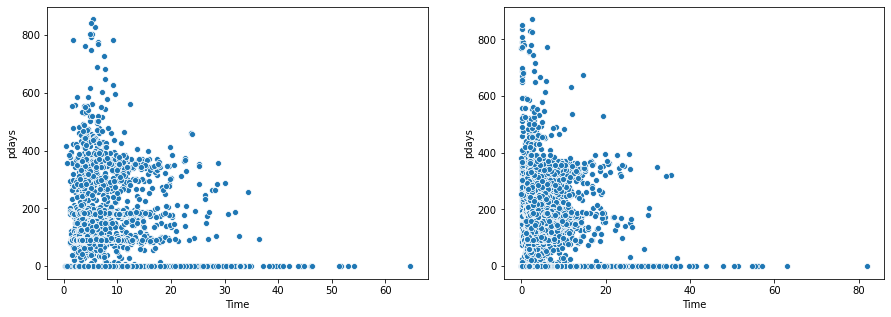

In [193]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['Time'],y=bank[bank['y']=='yes']['pdays'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['Time'],y=bank[bank['y']=='no']['pdays'])
plt.show()

### Pdays-Day

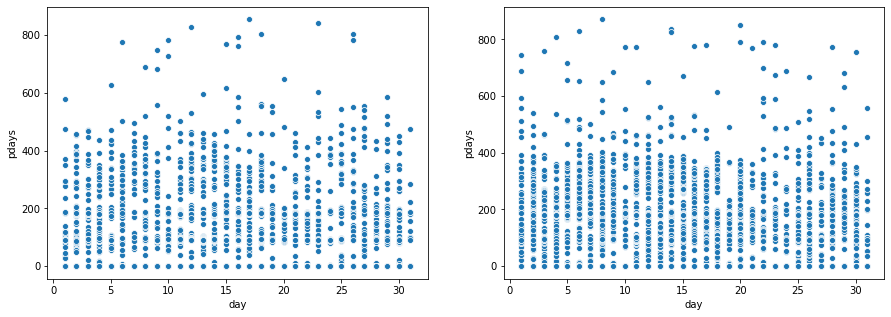

In [194]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['day'],y=bank[bank['y']=='yes']['pdays'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['day'],y=bank[bank['y']=='no']['pdays'])
plt.show()

#### Multivariate part3

In [195]:
dummy=bank[['marital','balance','y','job','day','education','default','housing','loan','contact','poutcome']].copy(deep=True)
minutes=bank[['duration']]/60
dummy['Time']=minutes
k=[]
for i in dummy['Time']:
    if i<=5:
        k.append('<=5')
    elif i>5 and i<=10:
        k.append('>5&<=10')
    elif i>10 and i<=15:
        k.append('>10&<=15')
    elif i>15 and i<=20:
        k.append('>15&<=20')
    else:
        k.append('>20')
dummy['minutes']=k

k=[]
for i in bank['pdays']:
    if i==-1:
        k.append('newClients')
    else:
        k.append('oldClients')
dummy['client']=k

y                  People_approached  Percentage No  Percentage Yes
marital  minutes                                                   
divorced <=5                    3777          95.13            4.87
         >10&<=15                285          53.33           46.67
         >15&<=20                108          37.96           62.04
         >20                      75          28.00           72.00
         >5&<=10                 962          80.87           19.13
married  <=5                   20038          95.33            4.67
         >10&<=15               1385          62.17           37.83
         >15&<=20                480          46.88           53.12
         >20                     314          41.72           58.28
         >5&<=10                4997          82.85           17.15
single   <=5                    9122          92.21            7.79
         >10&<=15                702          52.14           47.86
         >15&<=20                270          36

Text(0.5, 0, 'Previous Outcome No/Yes')

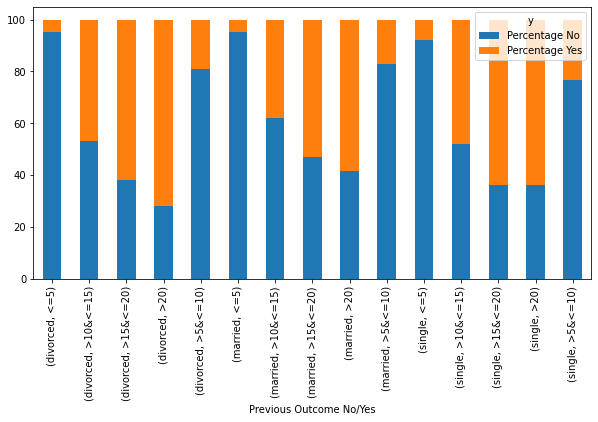

In [196]:
#bivariate categorical to numerical plots
df=pd.crosstab([dummy['marital'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')


Text(0.5, 0, 'Previous Outcome No/Yes')

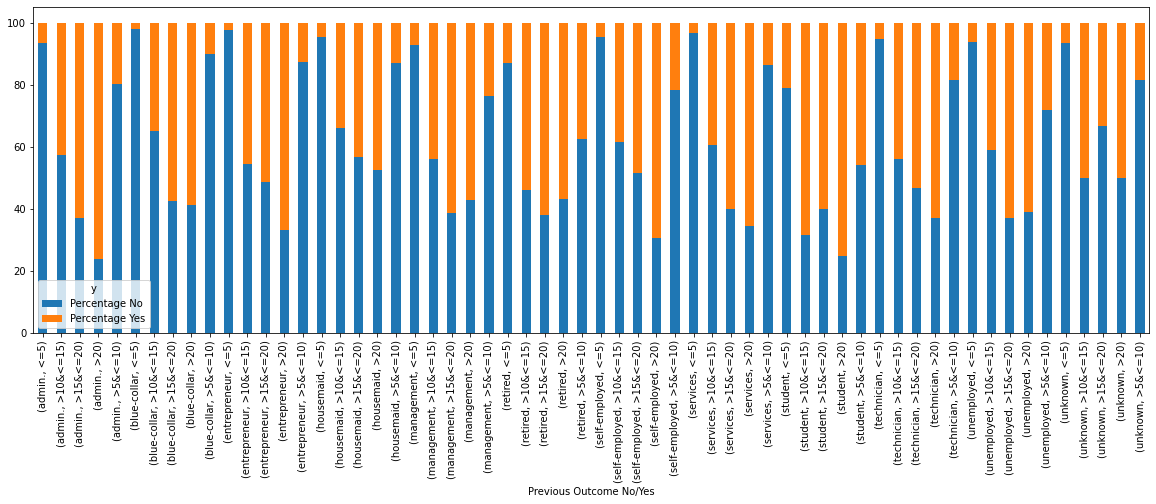

In [197]:
#bivariate categorical to numerical plots

df=pd.crosstab([dummy['job'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
#print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')


y                   People_approached  Percentage No  Percentage Yes
education minutes                                                   
primary   <=5                    5042          97.26            2.74
          >10&<=15                367          61.31           38.69
          >15&<=20                141          43.26           56.74
          >20                      82          40.24           59.76
          >5&<=10                1219          85.07           14.93
secondary <=5                   16847          95.29            4.71
          >10&<=15               1216          60.03           39.97
          >15&<=20                428          43.69           56.31
          >20                     271          34.32           65.68
          >5&<=10                4440          83.06           16.94
tertiary  <=5                    9716          91.77            8.23
          >10&<=15                683          52.86           47.14
          >15&<=20                

Text(0.5, 0, 'Previous Outcome No/Yes')

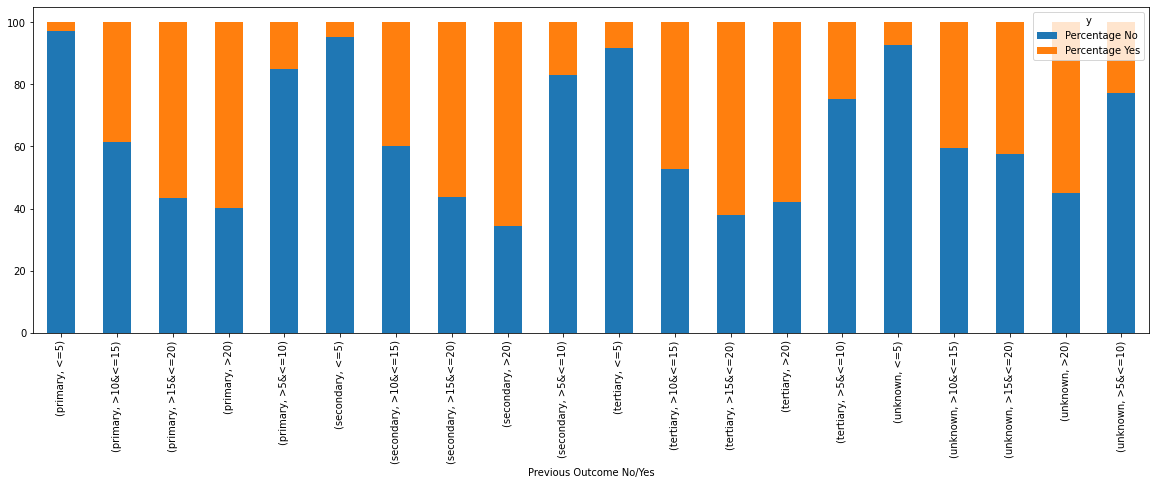

In [198]:
#bivariate categorical to numerical plots

df=pd.crosstab([dummy['education'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')


y                 People_approached  Percentage No  Percentage Yes
default minutes                                                   
no      <=5                   32330          94.34            5.66
        >10&<=15               2327          58.14           41.86
        >15&<=20                848          42.57           57.43
        >20                     556          37.95           62.05
        >5&<=10                8335          80.79           19.21
yes     <=5                     607          99.84            0.16
        >10&<=15                 45          57.78           42.22
        >15&<=20                 10          30.00           70.00
        >20                       4          75.00           25.00
        >5&<=10                 149          83.89           16.11


Text(0.5, 0, 'Previous Outcome No/Yes')

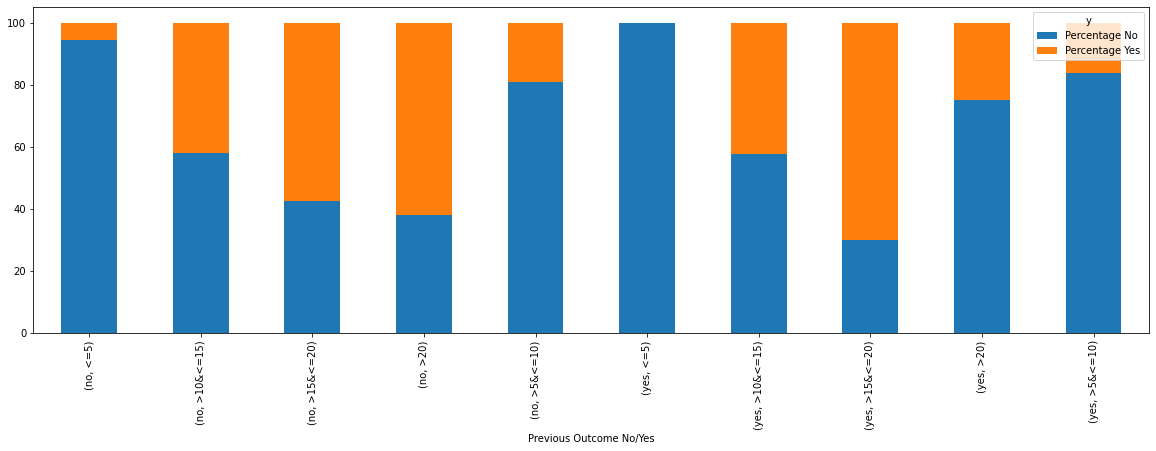

In [199]:
#bivariate categorical to numerical plots

df=pd.crosstab([dummy['default'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')


y                 People_approached  Percentage No  Percentage Yes
housing minutes                                                   
no      <=5                   14614          90.46            9.54
        >10&<=15               1029          51.99           48.01
        >15&<=20                367          38.69           61.31
        >20                     239          39.75           60.25
        >5&<=10                3832          71.37           28.63
yes     <=5                   18323          97.62            2.38
        >10&<=15               1343          62.84           37.16
        >15&<=20                491          45.21           54.79
        >20                     321          37.07           62.93
        >5&<=10                4652          88.65           11.35


Text(0.5, 0, 'Previous Outcome No/Yes')

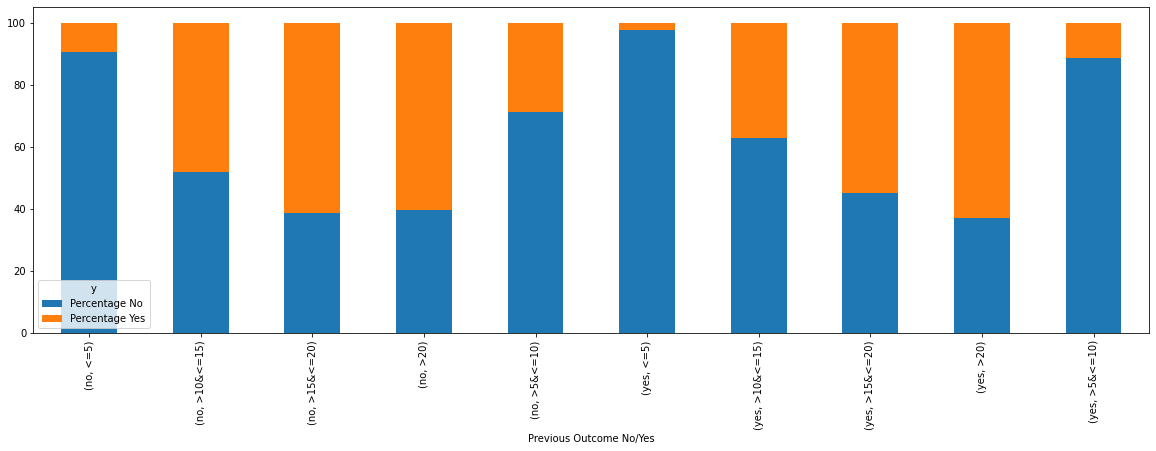

In [200]:
#bivariate categorical to numerical plots

df=pd.crosstab([dummy['housing'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')


y              People_approached  Percentage No  Percentage Yes
loan minutes                                                   
no   <=5                   27527          93.76            6.24
     >10&<=15               2028          57.10           42.90
     >15&<=20                729          43.48           56.52
     >20                     469          38.59           61.41
     >5&<=10                7214          78.99           21.01
yes  <=5                    5410          97.93            2.07
     >10&<=15                344          64.24           35.76
     >15&<=20                129          36.43           63.57
     >20                      91          36.26           63.74
     >5&<=10                1270          91.42            8.58


Text(0.5, 0, 'Previous Outcome No/Yes')

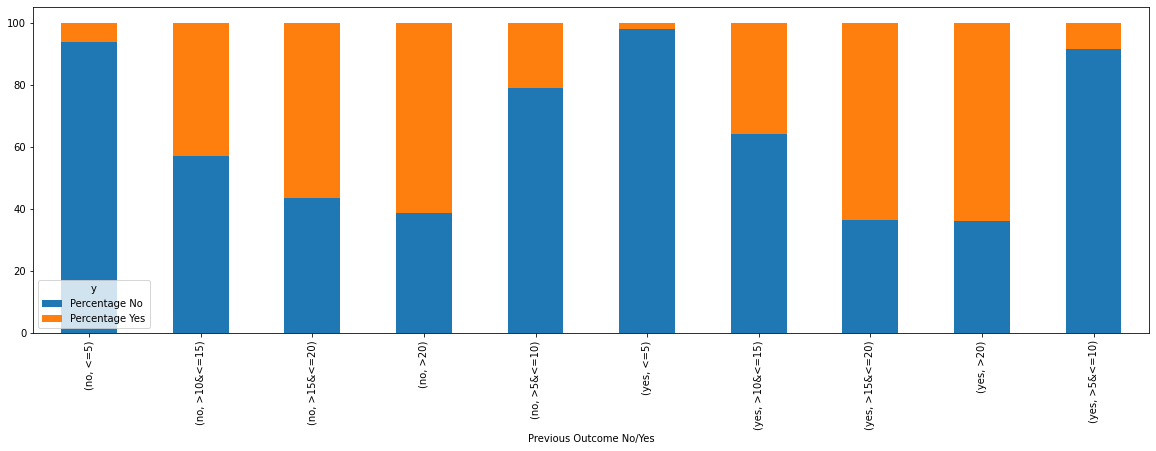

In [201]:
#bivariate categorical to numerical plots

df=pd.crosstab([dummy['loan'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')


y                   People_approached  Percentage No  Percentage Yes
contact   minutes                                                   
cellular  <=5                   21068          92.25            7.75
          >10&<=15               1628          52.46           47.54
          >15&<=20                577          38.47           61.53
          >20                     357          35.01           64.99
          >5&<=10                5655          75.67           24.33
telephone <=5                    2248          93.42            6.58
          >10&<=15                116          56.03           43.97
          >15&<=20                 49          40.82           59.18
          >20                      43          46.51           53.49
          >5&<=10                 450          69.11           30.89
unknown   <=5                    9621          99.47            0.53
          >10&<=15                628          73.25           26.75
          >15&<=20                

Text(0.5, 0, 'Previous Outcome No/Yes')

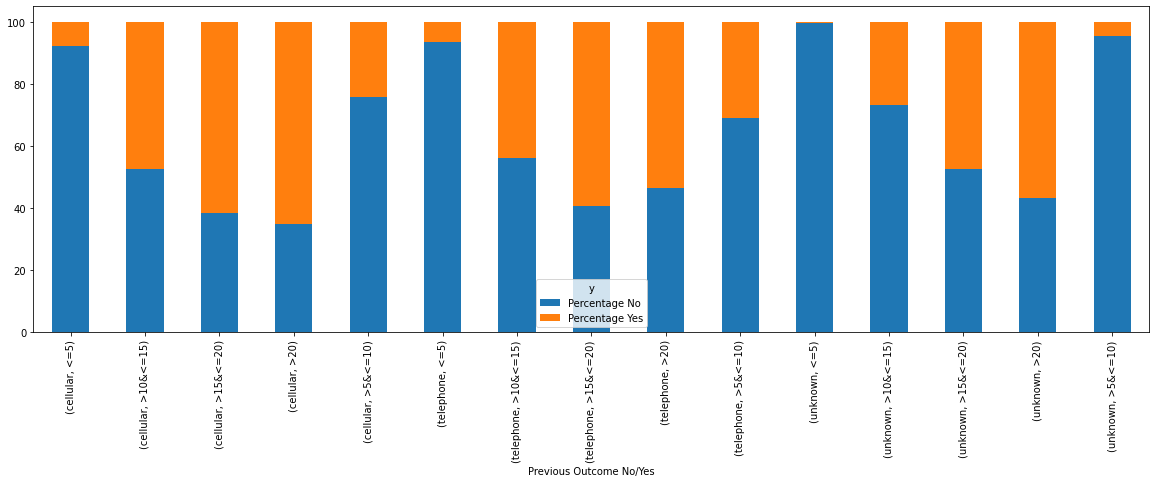

In [202]:
#bivariate categorical to numerical plots

df=pd.crosstab([dummy['contact'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')


y                  People_approached  Percentage No  Percentage Yes
poutcome minutes                                                   
failure  <=5                    3677          93.04            6.96
         >10&<=15                220          52.27           47.73
         >15&<=20                 56          50.00           50.00
         >20                      51          47.06           52.94
         >5&<=10                 897          77.48           22.52
other    <=5                    1320          90.45            9.55
         >10&<=15                 93          52.69           47.31
         >15&<=20                 43          51.16           48.84
         >20                      14          42.86           57.14
         >5&<=10                 370          70.81           29.19
success  <=5                     920          43.48           56.52
         >10&<=15                109          20.18           79.82
         >15&<=20                 41          19

Text(0.5, 0, 'Previous Outcome No/Yes')

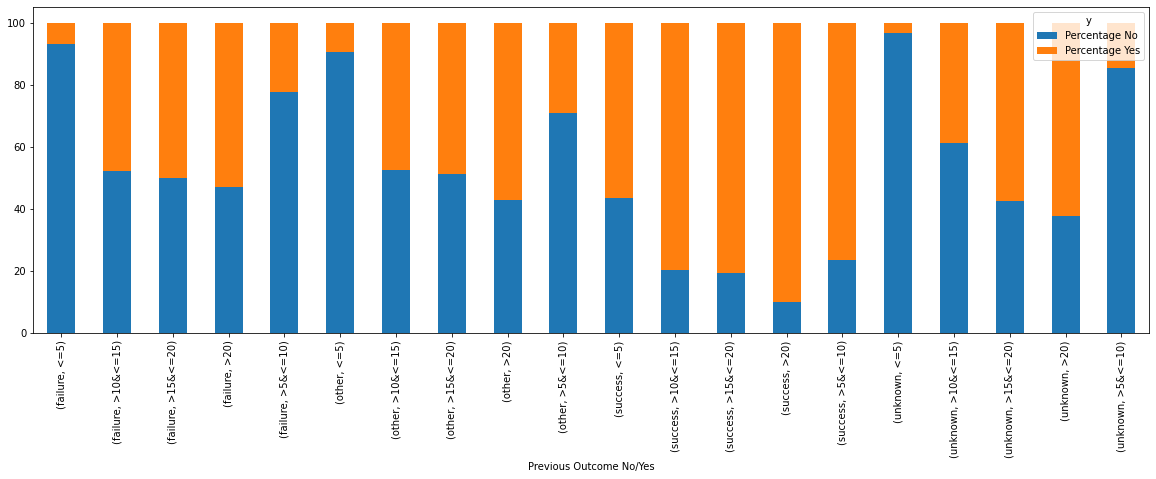

In [203]:
df=pd.crosstab([dummy['poutcome'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')

y                    People_approached  Percentage No  Percentage Yes
client     minutes                                                   
newClients <=5                   27016          96.56            3.44
           >10&<=15               1950          61.18           38.82
           >15&<=20                717          42.68           57.32
           >20                     485          37.73           62.27
           >5&<=10                6786          85.47           14.53
oldClients <=5                    5921          84.75           15.25
           >10&<=15                422          44.08           55.92
           >15&<=20                141          41.13           58.87
           >20                      75          41.33           58.67
           >5&<=10                1698          62.37           37.63


Text(0.5, 0, 'Previous Outcome No/Yes')

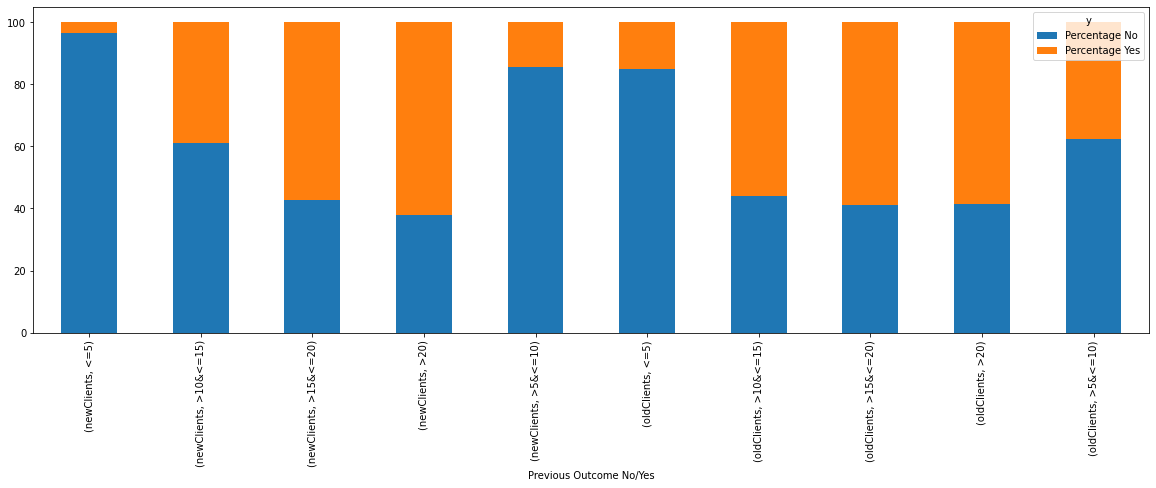

In [204]:
df=pd.crosstab([dummy['client'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True)
plt.xlabel('Previous Outcome No/Yes')

In [205]:
df=bank.copy(deep=True)

df.Marital vs df.duration against subscribers and non-subscribers

In [206]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

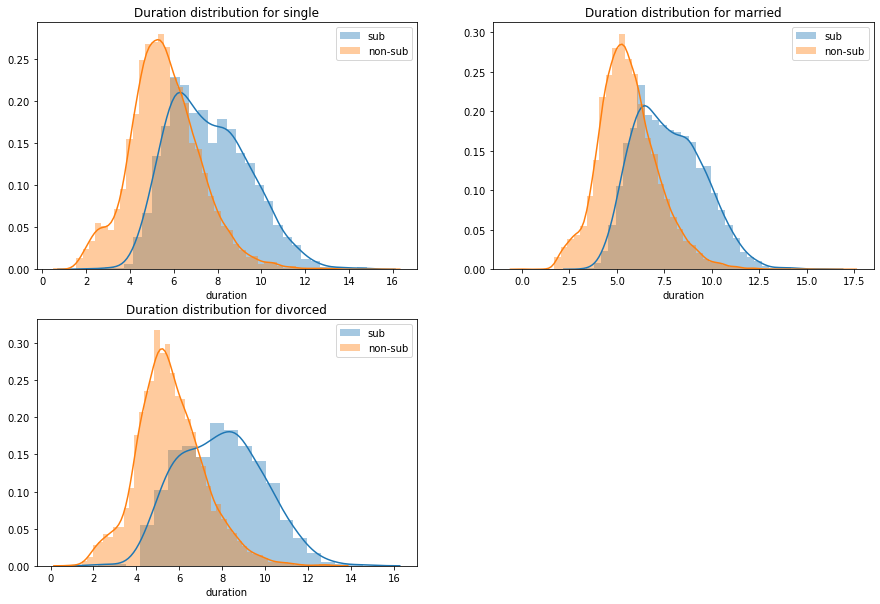

In [207]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) 
sns.distplot(np.cbrt(df[(df['marital']=='single')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['marital']=='single')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for single')
plt.legend()
plt.subplot(2,2,2) 
sns.distplot(np.cbrt(df[(df['marital']=='married')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['marital']=='married')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for married')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(np.cbrt(df[(df['marital']=='divorced')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['marital']=='divorced')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for divorced')
plt.legend()
plt.show()

df.job vs df.duration against subscribers and non-subscribers

In [208]:
df['job']=df['job'].mask(df['job']=='unknown','student')

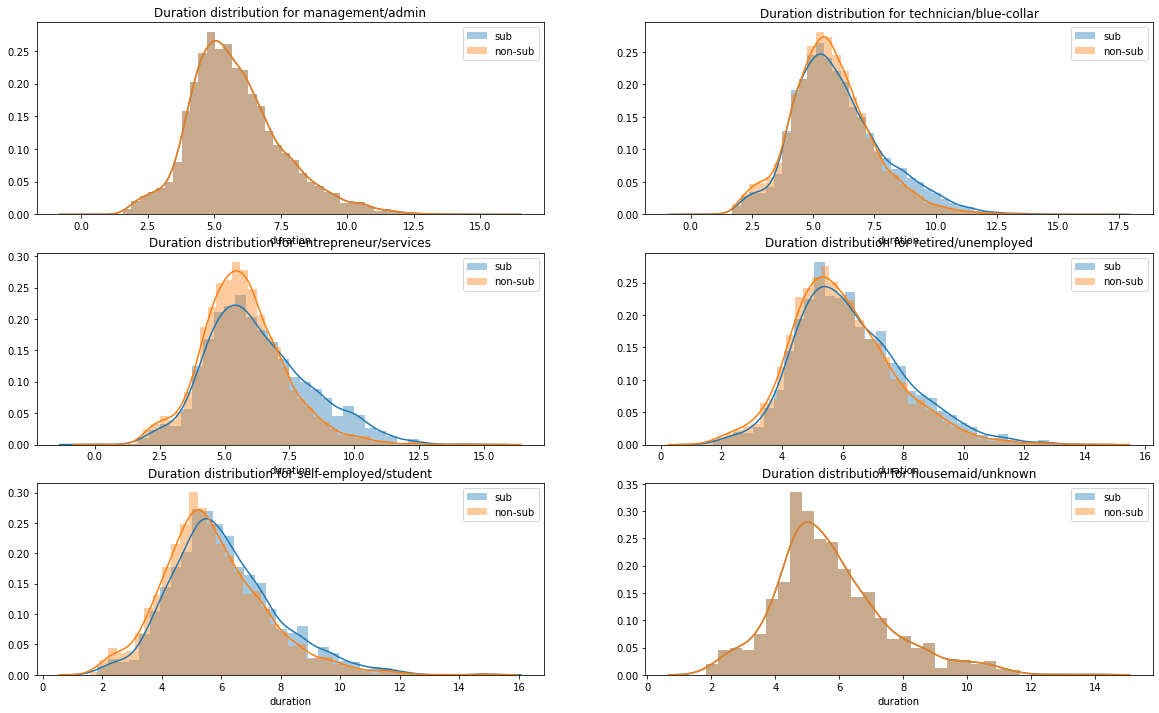

In [209]:
plt.figure(figsize=(20,12))
plt.subplot(3,2,1) 
sns.distplot(np.cbrt(df[(df['job']=='management') |(df['job']=='admin')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['job']=='management') |(df['job']=='admin')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for management/admin')
plt.legend()

plt.subplot(3,2,2) 
sns.distplot(np.cbrt(df[(df['job']=='technician') |(df['job']=='blue-collar')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['job']=='technician' ) |(df['job']=='blue-collar')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for technician/blue-collar')
plt.legend()

plt.subplot(3,2,3)
sns.distplot(np.cbrt(df[(df['job']=='entrepreneur') |(df['job']=='services')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['job']=='entrepreneur') |(df['job']=='services')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for entrepreneur/services')
plt.legend()

plt.subplot(3,2,4)
sns.distplot(np.cbrt(df[(df['job']=='retired') |(df['job']=='unemployed')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['job']=='retired') |(df['job']=='unemployed')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for retired/unemployed')
plt.legend()

plt.subplot(3,2,5)
sns.distplot(np.cbrt(df[(df['job']=='self-employed') |(df['job']=='student')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['job']=='self-employed') |(df['job']=='student')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for self-employed/student')
plt.legend()

plt.subplot(3,2,6)
sns.distplot(np.cbrt(df[(df['job']=='housemaid') |(df['job']=='unknown')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['job']=='housemaid') |(df['job']=='unknown')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for housemaid/unknown')
plt.legend()
plt.show()

df.education vs df.duration against subscribers and non-subscribers

In [210]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

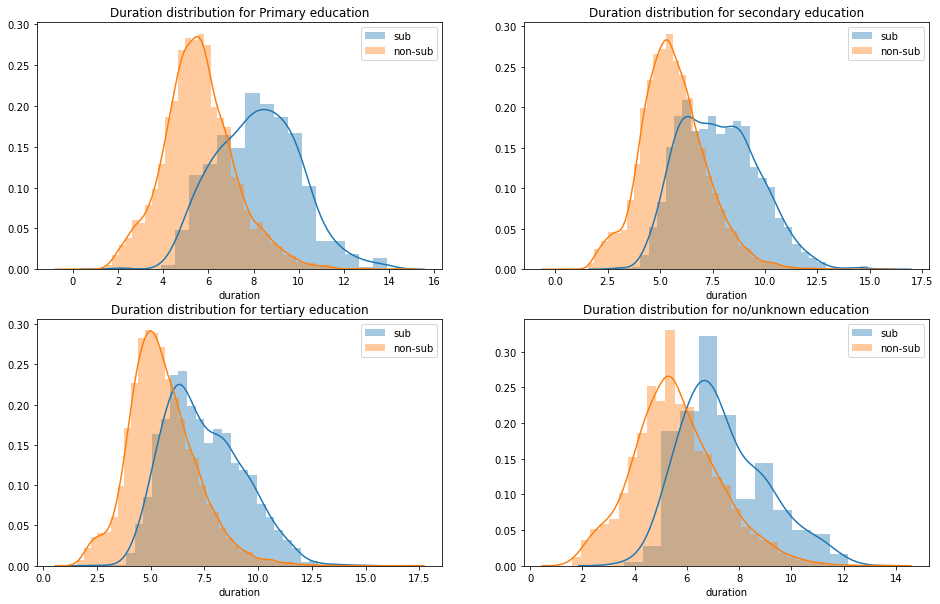

In [211]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1) 
sns.distplot(np.cbrt(df[(df['education']=='primary')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['education']=='primary')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for Primary education')
plt.legend()

plt.subplot(2,2,2) 
sns.distplot(np.cbrt(df[(df['education']=='secondary')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['education']=='secondary')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for secondary education')
plt.legend()

plt.subplot(2,2,3)
sns.distplot(np.cbrt(df[(df['education']=='tertiary')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['education']=='tertiary')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for tertiary education')
plt.legend()

plt.subplot(2,2,4)
sns.distplot(np.cbrt(df[(df['education']=='unknown')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['education']=='unknown')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for no/unknown education')
plt.legend()
plt.show()

df.default vs df.duration against subscribers and non-subscribers

In [212]:
df.default.unique()

array(['no', 'yes'], dtype=object)

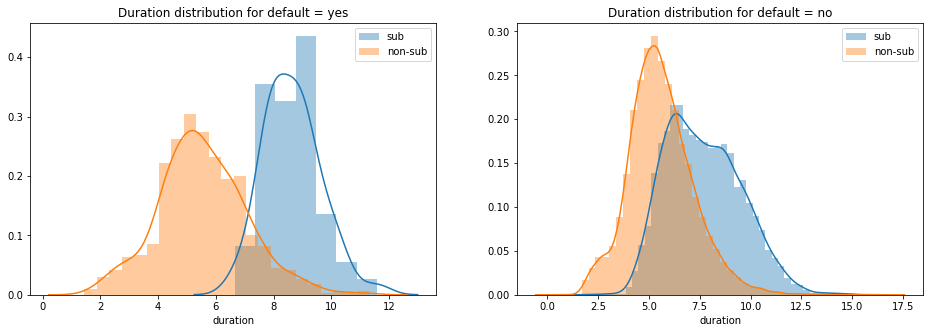

In [213]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(np.cbrt(df[(df['default']=='yes')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['default']=='yes')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for default = yes')
plt.legend()
plt.subplot(1,2,2) 
sns.distplot(np.cbrt(df[(df['default']=='no')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['default']=='no')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for default = no')
plt.legend()
plt.show()

df.housing vs df.duration against subscribers and non-subscribers

In [214]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

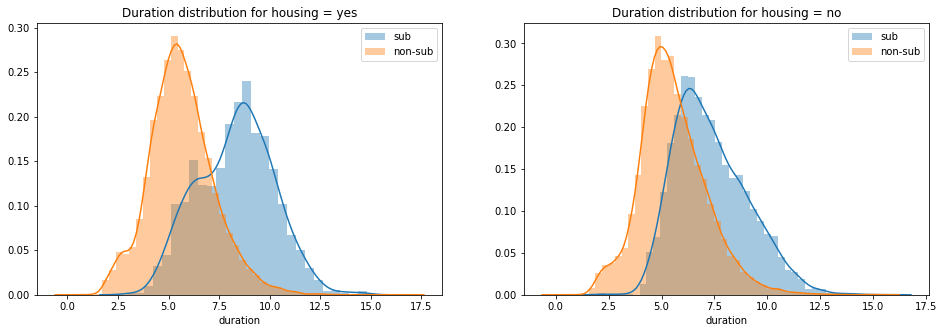

In [215]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(np.cbrt(df[(df['housing']=='yes')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['housing']=='yes')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for housing = yes')
plt.legend()
plt.subplot(1,2,2) 
sns.distplot(np.cbrt(df[(df['housing']=='no')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['housing']=='no')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for housing = no')
plt.legend()
plt.show()

df.loan vs df.duration against subscribers and non-subscribers

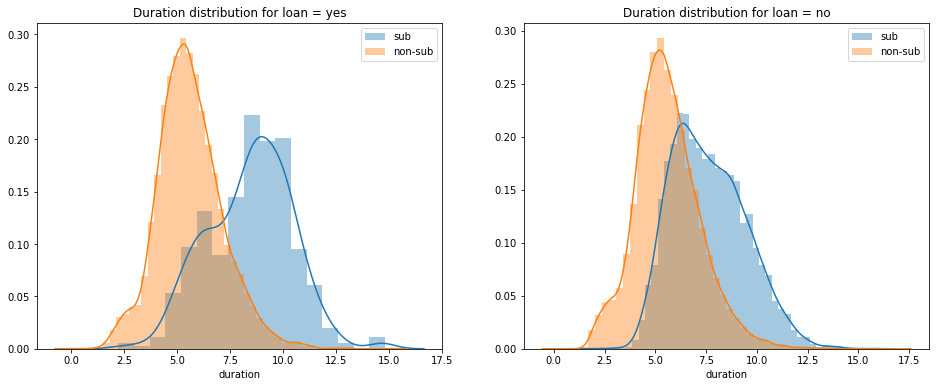

In [216]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
sns.distplot(np.cbrt(df[(df['loan']=='yes')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['loan']=='yes')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for loan = yes')
plt.legend()
plt.subplot(1,2,2) 
sns.distplot(np.cbrt(df[(df['loan']=='no')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['loan']=='no')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for loan = no')
plt.legend()
plt.show()

df.contact vs df.duration against subscribers and non-subscribers

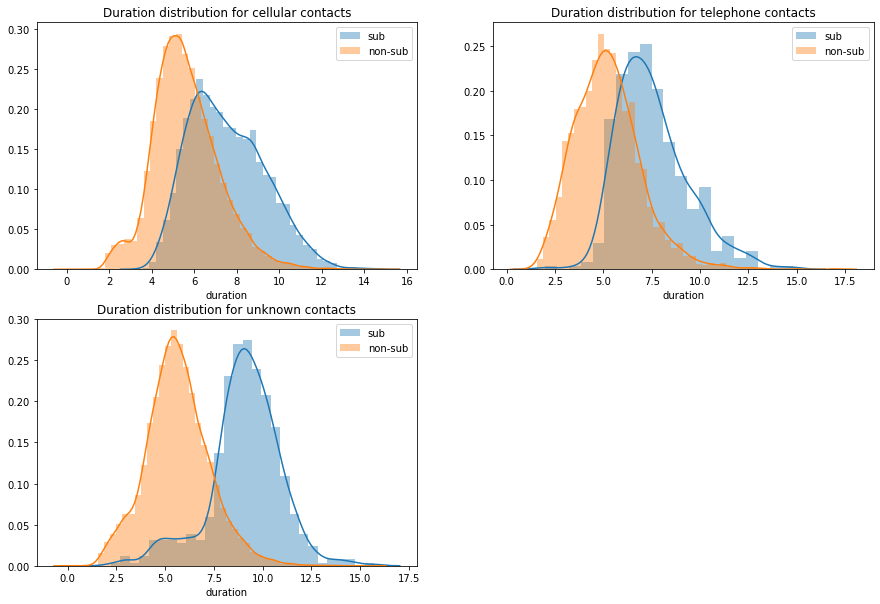

In [217]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) 
sns.distplot(np.cbrt(df[(df['contact']=='cellular')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['contact']=='cellular')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for cellular contacts')
plt.legend()

plt.subplot(2,2,2) 
sns.distplot(np.cbrt(df[(df['contact']=='telephone')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['contact']=='telephone')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for telephone contacts')
plt.legend()

plt.subplot(2,2,3)
sns.distplot(np.cbrt(df[(df['contact']=='unknown')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['contact']=='unknown')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for unknown contacts')
plt.legend()
plt.show()

df.month vs df.duration against subscribers and non-subscribers

In [218]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

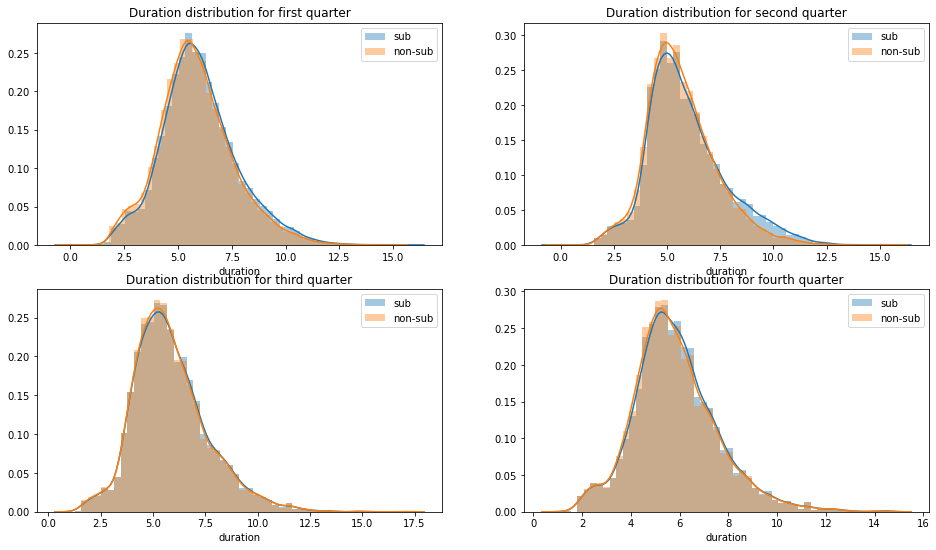

In [219]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1) 
sns.distplot(np.cbrt(df[(df['month'] == 'apr')|(df['month'] =='may')|(df['month'] =='jun')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['month'] == 'apr')|(df['month'] =='may')|(df['month'] =='jun')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for first quarter')
plt.legend()

plt.subplot(2,2,2) 
sns.distplot(np.cbrt(df[(df['month'] == 'aug')|(df['month'] =='sep')|(df['month'] =='jul')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['month'] == 'aug')|(df['month'] =='sep')|(df['month'] =='jul')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for second quarter')
plt.legend()

plt.subplot(2,2,3)
sns.distplot(np.cbrt(df[(df['month'] == 'oct')|(df['month'] =='nov')|(df['month'] =='dec')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['month'] == 'oct')|(df['month'] =='nov')|(df['month'] =='dec')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for third quarter')
plt.legend()

plt.subplot(2,2,4)
sns.distplot(np.cbrt(df[(df['month'] == 'jan')|(df['month'] =='feb')|(df['month'] =='mar')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['month'] == 'jan')|(df['month'] =='feb')|(df['month'] =='mar')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for fourth quarter')
plt.legend()
plt.show()

df.poutcome vs df.duration against subscribers and non-subscribers

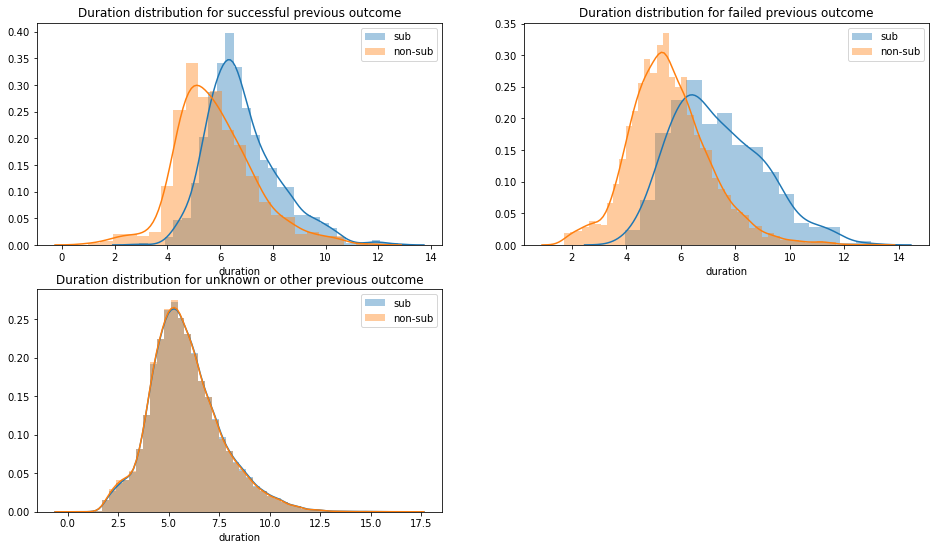

In [220]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1) 
sns.distplot(np.cbrt(df[(df['poutcome']=='success')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['poutcome']=='success')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for successful previous outcome')
plt.legend()

plt.subplot(2,2,2) 
sns.distplot(np.cbrt(df[(df['poutcome']=='failure')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['poutcome']=='failure')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for failed previous outcome')
plt.legend()

plt.subplot(2,2,3)
sns.distplot(np.cbrt(df[(df['poutcome']=='unknown')|(df['poutcome']=='other')&(df['y']=='yes')]['duration']),label = 'sub')
sns.distplot(np.cbrt(df[(df['poutcome']=='unknown')|(df['poutcome']=='other')&(df['y']=='no')]['duration']),label = 'non-sub')
plt.title('Duration distribution for unknown or other previous outcome')
plt.legend()
plt.show()

In [221]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [222]:
yes=bank[bank['y']=='yes']['age']
no=bank[bank['y']=='no']['age']
print('mean age of Subscribers=',yes.mean(), 'mean age of Non-Subscribers=',no.mean())
print(stats.ttest_ind(yes,no))

mean age of Subscribers= 41.670069956513515 mean age of Non-Subscribers= 40.83898602274435
Ttest_indResult(statistic=5.350255423036203, pvalue=8.825643691922395e-08)


    Hypothesis: H0: Mean age of Subscribers= mean age of non subscribers / Age is Insignificant Feature
                Ha: Mean age of Subscribers not Equals mean age of non subscribers / Age is Significant Feature
    pval=8.82*e-8 tstat=5.35        :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
            Hence Ha Holds True and Age Has a significant effect on target

#### Duration

In [223]:
yes=bank[bank['y']=='yes']['duration']/60 # converting the duration from seconds to minutes
no=bank[bank['y']=='no']['duration']/60
print('mean call duration of Subscribers=',yes.mean(), '\nmean call duration of NonSubscribers=',no.mean())
print(stats.ttest_ind(yes,no))

mean call duration of Subscribers= 8.954909560723484 
mean call duration of NonSubscribers= 3.6863801078770093
Ttest_indResult(statistic=91.28943612670857, pvalue=0.0)


    Hypothesis: H0: Mean Call Duration of Subscribers= mean Call Duration of nonsubscribers/Call Duration is Insignificant                                                                                                                      Feature
                Ha: Mean Call Duration of Subscribers not Equals mean Call Duration of non subscribers / Call Duration is                                                                                                               Significant Feature
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and Call Duration Has a significant effect on target

#### Balance

In [224]:
yes=bank[bank['y']=='yes']['balance']
no=bank[bank['y']=='no']['balance']
print('mean balance of Subscribers=',yes.mean(), '\nmean balance of NonSubscribers=',no.mean())
print(stats.ttest_ind(yes,no))

mean balance of Subscribers= 1804.2679145396105 
mean balance of NonSubscribers= 1303.7149691899203
Ttest_indResult(statistic=11.25043445878562, pvalue=2.5211136918751468e-29)


    Hypothesis: H0: mean balance of Subscribers= mean balance of nonsubscribers/Call Duration is Insignificant feature  
             Ha: mean balance of Subscribers not Equals mean balance of non subscribers/Call Duration is Significant Feature 
          :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and Balance Has a significant effect on target

In [225]:
yes=bank[(bank['y']=='yes')&(bank['balance']<0)]['balance']
no=bank[(bank['y']=='no')&(bank['balance']<0)]['balance']
print('mean balance of Subscribers having balance<0 =',yes.mean(), 
      '\nmean balance of NonSubscribers having balance<0=',no.mean())
print('no of Negetive Balance Subscribers=',len(yes), '\nno of Negetive Balance NonSubscribers=',len(no))

print(stats.ttest_ind(yes,no))

mean balance of Subscribers having balance<0 = -302.87619047619046 
mean balance of NonSubscribers having balance<0= -318.5517435320585
no of Negetive Balance Subscribers= 210 
no of Negetive Balance NonSubscribers= 3556
Ttest_indResult(statistic=0.598157750178834, pvalue=0.549770668253656)


In [226]:
yes=bank[(bank['y']=='yes')&(bank['balance']>0)]['balance']
no=bank[(bank['y']=='no')&(bank['balance']>0)]['balance']
print('mean balance of Subscribers having balance>0 =',yes.mean(), 
      '\nmean balance of NonSubscribers having balance>0=',no.mean())
print('no of positive Balance Subscribers=',len(yes), '\nno of positive Balance NonSubscribers=',len(no))

print(stats.ttest_ind(yes,no))

mean balance of Subscribers having balance>0 = 2006.7635262168374 
mean balance of NonSubscribers having balance>0= 1604.5039524499155
no of positive Balance Subscribers= 4787 
no of positive Balance NonSubscribers= 33144
Ttest_indResult(statistic=8.036095910859034, pvalue=9.540855117273107e-16)


    Hypothesis: H0: mean Positivebalance of Subscribers= mean Positivebalance of nonsubscribers/
            Having Positive Balance is Insignificant feature  
                Ha: mean balance of Subscribers not Equals mean balance of non subscribers/
                     Having Positive Balance is Significant Feature 
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and Positive Having Balance Has a significant effect on target

In [227]:
balance=bank[['balance','y']].copy(deep=True)
k=[]
for bal in balance['balance']:
    if bal==0:
        k.append('Zero')
    else:
        k.append('NonZero')
balance['balance']=k
print(pd.crosstab(balance['balance'],balance['y']))

y           no   yes
balance             
NonZero  36700  4997
Zero      3222   292


In [228]:
print(proportions_ztest([4997,292],[(36700+4997),(3222+292)]))

(6.508420013090475, 7.594532905140344e-11)


    Hypothesis: H0: mean Zero balance of Subscribers= mean Zerobalance of nonsubscribers/
            Having Zero Balance is Insignificant feature  
                Ha: mean balance of Subscribers not Equals mean balance of non subscribers/
                     Having Zero Balance is Significant Feature 
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and  Having Zero Balance Has a significant effect on target

In [229]:
from statsmodels.stats.anova import anova_lm
from statsmodels.api import OLS

#### Job-target

In [230]:
df=bank[['job','y']].copy(deep=True)
df['job']=df['job'].mask(df['job']=='unknown','student')
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(df['job'],df['y']))
print('tstat:',tstat,' pvalues:',pval)

tstat: 775.380810637894  pvalues: 4.040337361025556e-160


    Hypothesis: H0: Job Type is Insignificant feature to Target 
                Ha: Job Type is significant feature to Target
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and  Job Type a significant effect on target

In [231]:
df=pd.crosstab(df['job'],df['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

observed-Expected
 y                no   yes  Expected_no  Expected_yes
job                                                 
admin.         4540   631  4566.071576    604.928424
blue-collar    9024   708  8593.503882   1138.496118
entrepreneur   1364   123  1313.043596    173.956404
housemaid      1131   109  1094.938842    145.061158
management     8157  1301  8351.557718   1106.442282
retired        1748   516  1999.146402    264.853598
self-employed  1392   187  1394.280994    184.719006
services       3785   369  3668.045122    485.954878
student         923   303  1082.576630    143.423370
technician     6757   840  6708.266440    888.733560
unemployed     1101   202  1150.568800    152.431200


#### marital-target

In [232]:
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(bank['marital'],bank['y']))
print('tstat:',tstat,' pvalues:',pval)

df=pd.crosstab(bank['marital'],bank['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

tstat: 196.49594565603957  pvalues: 2.1450999986791792e-43
observed-Expected
 y            no   yes   Expected_no  Expected_yes
marital                                          
divorced   4585   622   4597.860123    609.139877
married   24459  2755  24030.375528   3183.624472
single    10878  1912  11293.764349   1496.235651


    Hypothesis: H0: marital Type is Insignificant feature to Target 
                Ha: marital Type is significant feature to Target
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and  marital Type a significant effect on target

#### Education Target

In [233]:
bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [234]:
df=bank[['education','y']].copy(deep=True)
df['education']=df['education'].mask(df['education']=='unknown','primary')
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(df['education'],df['y']))
print('tstat:',tstat,' pvalues:',pval)

df=pd.crosstab(df['education'],df['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

tstat: 204.35576231814383  pvalues: 4.2141504857990294e-45
observed-Expected
 y             no   yes   Expected_no  Expected_yes
education                                         
primary     7865   843   7689.296322   1018.703678
secondary  20752  2450  20487.718564   2714.281436
tertiary   11305  1996  11744.985114   1556.014886


    Hypothesis: H0: education Type is Insignificant feature to Target 
                Ha: education Type is significant feature to Target
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                           Hence Ha Holds True and  education Type a significant effect on target

#### Default-Housing-Loan-Target

In [235]:
print(pd.crosstab(bank['default'],bank['y']))

y           no   yes
default             
no       39159  5237
yes        763    52


In [236]:
print(proportions_ztest([5237,52],[(39159+5237),(763+52)]))

(4.766917467205618, 1.8706589343075603e-06)


    Hypothesis: H0: default(having credit card by default Y/N) is Insignificant feature to Target 
                Ha: default (having credit card by default Y/N) is significant feature to Target
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                Hence Ha Holds True and  education (having credit card by default Y/N) a significant effect on target

In [237]:
print(pd.crosstab(bank['housing'],bank['y']))

y           no   yes
housing             
no       16727  3354
yes      23195  1935


In [238]:
print(proportions_ztest([3354,1935],[(16727+3354),(23195+1935)]))

(29.592122568437706, 1.887098648854402e-192)


    Hypothesis: H0: Having Housing Loan Y/N is Insignificant feature to Target 
                Ha: Having Housing Loan Y/N is significant feature to Target
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                Hence Ha Holds True and  Having Housing Loan Y/N a significant effect on target

In [239]:
print(pd.crosstab(bank['loan'],bank['y']))

y        no   yes
loan             
no    33162  4805
yes    6760   484


In [240]:
print(proportions_ztest([4805,484],[(33162  +4805),(6760   +484)]))

(14.498101054828755, 1.2454800673760236e-47)


    Hypothesis: H0: Having Personal Loan Y/N is Insignificant feature to Target 
                Ha: Having Personal Loan Y/N is significant feature to Target
            :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
                Hence Ha Holds True and  Having Personal Loan Y/N a significant effect on target

#### Contact-Target

In [241]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [242]:
df=bank[['contact','y']].copy(deep=True)
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(df['contact'],df['y']))
print('tstat:',tstat,' pvalues:',pval)

df=pd.crosstab(df['contact'],df['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

tstat: 1035.714225356292  pvalues: 1.251738325340638e-225
observed-Expected
 y             no   yes   Expected_no  Expected_yes
contact                                           
cellular   24916  4369  25859.099998   3425.900002
telephone   2516   390   2566.042158    339.957842
unknown    12490   530  11496.857844   1523.142156


    Hypothesis: H0: Mode of Contact is Insignificant feature to Target 
            Ha: Mode of Contact is significant feature to Target
        :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
            Hence Ha Holds True and  Mode of Contact a significant effect on target

#### Month-Target

In [243]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(df['quarters'],df['y']))
print('tstat:',tstat,' pvalues:',pval)

df=pd.crosstab(df['quarters'],df['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

tstat: 440.8126749659026  pvalues: 3.1900158096027513e-95
observed-Expected
 y                  no   yes   Expected_no  Expected_yes
quarters                                               
First Quarter   12137  1584  12115.851496   1605.148504
Fourth Quarter  19991  2048  19460.771892   2578.228108
Second Quarter   4096   826   4346.200792    575.799208
Third Quarter    3698   831   3999.175820    529.824180


    Hypothesis: H0: Monthly quaters is Insignificant feature to Target 
            Ha: Monthly quaters is significant feature to Target
        :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
            Hence Ha Holds True and Monthly quaters a significant effect on target

#### Day-Target

In [244]:
df=bank[['day','y']].copy(deep=True)
k=[]
for i in df['day']:
    if i<=10:
        k.append('first')
    elif i>10 and i<=20:
        k.append('second')
    else:
        k.append('third')
df['halves']=k
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(df['halves'],df['y']))
print('tstat:',tstat,' pvalues:',pval)

df=pd.crosstab(df['halves'],df['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

tstat: 20.148523041739182  pvalues: 4.2150604968404854e-05
observed-Expected
 y          no   yes   Expected_no  Expected_yes
halves                                         
first   11991  1734  12119.383557   1605.616443
second  16365  2024  16237.766429   2151.233571
third   11566  1531  11564.850014   1532.149986


    Hypothesis: H0: halves of the month quaters is Insignificant feature to Target 
            Ha: halves of the month is significant feature to Target
        :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
            Hence Ha Holds True and halves of the month a significant effect on target

In [245]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

#### poutcome-target

In [246]:
df=bank[['pdays','poutcome','y']].copy(deep=True)
k=[]
for i in df['pdays']:
    if i==-1:
        k.append('NewClients')
    else:
        k.append('OldClients')
df['client']=k
tstat,pval,degree_Freedom,expected_arr=stats.chi2_contingency(pd.crosstab(df[df['client']=='OldClients']['poutcome'],
                                                                          df[df['client']=='OldClients']['y']))
print('tstat:',tstat,' pvalues:',pval)

tstat: 1822.4391416286935  pvalues: 0.0


In [247]:
df['client'].value_counts()

NewClients    36954
OldClients     8257
Name: client, dtype: int64

In [248]:
pd.crosstab(df['client'],df['y'])

y              no   yes
client                 
NewClients  33570  3384
OldClients   6352  1905

In [249]:
proportions_ztest([3384,1905],[(33570+3384),(6352+1905)])

(-35.56502186559602, 4.868264925584431e-277)

    Hypothesis: H0: Previous Marketing Campaign outcome is Insignificant feature to Target 
            Ha:Previous Marketing Campaign outcome is significant feature to Target
        :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
            Hence Ha Holds True hence,
            Previous Marketing Campaign outcome a significant effect on target

In [250]:
df=pd.crosstab(df[df['client']=='OldClients']['poutcome'],df[df['client']=='OldClients']['y'])
df[['Expected_no', 'Expected_yes']]=expected_arr
print('observed-Expected\n',df)

observed-Expected
 y           no  yes  Expected_no  Expected_yes
poutcome                                      
failure   4283  618  3770.273949   1130.726051
other     1533  307  1415.487465    424.512535
success    533  978  1162.392152    348.607848
unknown      3    2     3.846433      1.153567


#### PreviousDays-Target

In [251]:
df=bank[['pdays','y']].copy(deep=True)
k=[]
for i in df['pdays']:
    if i==-1:
        k.append('NewClients')
    else:
        k.append('OldClients')
df['client']=k
new_yes=df[(df['client']=='OldClients')&(df['y']=='yes')]['pdays']
new_no=df[(df['client']=='OldClients')&(df['y']=='no')]['pdays']
print('mean no of days since last contact to old clients who subscribed this time',new_yes.mean(),
      '\nmean no of days since last contact to old clients who hasnt subscribed this time',new_no.mean())
print(stats.ttest_ind(new_yes,new_no))

mean no of days since last contact to old clients who subscribed this time 192.52178477690288 
mean no of days since last contact to old clients who hasnt subscribed this time 234.19143576826195
Ttest_indResult(statistic=-13.991999126356964, pvalue=5.533499102005638e-44)


    Hypothesis: H0: No of days to last contact for Old clients is Insignificant feature to Target 
        Ha:No of days to last contact for Old clients is significant feature to Target
    :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
        Hence Ha Holds True hence,
       No of days to last contact for Old clients a significant effect on target

In [252]:
print(pd.crosstab(df['client'],df['y']))

y              no   yes
client                 
NewClients  33570  3384
OldClients   6352  1905


In [253]:
print(proportions_ztest([3384,1905],[(33570+3384),(6352+1905)]))

(-35.56502186559602, 4.868264925584431e-277)


    Hypothesis: H0: No of days to last contact is Insignificant feature to Target 
        Ha:No of days to last contact is significant feature to Target
    :: pval<0.05 and tstat>1.96 concidering 95 percent confidence we reject null Hypothesis
        Hence Ha Holds True hence,
       No of days to last contact a significant effect on target

In [254]:
model=bank.copy(deep=True)

In [255]:
model['y']=model['y'].mask(model['y']=='yes',1)
model['y']=model['y'].mask(model['y']=='no',0)

model['y']=model['y'].astype('int64')

model.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

#### BASE MODEL

###### Reducing Skewness of the age

In [256]:
model['age'].skew()

0.6848179257252598

In [257]:
np.log(model['age']).skew()

0.0989014480878478

In [258]:
model['age']=np.log(model['age'])

###### Reducing skewness of the balance

In [259]:
model['balance'].skew()

8.360308326166326

In [260]:
np.cbrt(model['balance']).skew()

-0.07818749236478738

In [261]:
model['balance']=np.cbrt(model['balance'])

###### Reducing skewness of the duration

In [262]:
model['duration'].skew()

3.144318099423456

In [263]:
np.cbrt(model['duration']).skew()

0.64014649967056

In [264]:
model[model['duration']==0]

age           job  marital  education default    balance housing  \
6424   3.970292    management  married    primary      no   7.054004     yes   
22937  3.555348    technician  married  secondary      no  17.689106      no   
36425  3.433987  entrepreneur  married  secondary      no   5.451362     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
6424    no   unknown   27   may         0         4     -1         0  unknown   
22937   no  cellular   26   aug         0        15     -1         0  unknown   
36425  yes  cellular   11   may         0         2     -1         0  unknown   

       y  
6424   0  
22937  0  
36425  0

In [265]:
model['duration']=np.cbrt(model['duration'])

In [266]:
main_df=model.copy(deep=True)

#### Creating Base Model Using LOgistic Regression

In [267]:
cat=main_df.select_dtypes(include='object')
num=main_df.select_dtypes(include=np.number).drop('y',axis=1)
y=main_df['y']
cat_dummy=pd.get_dummies(cat,drop_first=True)
num_scalar=sc.fit_transform(num)
num_scalar=pd.DataFrame(num_scalar,columns=num.columns)
X=pd.concat([cat_dummy,num_scalar],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_logr=sm.add_constant(X_train)
X_test_logr=sm.add_constant(X_test)
logisitic_regression=sm.Logit(y_train,X_train_logr).fit()
print(logisitic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.226815
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36125
Method:                           MLE   Df Model:                           42
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.3682
Time:                        22:09:01   Log-Likelihood:                -8203.5
converged:                       True   LL-Null:                       -12985.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7132      0.156    -11.017      0.000      -2.018      -1.408
jo

Area under the curve 0.907856280672117


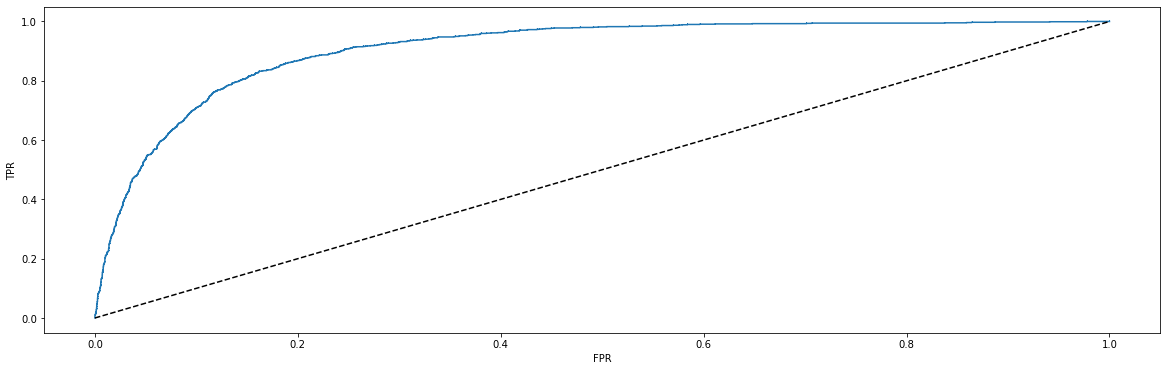

In [268]:
logr=LogisticRegression()
logr.fit(X_train,y_train)

train_predict=logr.predict(X_train)
test_predict=logr.predict(X_test)
test_predict_proba=logr.predict_proba(X_test)

fpr,tpr,th=metrics.roc_curve(y_test,test_predict_proba[:,1])
print('Area under the curve',metrics.roc_auc_score(y_test,test_predict_proba[:,-1]))
plt.plot(fpr,tpr,marker=',')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [269]:
(metrics.confusion_matrix(y_test,test_predict))

array([[7745,  207],
       [ 689,  402]], dtype=int64)

In [270]:
print(metrics.classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



Text(0, 0.5, 'logr_precision')

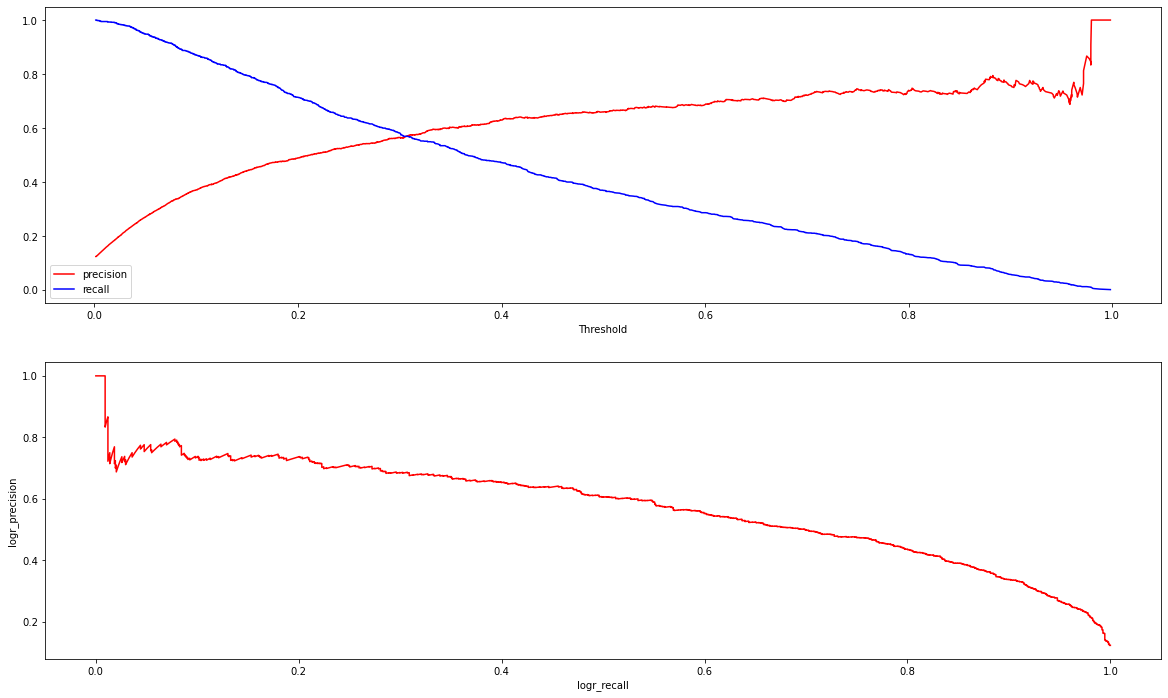

In [271]:
logr_precision,logr_recall,logr_thresh=metrics.precision_recall_curve(y_test,test_predict_proba[:,-1])
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.plot(logr_thresh,logr_precision[:-1],label='precision',color='r')
plt.plot(logr_thresh,logr_recall[:-1],label='recall',color='b')
plt.xlabel('Threshold')
plt.legend()
plt.subplot(2,1,2)
plt.plot(logr_recall,logr_precision,color='r')
plt.xlabel('logr_recall')
plt.ylabel('logr_precision')

## -------------------------------------------------------------------------------------------------------------------------------

## 2

In [272]:
main_df=model.copy(deep=True)

In [273]:
main_df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [274]:
main_df['marital']=main_df['marital'].mask(main_df['marital']=='divorced','single')

In [275]:
cat=main_df.select_dtypes(include='object')
num=main_df.select_dtypes(include=np.number).drop('y',axis=1)
y=main_df['y']
cat_dummy=pd.get_dummies(cat,drop_first=True)
num_scalar=sc.fit_transform(num)
num_scalar=pd.DataFrame(num_scalar,columns=num.columns)
X=pd.concat([cat_dummy,num_scalar],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_logr=sm.add_constant(X_train)
X_test_logr=sm.add_constant(X_test)
logisitic_regression=sm.Logit(y_train,X_train_logr).fit()
print(logisitic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.226818
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36126
Method:                           MLE   Df Model:                           41
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.3682
Time:                        22:09:02   Log-Likelihood:                -8203.6
converged:                       True   LL-Null:                       -12985.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9187      0.145    -13.243      0.000      -2.203      -1.635
jo

In [276]:
logr=LogisticRegression()
logr.fit(X_train,y_train)

train_predict=logr.predict(X_train)
test_predict=logr.predict(X_test)
test_predict_proba=logr.predict_proba(X_test)

print(metrics.classification_report(y_test,test_predict))
print('Area under the curve',metrics.roc_auc_score(y_test,test_predict_proba[:,-1]))
(metrics.confusion_matrix(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Area under the curve 0.9078721872942513


array([[7744,  208],
       [ 689,  402]], dtype=int64)

In [277]:
main_df=model.copy(deep=True)

#### Dropping Pdays

In [278]:
main_df.drop('pdays',axis=1,inplace=True)

In [279]:
cat=main_df.select_dtypes(include='object')
num=main_df.select_dtypes(include=np.number).drop('y',axis=1)
y=main_df['y']
cat_dummy=pd.get_dummies(cat,drop_first=True)
num_scalar=sc.fit_transform(num)
num_scalar=pd.DataFrame(num_scalar,columns=num.columns)
X=pd.concat([cat_dummy,num_scalar],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_logr=sm.add_constant(X_train)
#X_test_logr=sm.add_constant(X_test)
#logisitic_regression=sm.Logit(y_train,X_train_logr).fit()
#print(logisitic_regression.summary())
logr=LogisticRegression()
logr.fit(X_train,y_train)

train_predict=logr.predict(X_train)
test_predict=logr.predict(X_test)
test_predict_proba=logr.predict_proba(X_test)

print(metrics.classification_report(y_test,test_predict))
print('Area under the curve',metrics.roc_auc_score(y_test,test_predict_proba[:,-1]))
(metrics.confusion_matrix(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Area under the curve 0.9078225079164262


array([[7743,  209],
       [ 690,  401]], dtype=int64)

#### Dropping Previous

In [280]:
main_df=model.copy(deep=True)

main_df.drop('previous',axis=1,inplace=True)

In [281]:
cat=main_df.select_dtypes(include='object')
num=main_df.select_dtypes(include=np.number).drop('y',axis=1)
y=main_df['y']
cat_dummy=pd.get_dummies(cat,drop_first=True)
num_scalar=sc.fit_transform(num)
num_scalar=pd.DataFrame(num_scalar,columns=num.columns)
X=pd.concat([cat_dummy,num_scalar],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_logr=sm.add_constant(X_train)
#X_test_logr=sm.add_constant(X_test)
#logisitic_regression=sm.Logit(y_train,X_train_logr).fit()
#print(logisitic_regression.summary())
logr=LogisticRegression()
logr.fit(X_train,y_train)

train_predict=logr.predict(X_train)
test_predict=logr.predict(X_test)
test_predict_proba=logr.predict_proba(X_test)

print(metrics.classification_report(y_test,test_predict))
print('Area under the curve',metrics.roc_auc_score(y_test,test_predict_proba[:,-1]))
(metrics.confusion_matrix(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Area under the curve 0.9078436014805609


array([[7744,  208],
       [ 689,  402]], dtype=int64)

#### Dropping Pdays and Previous Both

In [282]:
main_df=model.copy(deep=True)

main_df.drop(['previous','pdays'],axis=1,inplace=True)

In [283]:
cat=main_df.select_dtypes(include='object')
num=main_df.select_dtypes(include=np.number).drop('y',axis=1)
y=main_df['y']
cat_dummy=pd.get_dummies(cat,drop_first=True)
num_scalar=sc.fit_transform(num)
num_scalar=pd.DataFrame(num_scalar,columns=num.columns)
X=pd.concat([cat_dummy,num_scalar],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_logr=sm.add_constant(X_train)
#X_test_logr=sm.add_constant(X_test)
#logisitic_regression=sm.Logit(y_train,X_train_logr).fit()
#print(logisitic_regression.summary())
logr=LogisticRegression()
logr.fit(X_train,y_train)

train_predict=logr.predict(X_train)
test_predict=logr.predict(X_test)
test_predict_proba=logr.predict_proba(X_test)

print(metrics.classification_report(y_test,test_predict))
print('Area under the curve',metrics.roc_auc_score(y_test,test_predict_proba[:,-1]))
(metrics.confusion_matrix(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Area under the curve 0.9078211247318926


array([[7745,  207],
       [ 688,  403]], dtype=int64)

### converting day in halves of month

In [284]:
k=[]
for i in bank['day']:
    if i < 11:
        k.append('First half')
    elif i >10 and i<21:
        k.append('Second Half')
    else:
        k.append('Third Half')
main_df['day']=k

In [285]:
cat=main_df.select_dtypes(include='object')
num=main_df.select_dtypes(include=np.number).drop('y',axis=1)
y=main_df['y']
cat_dummy=pd.get_dummies(cat,drop_first=True)
num_scalar=sc.fit_transform(num)
num_scalar=pd.DataFrame(num_scalar,columns=num.columns)
X=pd.concat([cat_dummy,num_scalar],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_logr=sm.add_constant(X_train)
#X_test_logr=sm.add_constant(X_test)
#logisitic_regression=sm.Logit(y_train,X_train_logr).fit()
#print(logisitic_regression.summary())
logr=LogisticRegression()
logr.fit(X_train,y_train)

train_predict=logr.predict(X_train)
test_predict=logr.predict(X_test)
test_predict_proba=logr.predict_proba(X_test)

print(metrics.classification_report(y_test,test_predict))
print('Area under the curve',metrics.roc_auc_score(y_test,test_predict_proba[:,-1]))
(metrics.confusion_matrix(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.37      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Area under the curve 0.9080498112414174


array([[7744,  208],
       [ 682,  409]], dtype=int64)

In [287]:
metrics.precision_score(y_test,test_predict)

0.6628849270664505

In [288]:
metrics.recall_score(y_test,test_predict)

0.3748854262144821

In [289]:
metrics.f1_score(y_test,test_predict)

0.47892271662763464